<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">FOR BETTER EXPERIENCE IN JUPYTER</h1>

In [1]:
# larger cell code only in jupyter notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <center>**TELCO CUSTOMER CHURN**
<center>*Created by : Alfian*

In [1]:
from IPython.display import HTML
html1 = f'<img src="Image\\churn_illustration.png" style="margin-left:auto; margin-right:auto"/>'
HTML(html1)

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">TABLE OF CONTENT</h1>

<a id="toc"></a>

[1. PURPOSE & INTRODUCTION](#1)<br>

[2. BUSINESS PROBLEM UNDERSTANDING](#2)<br>

[3. LIBRARY & DEFINED FUNCTION](#3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. PYTHON PACKAGE LIBRARY](#301)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. DEFINED FUNCTION](#302)<br>

[4. DATA UNDERSTANDING](#4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.1. FEATURE CHECK](#401)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.2. FEATURE CORRELATION](#402)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.2.1. NUMERICAL FEATURE WITH TARGET](#40201)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.2.2. CATEGORICAL FEATURE WITH TARGET](#40202)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.2.3. MULTIPLE FEATURE WITH TARGET](#40203)<br>


[5. MACHINE LEARNING](#5)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.1. DATA PREPARATION](#501)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.2. BASE MODEL EVALUATION](#502)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.3. BASE MODEL WITH OVERSAMPLING](#503)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.4. BASE MODEL WITH UNDERSAMPLING](#504)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.5. BASE MODEL OUTPUT RECAP](#505)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.6. HYPERPARAMETER TUNING](#506)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.6.1. HYPERPARAMETER TUNING - LOGISTIC REGRESSION](#50601)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.6.2. HYPERPARAMETER TUNING - GRADIENT BOOST](#50602)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.6.3. HYPERPARAMETER TUNING OUTPUT RECAP](#50603)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.7. FEATURE IMPORTANCE](#507)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.7.1. BEST MODEL WITH CURRENT FEATURES](#50701)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.7.2. BEST MODEL WITH SELECTED FEATURES](#50702)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.7.3. RECAP FOR FEATURE IMPORTANCE & FEATURE SELECTION](#50703)<br>


[6. CONCLUSION](#6)<br>

[7. RECOMMENDATION](#7)<br>

[8. DEPLOYMENT](#8)<br>

<a id="1"></a>
<font color="lightseagreen" size=+3><b>1. PURPOSE & INTRODUCTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* Understanding Churn : 
    * What is churn ? 
    * Why it happen ? 
    * What impact if Churn happen ?<br><br>
    
* This Notebook will explain how to solve a Churn problem using Supervised Learning :
    * How to choose correct metrics for our case
    * Model Selection & Evaluation
    * Handling Imbalance (resampling method, adjust threshold)
    * Hyperparameter Tuning
    * Feature Importance
    * Feature Selection
    * Metrics score intepretation
    * Deployment using pickle and try to predict using pickled model<br><br>

* I explore and explain what I found in our data as well
* I try to explain every process in the notebook so I hope you can understand the Notebook
* I hope this notebook can be useful, Thanks for reading. 

If you like the notebook and think that it helped, you can consider upvoting this notebook. 

Thank you

<a id="2"></a>
<font color="lightseagreen" size=+3><b>2. BUSINESS PROBLEM UNDERSTANDING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

**TELCO**<br>
Is a fictional telco company that provided Internet service & otherservices.<br><br>

**CHURN**<br>
Customer who left within the last month<br><br>

**WHY CHURN HAPPEN ?**<br>
[**Source - 1**](https://www.clientsuccess.com/blog/10-common-reasons-customers-churn-and-what-to-do-about-it/#:~:text=Price%3A%20by%20far%2C%20one%20of,2.) [**Source - 2**](https://www.profitwell.com/customer-churn/causes)
1. Price, experience, competitor : customer pay good money but not experiencing the value to make it worth it. Or the existence of a company that is able to provide the same quality of service at a more affordable price
2. Need : sometimes customer may find they don't require the services any longer.
3. Inadequate customer support : when customer have a problem, they will ask the customer support for solution. How customer support deliver the solution and do the solution solve the problem is gonna be important. it must be quick and able to solve the existing problems.
4. Declining service quality
5. etc

In my opinion, point no. 2 is something that TELCO can't control. Others can.<br><br>

**CHURN NEGATIVE IMPACT**<br>
[**Source - 1**](https://www.clientsuccess.com/blog/true-cost-customer-churn-part-1/) [**Source - 2**](https://towardsdatascience.com/machine-learning-powered-churn-analysis-for-modern-day-business-leaders-ad2177e1cb0d)
1. Lose recurring revenue : Since the service is subscription based service, if average price for service is around \\$30. losing 50 customer means that TELCO might lost \\$1500 for the next month until they get another 50 new customer.
2. Lose Expansion Opportunity : It's easier to sell new product / services to existing customer (probability around 65%) rather than to new customer (probability around 13%). If customer churn cost around \\$4500 of recurring revenue, TELCO might also losing the expansion of $900.
3. The point above said something about new customer. There's a cost to find new customer as well. So if customer churn, not only cost TELCO their recurring revenue, TELCO need to spend dollars to get new customer as well. That dollar spent is to get back to original state (before customer churn)<br><br>

**CHURN EXTRA NOTES**<br>
[**Source - 1**](https://towardsdatascience.com/machine-learning-powered-churn-analysis-for-modern-day-business-leaders-ad2177e1cb0d) [**Source - 2**](https://www.semrush.com/blog/word-of-mouth-stats/)
* According to the authors of “Leading on the Edge of Chaos”, a 2% increase in customer retention (or decreasing churn) is equivalent to 10% reduction in costs.
* Additionally as per the White House Office of Consumer Affairs, it is 6–7 times more expensive to acquire a new customer than to retain an old one.
* By retaining customer, it also means that there's an increase of probability that those existing customer can promote TELCO services to their relatives.<br><br>

<a id="1.confussionmatrix"></a>
**CONFUSSION MATRIX**<br>

In [3]:
from IPython.display import HTML
html1 = f'<img src="Image\\1_PPgItHcPSaskyjLMWFC-Kw2.png" style="margin-left:auto; margin-right:auto"/>'
HTML(html1)

> **TARGET**<br>
>  * 1 : customer yang churn
>  * 0 : customer yang TIDAK churn<br><br>
>
> **CONFUSSION MATRIX STATEMENT**<br>
>  * **TP** : ACTUAL : customer CHURN (1) & PREDICT : customer CHURN (1)
>  * **TN** : ACTUAL : customer NOT CHURN (0) & PREDICT : customer NOT CHURN (0)
>  * **FN** : ACTUAL : customer CHURN (1) & PREDICT : customer NOT CHURN (0)
>  * **FP** : ACTUAL : customer NOT CHURN (0) & PREDICT : customer CHURN (1)<br><br>
>
> **CONSEQUENCE OF FALSE NEGATIVE**<br>
>  * FN in TELCO case can be translated into : customer that actually churn is predicted as not churn (underpredict)
>  * Much FN cases means that many customer that actually churn is hidden under the radar. 
>  * In Business perspective, TELCO loses a customer without any preventive action to retain that customer.
>  * point above indicating low recall metric score.<br><br>
>
> **CONSEQUENCE OF FALSE POSITIVE**<br>
>  * FP in TELCO case can be translated into : customer that actually not churn is predicted as churn (overpredict)
>  * If there are many cases of this type, TELCO will find it difficult to distinguish customers who really will churn from those who don't. 
>  * As previously section explained that churn is expensive, we want to thwart the customer's plan to churn by giving a certain treatment.
>  * If we have much FP cases, the greater the probability of giving the treatment to the wrong customer.
>  * Much FP cases indicating low precision metric score.<br><br>
>
> **METRICS CHOOSEN**<br>
>  * From all those points above, I decide to use `recall` because I don't want customer that will and actually churn is hidden or undetected. (FN case more expensive than FP)
>  * By focusing on `recall` mean that we will reduce FN case, but we might have increase of FP case's
>  * More FP cases means that we might give treatment to wrong customer (customer that not churn), but I'll treat it as customer loyalty program. (and as previously explained that finding new customer is costly, TELCO better use their resource to maintain their customer)<br><br>

**PROBLEM STATEMENT**<br>
* Now we understand that churn customer is expensive.
* It's better to retain existing customer. 
* By knowing which customer will churn, TELCO can give certain treatment to customer so customer won't churn.
* In addition, by knowing the number of churn customers, the company can make a strategy to find of new customer to cover the lost that occurred due to the *customer churn*.<br><br>

**VARIABLES**<br>
* *Available features are as follows*<br>
["Dependant", "Tenure", "Onlinebackup", "Internetservice", "Deviceprotection", "Techsupport", "Contract", "Paperlessbilling", "MonthlyCharges"]<br>

* *Target*<br>
["Churn"]<br><br>

**OBJECTIVES**<br>
* TELCO wants to have a *Machine Learning* model that has the ability to predict customers who will churn or those who will not churn, so that preventive actions can be taken such as providing incentives / promos.
* The company also wants to understand why customer churn based on available data, so TELCO can make an improvement to reduce their churn rate and increase their overall business.

**VALUE**<br>
* Prevent losses due to customer churn.

<a id="3"></a>
<font color="lightseagreen" size=+3><b>3. LIBRARY & DEFINED FUNCTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<a id="301"></a>
<font color="lightseagreen" size=+2><b>3.1. PYTHON PACKAGE LIBRARY</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [4]:
# common dataframe
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from IPython.display import IFrame
from itertools import chain,cycle

# math & statistic function
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kstest
from scipy.stats import shapiro

# remove all warnings, more robust
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
# preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# metode resampling
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

# basic model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ensemble model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# library yang dibutuhkan model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

# metrics
from sklearn.metrics import classification_report, recall_score, precision_score, average_precision_score, accuracy_score, precision_recall_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# pipeline, karena nanti kita akan mengatasi imbalance. kita import saja pipeline dari imblearn
from imblearn.pipeline import Pipeline

# pickle for deployment
import pickle

<a id="302"></a>
<font color="lightseagreen" size=+2><b>3.2. DEFINED FUNCTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [5]:
# get variable name
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

# needed library
from IPython.display import display_html
from IPython.display import IFrame
from itertools import chain,cycle

# displaying column side by side
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# silahkan fungsi ini di trial. sepertinya masih butuh beberapa penyesuaian
def general_eda(df):
    gen_info = []
    for i in df.columns:
        try : 
            samples = df[i].drop_duplicates(keep = "first").sample(2).values
        except ValueError : 
            samples = df[i].sample().values

        try : 
            calc_std = round(np.std(df[i]), 4)
            calc_var = round(calc_std ** 2,4)
        except TypeError :
            calc_std = "-"
            calc_var = "-"      

        gen_info.append([
            i,
            df[i].dtype,
            calc_std, 
            calc_var,
            df[i].isna().sum(),
            round(((df[i].isna().sum()*100) / df.shape[0]),2), # cek bagian ini untuk lebih tepatnya.
            df[i].nunique(),
            samples])

    gen_info_df = pd.DataFrame(
                    data = gen_info,
                    columns = ["features", "type", "std", "variance", "n_null", "nullpct", "n_unique", "sampledata"])

    general_eda_check_duplicate = pd.DataFrame(df.duplicated().value_counts()).T

    general_eda_check_duplicate.rename(columns = {False : "not_duplicated", True : "duplicated"}, inplace = True)
    display_side_by_side(gen_info_df,general_eda_check_duplicate, titles = [f"General Information for {namestr(df, globals())[0]}", f"Check for Duplicated data {namestr(df, globals())[0]}"])

In [6]:
# check each feature categorical or numerical
def col_info(df, i, figsize = (5, 3)):
    print(f"index kolom : {i}")
    print(f"nama kolom : {df.columns[i]}")
    print("\nUnique item pada kolom")
    print(f"{df[df.columns[i]].unique()}")
    print("\nValue Counts")
    df_col_info = pd.DataFrame(df[df.columns[i]].value_counts())
    df_col_info.rename(columns = {f"{df.columns[i]}" : f"n_{df.columns[i]}"}, inplace = True)
    
    plt.figure(figsize = figsize)
    sns.countplot(data = df, x = df[df.columns[i]], palette = "Set2")
    plt.xticks(rotation = 45)
    plt.show()
    
    return df_col_info

In [7]:
# check feature if too much numerical. 
# then check for distribution and outliers 
def visualize_distribution(df, i) :
    print(f"Stats for {df.columns[i]}:")
    display(df[df.columns[i]].describe())
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (12,8), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})
    ax1.set_title(f"Distribution of {[df.columns[i]]}", color = "gray")
    sns.boxplot(df[df.columns[i]], ax = ax1)
    ax1.set(xlabel = "")
    sns.distplot(df[df.columns[i]], ax = ax2)
    plt.show()

    print(f"Skewness of {df.columns[i]}:", skew(df[df.columns[i]]))

In [8]:
# categorical features and target in proprortion
def target_n_dependant_categorical(df, feature_list , target, n_col = 4, n_rows = 2, figsize = (22,8)):
    print(f"ada {len(feature_list)} categorical features :", feature_list)
    print("target variables :", target, "\n")
    fig, axes = plt.subplots(n_rows, n_col)
    fig.set_size_inches(figsize)
    for ax, v in zip(axes.flatten(), feature_list):
        pd.crosstab(df[v], df[target]).plot(kind = "bar", ax = ax)
        xlabel = pd.crosstab(df[v], df[target], normalize = True).index
        ax.set_ylim(0, 2500)
        ax.set_title(f"n_Cust - {target} by {v}", size = 14)
        ax.set_ylabel("n_Customer")
        ax.set_xticklabels(xlabel, rotation = 0)
        ax.grid()
    plt.tight_layout()
    plt.show()

In [9]:
# categorical features and target in proprortion
def target_n_dependant_categorical_proportion(df, feature_list , target, n_col = 4, n_rows = 2, figsize = (22,8)):
    print(f"ada {len(feature_list)} categorical features :", feature_list)
    print("target variables :", target, "\n")
    fig, axes = plt.subplots(n_rows, n_col)
    fig.set_size_inches(figsize)
    for ax, v in zip(axes.flatten(), feature_list):
        pd.crosstab(df[v], df[target], normalize = True).plot(kind = "bar", stacked = True, ax = ax)
        xlabel = pd.crosstab(df[v], df[target], normalize = True).index
        ax.set_ylim(0, 0.8)
        ax.set_title(f"Cust.Prop - {target} by {v}", size = 14)
        ax.set_ylabel("n_customer")
        ax.set_xticklabels(xlabel, rotation = 0)
        ax.grid()
    plt.tight_layout()
    plt.show()

In [10]:
# displaying column side by side
def display_side_by_side(*args,titles=cycle([""])):
    html_str = ""
    for df,title in zip(args, chain(titles,cycle(["</br>"])) ):
        html_str += "<th style='text-align:center'><td style = 'vertical-align:top'>"
        html_str += f"<h3>{title}</h3>"
        html_str += df.to_html().replace("table","table style='display:inline'")
        html_str += "</td></th>"
    display_html(html_str,raw=True)

In [11]:
# Visualize Outliers
def outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    below = q1 - 1.5 * iqr
    above = q3 + 1.5 * iqr
    idx_outlier = df[(df[col] > above) | (df[col] < below)].index
    return idx_outlier

def outliers_tabulation(df, col_list):
    df_outlier= pd.DataFrame(columns=["features", "n_outliers", "outliers_pct(%)"])

    for i in col_list:
        df_outlier= df_outlier.append({"features": i, "n_outliers": len(outlier(df, i)),"outliers_pct(%)": f"{round(len(outlier(df, i))/len(df)*100,2)} %"}, ignore_index = True)

    return df_outlier

In [12]:
# label for metrics result compilation
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.4f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

In [13]:
# Classification report on dataframe
def get_classification_report(y_test, y_pred):
    '''Source: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format'''
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    
    # DataFrame Creation
    df_classification_report = pd.DataFrame(report).T
    
    # Adjusting Support 3rd value to mimic actual classification report, it is a support, ain't metrics
    # if the macro avg and weighted avg not the same. back to accuracy
    if df_classification_report["support"]["macro avg"] == df_classification_report["support"]["weighted avg"] :
        adjustment_val = df_classification_report["support"]["macro avg"]
    else :
        adjustment_val = df_classification_report["f1-score"]["accuracy"]
        
    df_classification_report["support"]["accuracy"] = adjustment_val
        
    # adjusting support is int, not float
    df_classification_report["support"] = df_classification_report["support"].apply(int)
    
    # creating space between metrics & supports
    df_classification_report.insert(3, "  ", ["  ", "  ", "  ", "  ", "  ",])
    
    # remove accuracy from precision and recall column
    df_classification_report["precision"]["accuracy"] = " "
    df_classification_report["recall"]["accuracy"] = " "    
    
    # menambahkan spacing antara kelas dengan acc, macro avg, weighted avg
    # membuat variabel baru untuk memisahkan data baris ke 1 dan 2 dengan sisanya
    data1 = df_classification_report[:2]
    data2 = df_classification_report[2:]
    
    # membuat spacing untuk dummy. diinset pada data 1
    spacing = pd.DataFrame({
    "precision" : [" "],
    "recall" : [" "],
    "f1-score" : [" "],
    "  " : [" "],
    "support" : [" "]})
    
    # menggabungkan data1 dengan spasi yang sudah diinptu dengan data2.
    # mengembalikan ke bentuk df_classfication report, tapi dengan tambahan spasi
    data1 = pd.concat([data1, spacing], axis = 0)
    df_classification_report_finale = pd.concat([data1, data2], axis = 0)
    
    # penyesuaian nama index
    df_classification_report_finale.index = ["0", "1", "", "accuracy", "macro avg", "weighted avg"]
    
    return df_classification_report_finale

<a id="4"></a>
<font color="lightseagreen" size=+3><b>4. DATA UNDERSTANDING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

**IMPORT THE DATA**<br>
Lets import the data first

In [14]:
# First import the data
df_0 = pd.read_csv("dataset\\data_telco_customer_churn.csv")

# Create backup so we can go back to the original data
df = df_0.copy()

# Show sample data
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


**ATTRIBUTE INFORMATION**<br>
Understanding what each column mean

| feature/target | Attribute | Data Type | Description |Response|
| --- | --- | --- | --- | --- |
| feature | Dependents | Text | Customer live with relatives, friends, family, etc ? | Yes, No |
| feature | Tenure | Int. | The total month the customer has subscribed  | an integer, instance 9 |
| feature | OnlineSecurity | Text | Do customer subscribe for OnlineSecurity features ? | Yes, No | 
| feature | OnlineBackup | Text | Do customer subscribe for OnlineBackup features ? | Yes, No |
| feature | InternetService | Text | The type of internet service used | DSL, Fiber Optic |
| feature | DeviceProtection | Text | Do customer subscribe for DeviceProtection features ? | Yes, No | 
| feature | TechSupport | Text | Do customer subscribe for TechSupport features ? | Yes, No |
| feature | Contract | Text | Type of subscription contract | Month-to-Month, One Year, Two Year |
| feature | PaperlessBilling | Text | Do customer use PaperlessBilling | Yes, No |
| feature | MonthlyCharges | Float | MonthlyFees for the service | a float, instance 72.90 |
| target | Churn | Text | Customer Unsubscribe ? | Yes, No | 

**DF INFO**<br>
Let's see how much data we have, data type and feature names

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


**MORE DETAIL DF INFO**<br>
df info but in more depth using my defined function. We can see duplicated data information as well

In [16]:
general_eda(df)

,features,type,std,variance,n_null,nullpct,n_unique,sampledata
0,Dependents,object,-,-,0,0.0,2,"[Yes, No]"
1,tenure,int64,24.4987,600.1863,0,0.0,73,"[56, 28]"
2,OnlineSecurity,object,-,-,0,0.0,3,"[No, No internet service]"
3,OnlineBackup,object,-,-,0,0.0,3,"[Yes, No]"
4,InternetService,object,-,-,0,0.0,3,"[No, DSL]"
5,DeviceProtection,object,-,-,0,0.0,3,"[Yes, No]"
6,TechSupport,object,-,-,0,0.0,3,"[No, No internet service]"
7,Contract,object,-,-,0,0.0,3,"[One year, Two year]"
8,PaperlessBilling,object,-,-,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,29.9209,895.2603,0,0.0,1422,"[66.85, 43.6]"


**REMARKS**
* From point above we understand that we have 77 duplicated data from 4930 rows of data
* Data type for each features is already correct
* We have no missing values (from n_null : number of missing value, nullpct is the percentage)
* We now know how much unique value we have from each column and sample value from each features

**HANDLE DUPLICATED DATA**<br>
in this section I will handle duplicated value

First let see our duplicates

In [17]:
# works on the duplicate
dups = df.duplicated()

# Show the duplicates
df[dups]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
701,No,41,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.65,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.65,Yes
951,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.15,Yes
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
...,...,...,...,...,...,...,...,...,...,...,...
4759,No,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.05,No
4786,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.35,No
4788,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,70.10,Yes
4866,No,1,No,No,DSL,No,No,Month-to-month,Yes,55.00,Yes


Let's delete our duplicates

In [18]:
# drop duplicated data
df.drop_duplicates(inplace = True)

# check before and after handling duplicates
print("original data size, ", df_0.shape[0])
print("after removing duplicate data, ", df.shape[0])

original data size,  4930
after removing duplicate data,  4853


<a id="401"></a>
<font color="lightseagreen" size=+2><b>4.1. FEATURE CHECK</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

index kolom : 0
nama kolom : Dependents

Unique item pada kolom
['Yes' 'No']

Value Counts


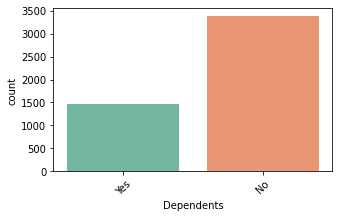

,n_Dependents
No,3380
Yes,1473


In [19]:
col_info(df, 0)

**REMARKS ON `Dependents`**
* This feature ask if customer live with friends, relatives or family ? 
* No anomaly from this feature.
* From this data majority of TELCO customer (69.89%) live alone.
<br><br>

index kolom : 1
nama kolom : tenure

Unique item pada kolom
[ 9 14 64 72  3 40 17 11  8 47 18  5  1 48 13 58  7  4 70 34 31 37 15 71
 10 43 22 33 69 54 63 55 66 56 32 26 24  2 51 23 49 28 36 45 42  6 61 59
 67 65  0 16 52 41 25 62 20 50 30 60 19 35 57 27 44 53 12 46 39 29 38 68
 21]

Value Counts


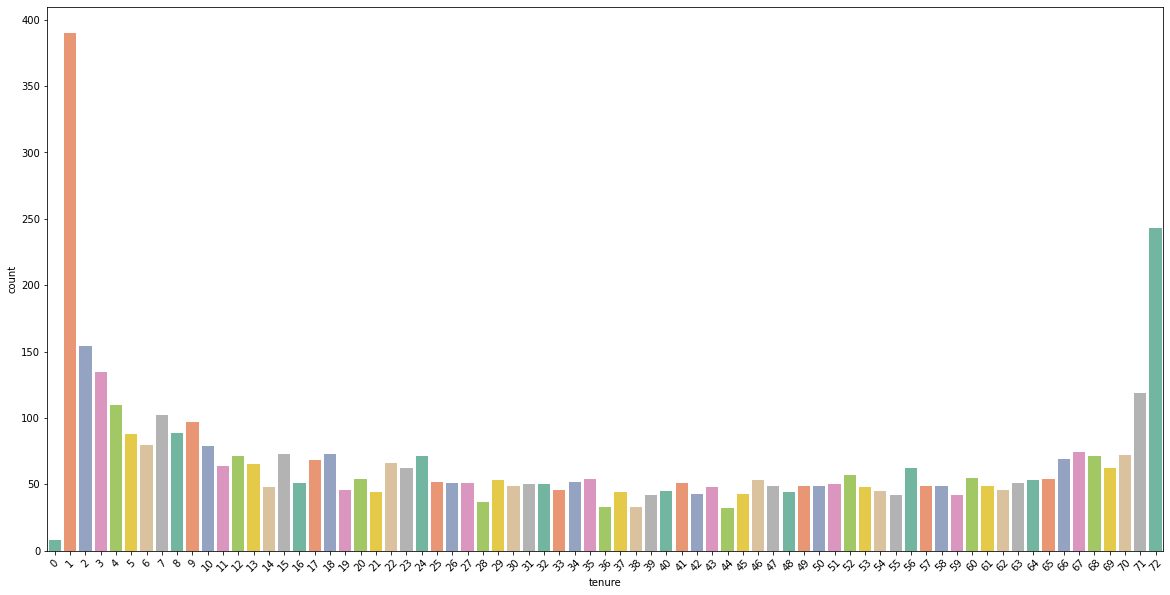

,n_tenure
1,390
72,243
2,154
3,135
71,119
...,...
28,37
36,33
38,33
44,32


In [20]:
col_info(df, 1, (20, 10))

In [21]:
df["tenure"].value_counts()

1     390
72    243
2     154
3     135
71    119
     ... 
28     37
36     33
38     33
44     32
0       8
Name: tenure, Length: 73, dtype: int64

**REMARKS ON `tenure`**
* This feature can explain how long customer has subsribe to TELCO services
* No anomaly from this feature.
* From this data we can say that customer based on tenure is more or less diversed (averaging in 40 custs each tenure)
* But we can see that TELCO has much customer that just subscribe to TELCO services for 1 month (390 custs) and loyal customer that have subscribe for 72 months (243 custs)
<br><br>

index kolom : 2
nama kolom : OnlineSecurity

Unique item pada kolom
['No' 'Yes' 'No internet service']

Value Counts


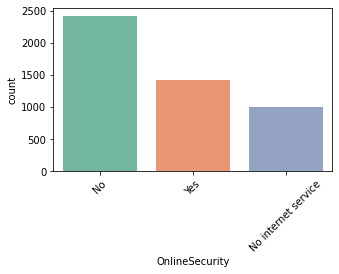

,n_OnlineSecurity
No,2420
Yes,1430
No internet service,1003


In [22]:
col_info(df, 2)

**REMARKS ON `OnlineSecurity`**
* This feature can explain do customer get or subscribing for the extra services - OnlineSecurity ? 
* No anomaly from this feature.
* From this feature we understand that : 
    * 49.5% customers is not subscribing extra services - OnlineSecurity
    * 29% customers subscribing extra services - OnlineSecurity
    * 21.5% customers is having no internet service.<br><br>

* Third categories (`No Internet Service`) from this features, might indicating that this type of customer subscribing to other service (non internet, phone, streaming services, etc)
* For me, I'll change `No Internet Service` into `OtherServices`
* After changing those, we check the change that we make below

In [23]:
df["OnlineSecurity"].replace("No internet service", "OtherServices", inplace = True)

# Confirming change
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'OtherServices'], dtype=object)

index kolom : 3
nama kolom : OnlineBackup

Unique item pada kolom
['No' 'Yes' 'No internet service']

Value Counts


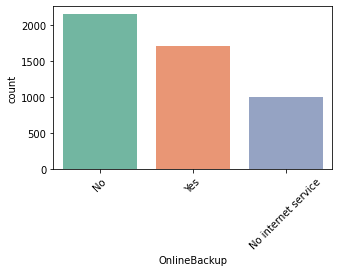

,n_OnlineBackup
No,2148
Yes,1702
No internet service,1003


In [24]:
col_info(df, 3)

**REMARKS ON `OnlineBackup`**   
* This feature can explain do customer get or subscribing for the extra services - OnlineBackup ? 
* No anomaly from this feature.
* From this feature we understand that : 
    * 44.0% customers is not subscribing extra services - OnlineBackup
    * 34.6% customers subscribing extra services - OnlineBackup
    * 21.4% customers is having no internet service.<br><br>

* Third categories (`No Internet Service`) from this features, might indicating that this type of customer subscribing to other service (non internet, phone, streaming services, etc)
* For me, I'll change `No Internet Service` into `OtherServices`
* After changing those, we check the change that we make below

In [25]:
df["OnlineBackup"].replace("No internet service", "OtherServices", inplace = True)

# Confirming change
df["OnlineBackup"].unique()

array(['No', 'Yes', 'OtherServices'], dtype=object)

index kolom : 4
nama kolom : InternetService

Unique item pada kolom
['DSL' 'Fiber optic' 'No']

Value Counts


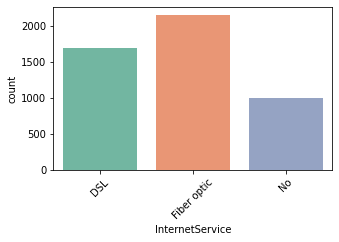

,n_InternetService
Fiber optic,2154
DSL,1696
No,1003


In [26]:
col_info(df, 4)

**REMARKS ON `InternetService`**<br>
[**Source - 1**](https://www.socket.net/blog/posts/fiber-tech/fiber-vs-dsl-whats-difference#:~:text=It%27s%20simple%20%E2%80%94%20fiber%20is%20fast,speeds%20100x%20faster%20than%20DSL.)
* This feature can explain what type of InternetService that customer use or subscribe to
* No anomaly from this feature.
* From this feature we understand that : 
    * 44.0% customers use Fiber Optic (better speed than DSL)
    * 34.6% customers use DSL
    * 21.4% customers is having no internet service.<br><br>

* For your information for DSL, customer can connect to the internet through telephone lines and a modem.
* This days, I myslef more familiar with fiber optic. But you need to check that ISP already cover the area. If not, you need to put a request so your area can be covered.<br><br>

* Third categories (`No Internet Service`) from this features, might indicating that this type of customer subscribing to other service (non internet, phone, streaming services, etc)
* For me, I'll change `No Internet Service` into `OtherServices`
* After changing those, we check the change that we make below

In [27]:
df["InternetService"].replace("No", "OtherServices", inplace = True)

# Confirming change
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'OtherServices'], dtype=object)

index kolom : 5
nama kolom : DeviceProtection

Unique item pada kolom
['Yes' 'No internet service' 'No']

Value Counts


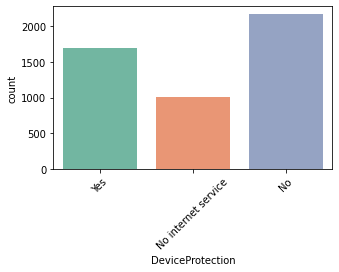

,n_DeviceProtection
No,2162
Yes,1688
No internet service,1003


In [28]:
col_info(df, 5)

**REMARKS ON `DeviceProtection`**   
* This feature can explain do customer get or subscribing for the extra services - DeviceProtection ? 
* No anomaly from this feature.
* From this feature we understand that : 
    * 44.0% customers is not subscribing extra services - DeviceProtection
    * 34.6% customers subscribing extra services - DeviceProtection
    * 21.4% customers is having no internet service.<br><br>

* Third categories (`No Internet Service`) from this features, might indicating that this type of customer subscribing to other service (non internet, phone, streaming services, etc)
* For me, I'll change `No Internet Service` into `OtherServices`
* After changing those, we check the change that we make below

In [29]:
df["DeviceProtection"].replace("No internet service", "OtherServices", inplace = True)

# confirming change
df["DeviceProtection"].unique()

array(['Yes', 'OtherServices', 'No'], dtype=object)

index kolom : 6
nama kolom : TechSupport

Unique item pada kolom
['Yes' 'No' 'No internet service']

Value Counts


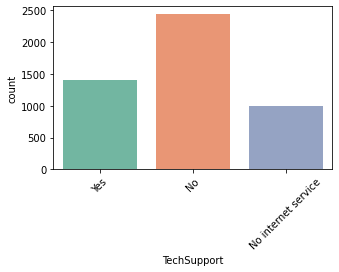

,n_TechSupport
No,2442
Yes,1408
No internet service,1003


In [30]:
col_info(df, 6)

**REMARKS ON `TechSupport`**   
* This feature can explain do customer get or subscribing for the extra services - TechSupport ? 
* No anomaly from this feature.
* From this feature we understand that : 
    * 50.0% customers is not subscribing extra services - TechSupport
    * 28.6% customers subscribing extra services - TechSupport
    * 21.4% customers is having no internet service.<br><br>

* Third categories (`No Internet Service`) from this features, might indicating that this type of customer subscribing to other service (non internet, phone, streaming services, etc)
* For me, I'll change `No Internet Service` into `OtherServices`
* After changing those, we check the change that we make below

In [31]:
df["TechSupport"].replace("No internet service", "OtherServices", inplace = True)

# Confirming change
df["TechSupport"].unique()

array(['Yes', 'No', 'OtherServices'], dtype=object)

index kolom : 7
nama kolom : Contract

Unique item pada kolom
['Month-to-month' 'Two year' 'One year']

Value Counts


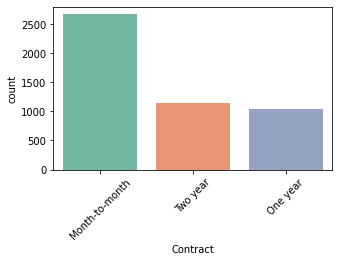

,n_Contract
Month-to-month,2665
Two year,1143
One year,1045


In [32]:
col_info(df, 7)

**REMARKS ON `Contract`**   
* This feature can explain the type of contract used by the customer
* No anomaly from this feature.
* From this feature we understand that : 
    * 55.2% customers using Month - to - Month contract
    * 23.4% customers using Two Year Contract
    * 21.4% customers using One Year Contract<br><br>
    
* Month - to - Month contract is the most used contract type. it's beneficial for customers because :
    * Customer can balance their cashflow. 
    * If customer doesn't need the service anymore, they can stop next month
    * If customer find better competitor with better price & services, they can easily switch.<br><br>

* We can try to see correlation between tenure, contract or even other features in the next section

index kolom : 8
nama kolom : PaperlessBilling

Unique item pada kolom
['Yes' 'No']

Value Counts


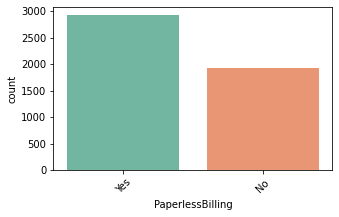

,n_PaperlessBilling
Yes,2925
No,1928


In [33]:
col_info(df, 8)

**REMARKS ON `PaperlessBilling`**   
* This feature explains whether customers use *paperless billing* feature ?
* No anomaly from this feature.
* From this data it is known that:
    * 59.9% customers have used *paperless billing*
    * 40.1% customers have not taken advantage of this feature.<br><br>

* This feature provides convenience for customers and TELCO companies.
* benefits for customers:
    * prevent loss of physical bills
    * same delivery time every month, so it can become routine
    * practicality<br><br>

* benefits for TELCO:
    * because of *paparless billing*, the work is done automatically, so it can allocate resources to more crucial or important jobs
    * reduce the risk of human error (if still done manually)
    * speed up cash flow (because the bill must go to the customer on time, and it is expected that payment is made on time as well)
    * reduce operational costs such as paper and other administrative needs because billing is done electronically

Stats for MonthlyCharges:


count    4853.000000
mean       65.321543
std        29.783655
min        18.800000
25%        40.050000
50%        70.600000
75%        90.050000
max       118.650000
Name: MonthlyCharges, dtype: float64

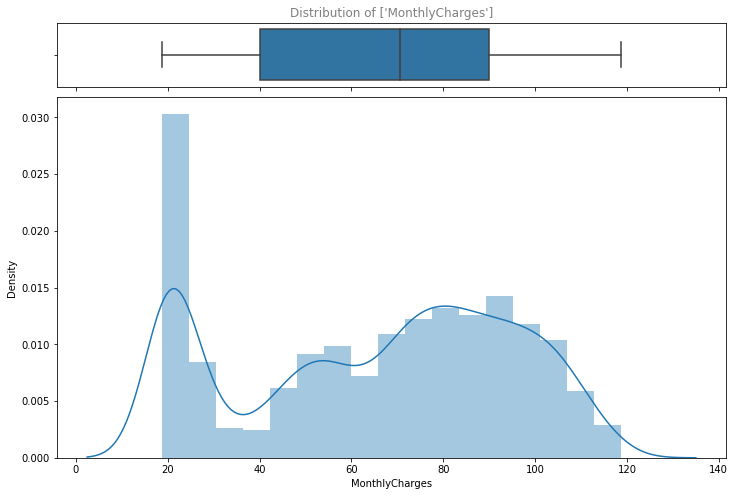

Skewness of MonthlyCharges: -0.24362379068682466


In [34]:
visualize_distribution(df, 9)

**REMARKS ON `MonthlyCharges`**   
* This feature explains how much customer need to pay for TELCO services
* No anomaly from this feature.

index kolom : 10
nama kolom : Churn

Unique item pada kolom
['Yes' 'No']

Value Counts


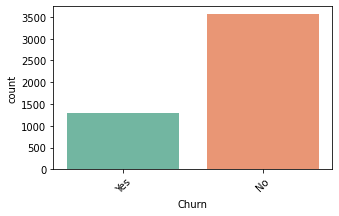

,n_Churn
No,3565
Yes,1288


In [35]:
col_info(df, 10)

**REMARKS ON `Churn`**   
* This is the target variable.
* No anomaly shown from target variable.
* We need to change Yes & No categories into numerical so that machine can learn from it : 
    * 1 : churn customer
    * 0 : not churn customer

In [36]:
# Applying Changes
df["Churn"].replace("Yes", 1, inplace = True)
df["Churn"].replace("No", 0, inplace = True)

# Confirming change
df["Churn"].unique()

array([1, 0], dtype=int64)

<a id="402"></a>
<font color="lightseagreen" size=+2><b>4.2. FEATURE CORRELATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

I start with make several variables to separate numerical & categorical variables, target

In [37]:
numerical_f = ["tenure", "MonthlyCharges"]
categorical_f = ["Dependents", "OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Contract", "PaperlessBilling"]
target = ["Churn"]

<a id="40201"></a>
<font color="lightseagreen" size=+2><b>4.2.1. NUMERICAL FEATURE WITH TARGET</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [38]:
# center all image output below
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<a id="numericalfeturenormalitycheck"></a>
Before we continue any further, let's check our normality of our numerical data

In [39]:
# normality check using frequentist test
ks_p_value_comp = []
shapiro_comp = []
feature_comp = []
category = numerical_f # checking normality on numerical features only

for num_feat in category :   
    # feature compilation
    feature_comp.append(num_feat)
    
    # Normality check using kolmogorofsmirnov
    ks_statistic, ks_pvalue = kstest(df[num_feat], "norm")
    # save KS normality check on empty list that we make earlier
    ks_p_value_comp.append(ks_pvalue)
    
    # Normality check using shapirowilk
    sw_statistic, sw_pvalue = shapiro(df[num_feat])
    # save Shapirowilk normality check on empty list that we make earlier
    shapiro_comp.append(sw_pvalue)

# compile result on dataframe
pd.DataFrame({
    "ks_test_pval" : ks_p_value_comp,
    "shapiro_test_pval" : shapiro_comp},
    index = feature_comp)

,ks_test_pval,shapiro_test_pval
tenure,0.0,0.000000e+00
MonthlyCharges,0.0,4.344025e-44


**REMARKS ON NORMALITY OF NUMERICAL DATA**
* There's no `P-value` lower than 0.05.
* `tenure & MonthlyCharges` is not distributed normally, hence we're using `Spearman` to check correlation.

In [40]:
# calculate correlation using spearman
numeric_corr = df[numerical_f + target].corr(method = "spearman")
numeric_corr

,tenure,MonthlyCharges,Churn
tenure,1.000000,0.259220,-0.375362
MonthlyCharges,0.259220,1.000000,0.185835
Churn,-0.375362,0.185835,1.000000


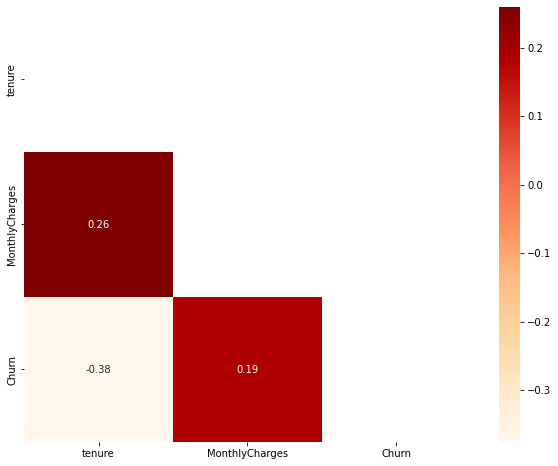

In [41]:
# Rules to make heatmap not square
mask = np.triu(np.ones_like(numeric_corr))

# make the heatmpa
plt.figure(figsize = (10,8))
sns.heatmap(numeric_corr, cmap="OrRd", annot = True, mask=mask)
plt.show()

**REMARKS ON NUMERICAL FEATURES WITH TARGET CORRELATION**
* From the correlation value given, *tenure* and *MonthlyCharge* do not have a major effect on the *Churn* of a customer. The correlation value for each *feature* is as follows:
     * *Tenure* - *Churn* has a negative correlation of -0.38, which means that the longer the subscription, the less likely it is to *churn*. It's moderate correlation (range 0.3 - 0.7)
     * *MonthlyCharges* - *Churn* have a positive correlation of 0.18, which means that the greater the *MonthlyCharges* or monthly fee, the more likely the customer to *churn*. it's weak correlation (range 0.0 - 0.3)<br><br>
    
* *Tenure - MonthlyCharges* show weak relationship (range 0.3 - 0.7) with correlation value of positive 0.26, which means that the longer the subscription, the higher the tendency for MonthlyCharges.<br><br>

**HISTPLOT & BOXPLOT OF NUMERICAL FEATURE DATA WITH TARGET**

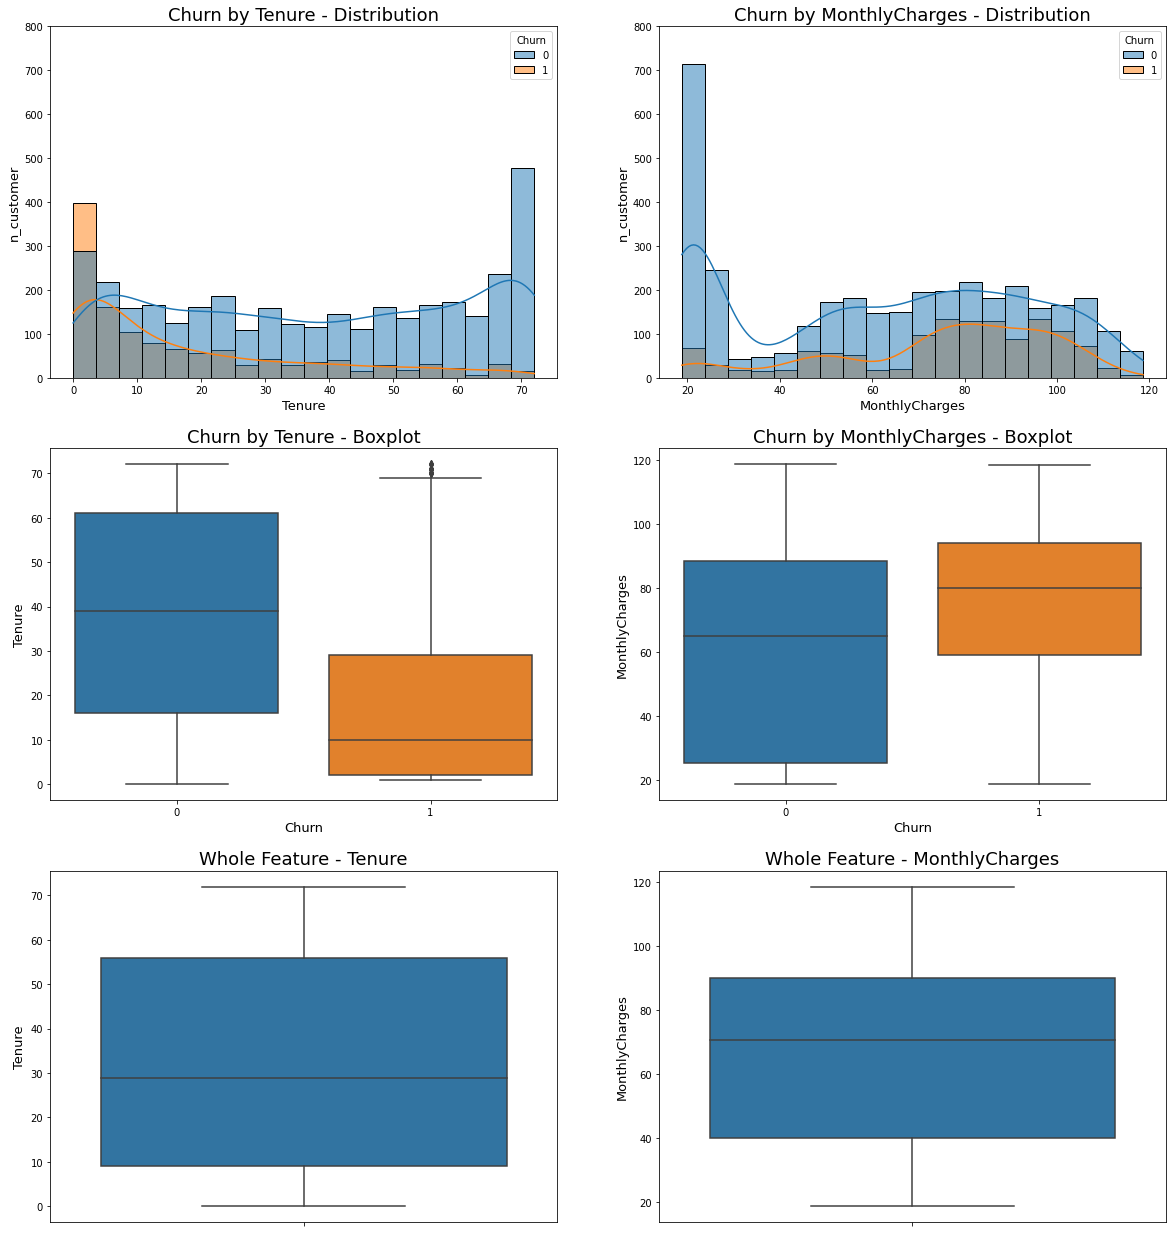

In [42]:
plt.figure(figsize=(20,22))

plt.subplot(321)
sns.histplot(data = df,x = "tenure", hue = "Churn", kde = True, bins = 20)
plt.ylim(0,800)
plt.title("Churn by Tenure - Distribution", fontsize = 18)
plt.xlabel("Tenure",size = 13)
plt.ylabel("n_customer",size = 13)

plt.subplot(322)
sns.histplot(data = df, x = "MonthlyCharges", hue = "Churn", kde=True, bins = 20)
plt.ylim(0,800)
plt.title("Churn by MonthlyCharges - Distribution", fontsize = 18)
plt.xlabel("MonthlyCharges",size = 13)
plt.ylabel("n_customer",size = 13)

plt.subplot(323)
sns.boxplot(data = df, y ="tenure", x = "Churn")
plt.title("Churn by Tenure - Boxplot",size = 18)
plt.xlabel("Churn",size = 13)
plt.ylabel("Tenure",size = 13)

plt.subplot(324)
sns.boxplot(data = df, y = "MonthlyCharges", x = "Churn")
plt.title("Churn by MonthlyCharges - Boxplot",size = 18)
plt.xlabel("Churn",size = 13)
plt.ylabel("MonthlyCharges",size = 13)

plt.subplot(325)
sns.boxplot(data = df, y = "tenure")
plt.title("Whole Feature - Tenure",size = 18)
plt.ylabel("Tenure",size = 13)

plt.subplot(326)
sns.boxplot(data = df, y = "MonthlyCharges")
plt.title("Whole Feature - MonthlyCharges",size = 18)
plt.ylabel("MonthlyCharges",size = 13)
plt.show()

**DESCRIPTIVE STATISTIC FOR NUMERICAL FEATURES**

In [43]:
df[["tenure", "MonthlyCharges"]].describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


<br><br>**REMARKS ON NUMERICAL FEATURES WITH TARGET CORRELATION**
* Remember that we already check normality data [**here**](#numericalfeturenormalitycheck)
* tenure & MonthlyCharges does not show a normal distribution pattern (distribution is not in the form of *bell shaped*). this inline with frequentist test output that we've done before.
* tenure & MonthlyCharges show no outliers from boxplot. this information can determine which scaling type that will be used later.


**TENURE**<br>
* There is a pattern that the majority of customers who churn are customers who have subscribed for less than 25 months.
* It can be seen on the graph that if a customer has subscribed for more than 25 months, the ratio between customers who churn and those who don't churn are getting smaller.
* For customers who have been subscribing for a long time (indicated by a higher tenure value) I assume they are satisfied with the services provided by TELCO both in terms of value and services provided
* For new customers who subscribe for less than 25 months, I assume they are not satisfied with the services provided by TELCO because the subscription time is relatively short compared to customers who do not churn. 
* I also assume there is a difference in *treatment* between previous customers and customers who have just registered, because churn mostly occurs with new customers, old customers tend not to churn.<br><br>
    
**MONTHLYCHARGES**<br>
* Churn rate is higher in \\$70 - \\$100 price range 
* Churn rate is lower in \\$20 - \\$70 and \\$110 - \\$120 price range
* I assume that TELCO can give better value for services in price range \\$20 - \\$70 and \\$110 - \\$120 rather than services in price range (\\$70 - \\$100)<br><br>

**SCATTERPLOT TENURE & MONTHLY CHARGES**

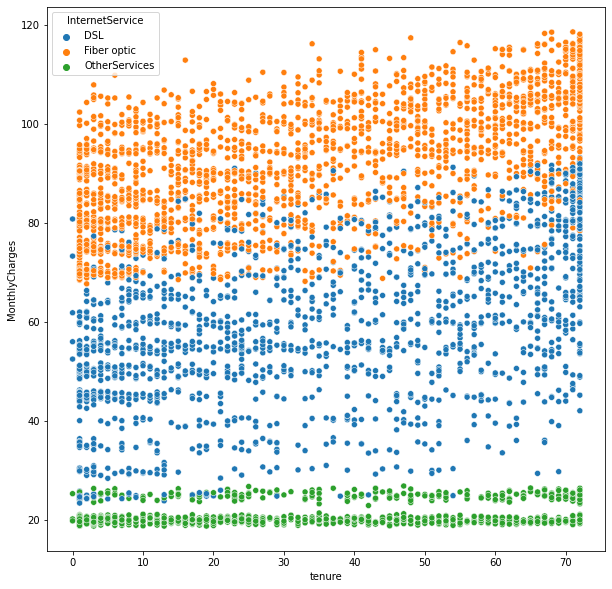

In [44]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df["tenure"], y = df["MonthlyCharges"], hue = df["InternetService"])
plt.show()

**REMARKS ON TENURE - MONTHLY CHARGES SCATTERPLOT**
* From the *scatterplot* above, it can be seen that the `fiber optic` product is the product with the highest MonthlyCharges compared to 2 other products ( DSL and OtherServices)
* The `OtherServices` product is the product with the cheapest MonthlyCharges
* `DSL` MonthlyCharges is between fiber optic and OtherServices
* `OtherServices` MonthlyCharges prices tend to be flat (from time to time, MonthlyCharges more or less the same).
* `DSL` & `FiberOptic` MonthlyCharges prices tend to increase from time to time, although the increase is quite gentle.

<a id="40202"></a>
<font color="lightseagreen" size=+2><b>4.2.2. CATEGORICAL FEATURE WITH TARGET</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

## <center>CATEGORICAL FEATURE WITH TARGET

ada 8 categorical features : ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']
target variables : Churn 



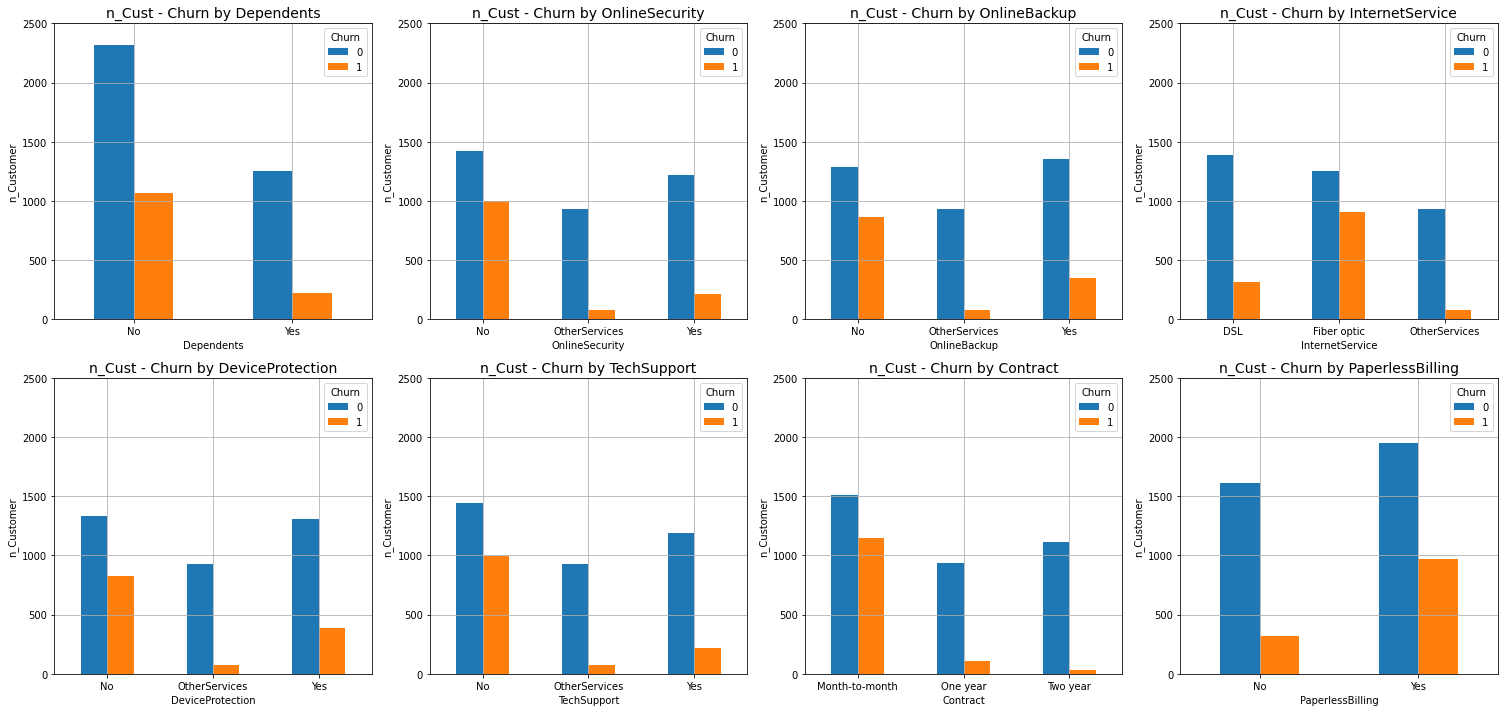

In [45]:
target_n_dependant_categorical(df, categorical_f, "Churn", 4, 2, figsize = (21,10))

### TABULATION

In [46]:
list_ct = []
for cat_feat in categorical_f:
    ct_df = pd.crosstab(df[cat_feat], df["Churn"])
    list_ct.append(ct_df)

churnby_dep, churnby_ol_sec, churnby_ol_bu, churnby_is, churnby_dp, churnby_ts, churnby_contract, churnby_ppbil = list_ct

display_side_by_side(churnby_dep, churnby_ol_sec, churnby_ol_bu, churnby_is, titles = ["Churn by Dependents", "Churn by OnlineSec.", "Churn by OnlineBackup", "Churn by InternetService"])
display_side_by_side(churnby_dp, churnby_ts, churnby_contract, churnby_ppbil, titles = ["Churn by DeviceProtection", "Churn by TechSupport.", "Churn by Contract", "Churn by PaperlessBilling"])

Churn,0,1
Dependents,,
No,2316,1064
Yes,1249,224
Churn,0,1
OnlineSecurity,,
No,1419,1001
OtherServices,928,75
Yes,1218,212
Churn,0,1
OnlineBackup,,


Churn,0,1
DeviceProtection,,
No,1332,830
OtherServices,928,75
Yes,1305,383
Churn,0,1
TechSupport,,
No,1443,999
OtherServices,928,75
Yes,1194,214
Churn,0,1


<br><br>

## <center>CATEGORICAL FEATURE WITH TARGET IN PROPORTION

ada 8 categorical features : ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']
target variables : Churn 



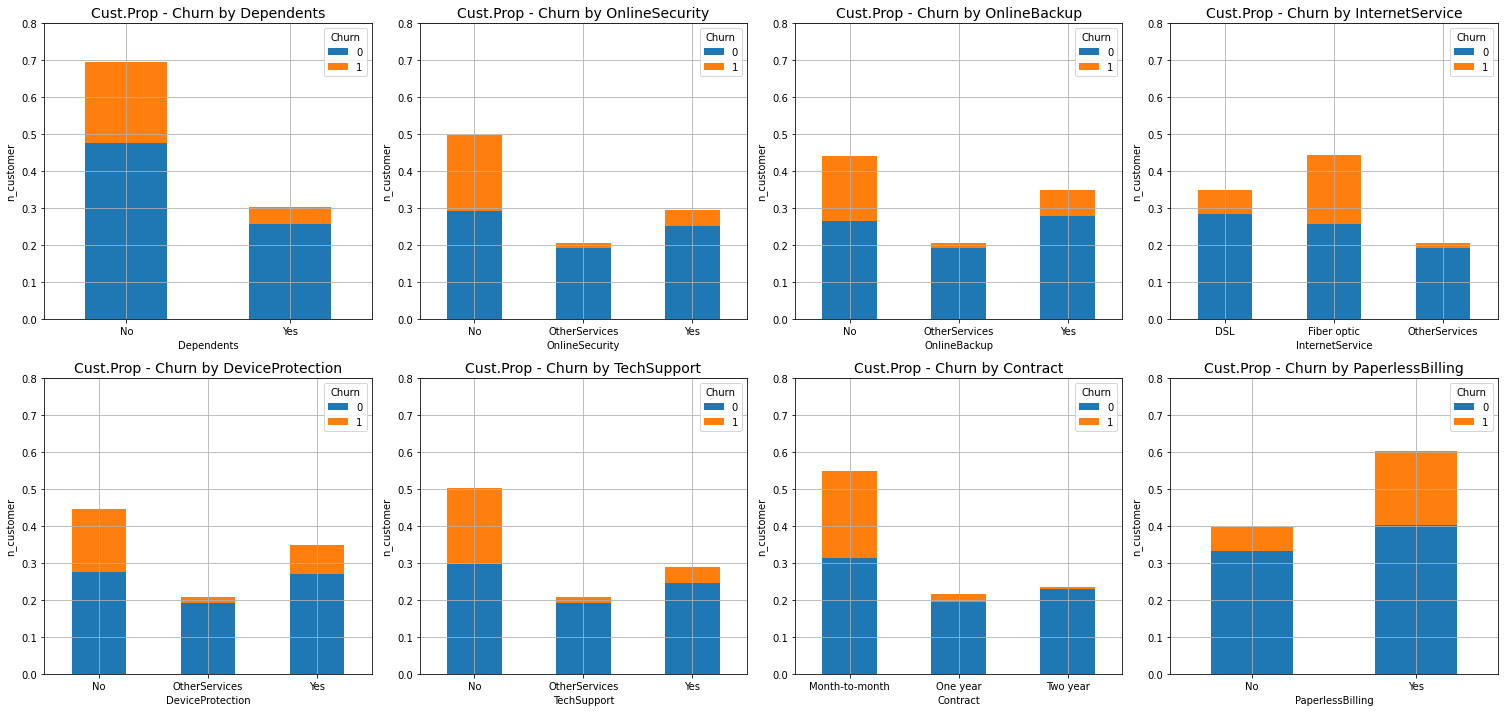

In [47]:
target_n_dependant_categorical_proportion(df, categorical_f, "Churn", 4, 2, figsize = (21,10))

### TABULATION

In [48]:
list_ct = []
for cat_feat in categorical_f:
    ct_df = pd.crosstab(df[cat_feat], df["Churn"], normalize = True).round(5)*100
    list_ct.append(ct_df)

churnby_dep, churnby_ol_sec, churnby_ol_bu, churnby_is, churnby_dp, churnby_ts, churnby_contract, churnby_ppbil = list_ct

display_side_by_side(churnby_dep, churnby_ol_sec, churnby_ol_bu, churnby_is, titles = ["%Churn by Dependents", "%Churn by OnlineSec.", "%Churn by OnlineBackup", "%Churn by InternetService"])
display_side_by_side(churnby_dp, churnby_ts, churnby_contract, churnby_ppbil, titles = ["%Churn by DeviceProtection", "%Churn by TechSupport.", "%Churn by Contract", "%Churn by PaperlessBilling"])

Churn,0,1
Dependents,,
No,47.723,21.925
Yes,25.737,4.616
Churn,0,1
OnlineSecurity,,
No,29.240,20.626
OtherServices,19.122,1.545
Yes,25.098,4.368
Churn,0,1
OnlineBackup,,


Churn,0,1
DeviceProtection,,
No,27.447,17.103
OtherServices,19.122,1.545
Yes,26.891,7.892
Churn,0,1
TechSupport,,
No,29.734,20.585
OtherServices,19.122,1.545
Yes,24.603,4.410
Churn,0,1


**REMARKS ON CATEGORICAL FEATURE WITH TARGET**
* In this section I want to see the correlation between features & target.
* I'll state my assumption based on available data<br><br><br>

**DEPENDENTS**
* 70% TELCO customer live with no `dependents` : 30% TELCO customer live with `dependents` (relatives, family, friends)
* 1/3 of the 70% *customers* who live without `dependents` will churn. The churn rate is quite high when compared to customers who live with dependents.
* My assumption : customer who live without `dependents` can easily stop the service anytime, while customers who live with `dependents` usually discuss first with their `dependents` (after considering several things) and often ends with continuing the services.<br><br><br>

**FEATURES : ONLINESECURITY, ONLINEBACKUP, DEVICEPROTECTION, TECHSUPPORT**
* As I see in the graph above, Churn proportion by `ONLINESECURITY, ONLINEBACKUP, DEVICEPROTECTION, TECHSUPPORT` are more or less the same. hence I'll summarize those four features into `FEATURES`.
* 50% TELCO customer not subsribe for `FEATURES` features : 29% TELCO customers subscribe for `FEATURES` : 21% others are using `OtherServices` that doesn't need `FEATURES`
* 50% of customer who not subscribe for `FEATURES` features will churn. Churn rate in this category is relatively high compared to other category in `FEATURES` features.
* This can indicating several things : 
    * There's a competitor who can give the same service but with `FEATURES` features with better value.
* If churn caused by customer isn't getting `FEATURES` features, maybe TELCO can give several promo for `FEATURES` features. Or bundling purchase with current used services.<br><br><br>

**INTERNETSERVICES**
* 44% TELCO customer using `Fiber Optic` : 35% TELCO customer using `DSL` : 21% TELCO customer using `OtherServices`
* 50% of TELCO customer who use `Fiber Optic` will churn. This churn rate is high compared to `DSL` and `OtherServices`.
* To learn about `INTERNETSERVICES` better, I'll try to connect `INTERNETSERVICE` with other features :
    * [**Churn by `tenure` & `InternetService`**](#churnbytenureinternetservice)
    * [**Churn by `InternetService` & `MonthlyCharges`**](#churnbyinternetservicesmonthlycharges)<br><br><br>
    
**CONTRACT**
* 55% TELCO customer using `Month to Month` contract : 23% TELCO customer use `TwoYear` contract : 21% Others use `OneYear` contract.<br>
>**MONTH TO MONTH**
>* As we can see in the graph, many customer like to use `Month to Month` contract. 
>* It's common payment type for subscribtion based services
>* This type of contract benefiting customer because more flexible and more cashflow friendly for customer (compared to Yearly contract).
>* But the graph also tell us that 40% - 45% customer who use this contract will churn
>* It make sense because customer who use `Month to Month` contract can churn in any month if they no need the services anymore, or find better value services from competitor or other reason.<br>
>
><br>
>
>**YEARLY CONTRACT**
>* This section explain about `TwoYear` and `OneYear` contract.
>* Number of customer who use this contract is not as much as `Month to Month` contract, but the churn rate are very low compared to customer with `Month to Month` contract
>* This can indicating several things like : 
>    * This type of customer is familiar with TELCO services and satisfied with their service
>    * Customer find better value in paying upfront for yearly services
>* The downside of this type of contract, If customer stop in midway for whatever reason, it'll cost customer because they already pay full upfront.<br>

* After we understand each category in `Contract` I can assume several things : 
    * `Month to Month` is benefiting customer because it's flexible in term of payment, but it's not too good for TELCO because there's lack of commitment (especially if the given service is not lived up customer expectation, customer easier to churn, Monthly projection is not secured)
    * `TwoYear` and `OneYear` contract better for TELCO (customer is more commit, monthlyprojection is secured), but it's not too good for customer because they need to pay upfront and if they stop midway it'll cost them.
    * But customer who use yearly contract should already know the risk, familiar with TELCO services and satisfied with current given services. And of course this type of customer have more purchase power than `Monthly to Month` contract custoner<br><br>
    
* Because `Month to Month` is common for subscription based service, if many customer churn in this particular category it means that the given services is not lived up to customer expectation. (it's not possible that 50% of customer who use `Month to Month` contract suddenly stop the services because they don't need the services anymore)
* Find out what makes customer dissatisfied in order to reduce the churn rate
* To learn about `CONTRACT` better, I'll try to connect `CONTRACT` with other features :
    * [**Churn by `tenure` & `Contract`**](#churnbytenurencontract)
    * [**Churn by `tenure` & `Contract` & `InternetService`**](#churnbytenurencontractninternetservice)<br><br>
* After the churn rate is decreasing, we can offer yearly contract to `Month to Month` customer.<br><br>


***PAPERLESBILLING***
* 60% of TELCO customers use `PAPERLESSBILLING` : 40% are not.
* By replacing the *customer* billing method with `PAPERLESSBILLING`, it provides the following benefits:
    * Late bill payments due to missing physical bills.
    * Reduce manpower resources for administrative activities, manpower can be allocated to other jobs that are more important or require more resources.
    * Paperless administrative task reduces costs for office stationery such as pens, paper and so on.
    * With the bill that is sent on time and scheduled via electronic, payments made by *customers* can be on time too. Which when compared to conventional there is a risk of late payment due to missing physical bills
    * You can promote yourself that TELCO is a technology company that supports the *Earth Day* movement, one of which is by implementing `PAPERLESSBILLING`.
    * Besides that, actually `PAPERLESSBILLING` is more convinient than physical bills, maybe TELCO needs to provide information to customers for the implementation of `PAPERLESSBILLING` (for customers who have not implemented a paperless billing system)

<a id="40203"></a>
<font color="lightseagreen" size=+2><b>4.2.3. MULTIPLE FEATURES WITH TARGET</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* In the previous section we have partially observed numerical & categorical features with target.
* In this section, I'll change categorical value to numerical so we can see the correlation with target in more depth. I'll use ColumnTransformer and OneHotEncoder
* Number of *categorical values* in each *feature* is still relevant for us to use One Hot Encoder (the number of category values is not too much)
* We will see the correlation between features by using heatmap to strengthen the analysis that has been done previously and to check if there're something that I might missed.

In [49]:
# Define variable that'll OneHotEncoded
ohe_dummy_var = ['Dependents', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'Churn']

# Make the transformer to process dummy data
dummy_transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(), ohe_dummy_var)
    ], remainder = "passthrough")

# Transform df_0 data, save in new variables
df_dummies = dummy_transformer.fit_transform(df_0)

# df_dummies is in array form. not in data frame

Obtain feature names from the transformer

In [50]:
# see features name generated by OneHotEncoder
dummy_feature_name = dummy_transformer.get_feature_names()
dummy_feature_name

['onehot__x0_No',
 'onehot__x0_Yes',
 'onehot__x1_No',
 'onehot__x1_No internet service',
 'onehot__x1_Yes',
 'onehot__x2_No',
 'onehot__x2_No internet service',
 'onehot__x2_Yes',
 'onehot__x3_DSL',
 'onehot__x3_Fiber optic',
 'onehot__x3_No',
 'onehot__x4_No',
 'onehot__x4_No internet service',
 'onehot__x4_Yes',
 'onehot__x5_No',
 'onehot__x5_No internet service',
 'onehot__x5_Yes',
 'onehot__x6_Month-to-month',
 'onehot__x6_One year',
 'onehot__x6_Two year',
 'onehot__x7_No',
 'onehot__x7_Yes',
 'onehot__x8_No',
 'onehot__x8_Yes',
 'tenure',
 'MonthlyCharges']

Adjust features names to my liking (I understand from what feature this variables come from)

In [51]:
# Adjust features name to my liking.
dummy_feature_name[0] = "dependents_onehot__x0_No"
dummy_feature_name[1] = "dependents_onehot__x0_Yes"

dummy_feature_name[2] = "OnlineSecurity_onehot__x1_No"
dummy_feature_name[3] = "OnlineSecurity_onehot__x1_OtherServices"
dummy_feature_name[4] = "OnlineSecurity_onehot__x1_Yes"

dummy_feature_name[5] = "OnlineBackup_onehot__x2_No"
dummy_feature_name[6] = "OnlineBackup_onehot__x2_OtherServices"
dummy_feature_name[7] = "OnlineBackup_onehot__x2_Yes"

dummy_feature_name[8] = "InternetService_onehot__x3_DSL"
dummy_feature_name[9] = "InternetService_onehot__x3_Fiber optic"
dummy_feature_name[10] = "InternetService_onehot__x3_OtherServices"

dummy_feature_name[11] = "DeviceProtection_onehot__x4_No"
dummy_feature_name[12] = "DeviceProtection_onehot__x4_OtherServices"
dummy_feature_name[13] = "DeviceProtection_onehot__x4_Yes"

dummy_feature_name[14] = "TechSupport_onehot__x5_No"
dummy_feature_name[15] = "TechSupport_onehot__x5_OtherServices"
dummy_feature_name[16] = "TechSupport_onehot__x5_Yes"

dummy_feature_name[17] = "Contract_onehot__x6_Month-to-month"
dummy_feature_name[18] = "Contract_onehot__x6_One year"
dummy_feature_name[19] = "Contract_onehot__x6_Two year"

dummy_feature_name[20] = "PaperlessBilling_onehot__x7_No"
dummy_feature_name[21] = "PaperlessBilling_onehot__x7_Yes"

dummy_feature_name[22] = "Churn_onehot__x8_No"
dummy_feature_name[23] = "Churn_onehot__x8_Yes"

# Confirming Changes
dummy_feature_name

['dependents_onehot__x0_No',
 'dependents_onehot__x0_Yes',
 'OnlineSecurity_onehot__x1_No',
 'OnlineSecurity_onehot__x1_OtherServices',
 'OnlineSecurity_onehot__x1_Yes',
 'OnlineBackup_onehot__x2_No',
 'OnlineBackup_onehot__x2_OtherServices',
 'OnlineBackup_onehot__x2_Yes',
 'InternetService_onehot__x3_DSL',
 'InternetService_onehot__x3_Fiber optic',
 'InternetService_onehot__x3_OtherServices',
 'DeviceProtection_onehot__x4_No',
 'DeviceProtection_onehot__x4_OtherServices',
 'DeviceProtection_onehot__x4_Yes',
 'TechSupport_onehot__x5_No',
 'TechSupport_onehot__x5_OtherServices',
 'TechSupport_onehot__x5_Yes',
 'Contract_onehot__x6_Month-to-month',
 'Contract_onehot__x6_One year',
 'Contract_onehot__x6_Two year',
 'PaperlessBilling_onehot__x7_No',
 'PaperlessBilling_onehot__x7_Yes',
 'Churn_onehot__x8_No',
 'Churn_onehot__x8_Yes',
 'tenure',
 'MonthlyCharges']

See the transformed data in form of dataframe

In [52]:
# Make dataframe
df_dummies = pd.DataFrame(df_dummies, columns = dummy_feature_name)
df_dummies.head(5)

,dependents_onehot__x0_No,dependents_onehot__x0_Yes,OnlineSecurity_onehot__x1_No,OnlineSecurity_onehot__x1_OtherServices,OnlineSecurity_onehot__x1_Yes,OnlineBackup_onehot__x2_No,OnlineBackup_onehot__x2_OtherServices,OnlineBackup_onehot__x2_Yes,InternetService_onehot__x3_DSL,InternetService_onehot__x3_Fiber optic,...,TechSupport_onehot__x5_Yes,Contract_onehot__x6_Month-to-month,Contract_onehot__x6_One year,Contract_onehot__x6_Two year,PaperlessBilling_onehot__x7_No,PaperlessBilling_onehot__x7_Yes,Churn_onehot__x8_No,Churn_onehot__x8_Yes,tenure,MonthlyCharges
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,72.90
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0,82.65
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,64.0,47.85
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,72.0,69.65
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,23.60


<a id="correlationheatmap"></a>
Make the heatmap with transformed data

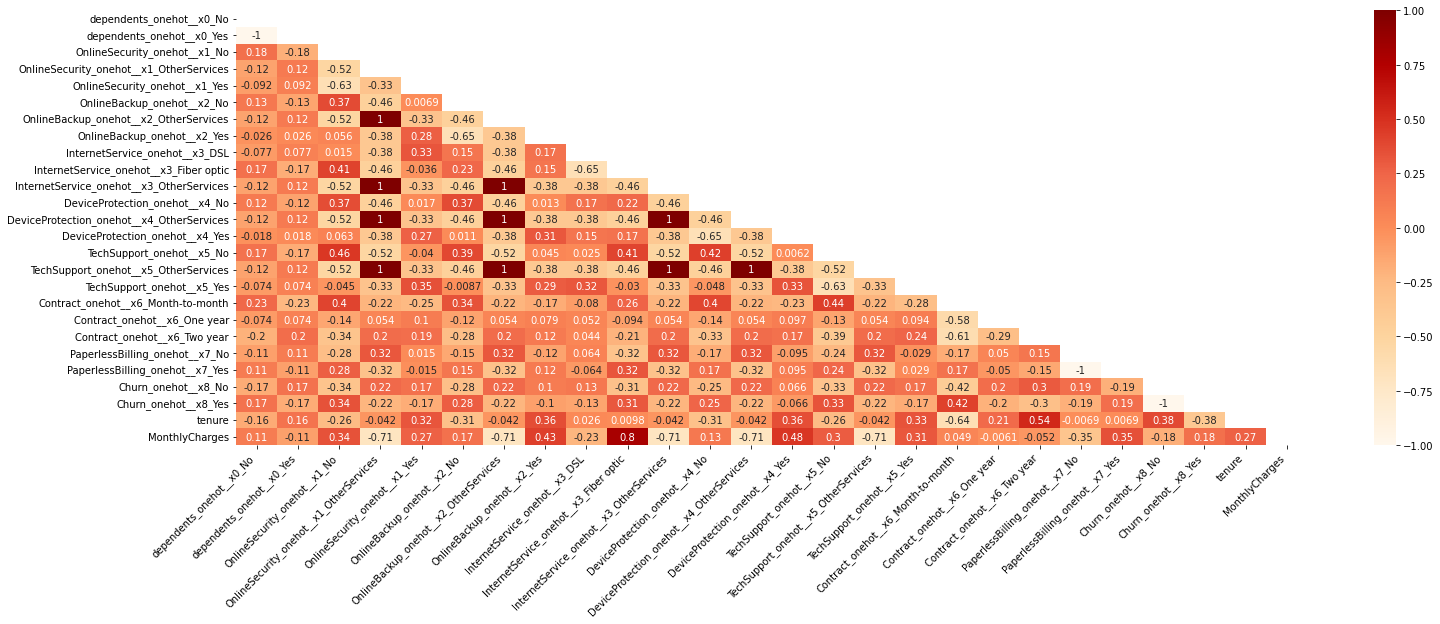

In [53]:
# Calculate correlation using spearman
dummies_corr = df_dummies.corr(method = "spearman")

# Not Square heatmap rules
mask = np.triu(np.ones_like(dummies_corr))

# make the heatmap
plt.figure(figsize = (24,8))
sns.heatmap(dummies_corr, cmap="OrRd", annot = True, mask = mask)
plt.xticks(rotation = 45, ha = "right")
plt.show()

**REMARKS ON HEATMAP TRANSFORMED DATA & FEATURES**
* Categorical values *OtherServices* on `OnlineBackup, InternetServices, DeviceProtection, TechSuppor and OnlineSecurity` have absolute correlation (strong correlation = 1). So OtherServices of each feature is the same
* tenure - contract_onehot_x6_Two years has 0.54 correlation value (moderate correlation, 0.3 - 0.7). This can indicate that customer who use `TwoYear` type contract has high tenure
* MonthlyCharges - InternetService_onehot_X3_Fiber optic has 0.8 correlation value (strong correlation, 0.7 - 1). This can indicate that fiber optic has highly MonthlyCharges.
* Churn - Contract_onehot__x6_Month-to-month has 0.42 correlation value (moderate correlation, 0.3 - 0.7). This can indicate that people might churn if they use `Month to Month` type contract.<br><br>

<a id="churnbytenureinternetservice"></a>
## <center>CHURN BY TENURE & INTERNET SERVICES

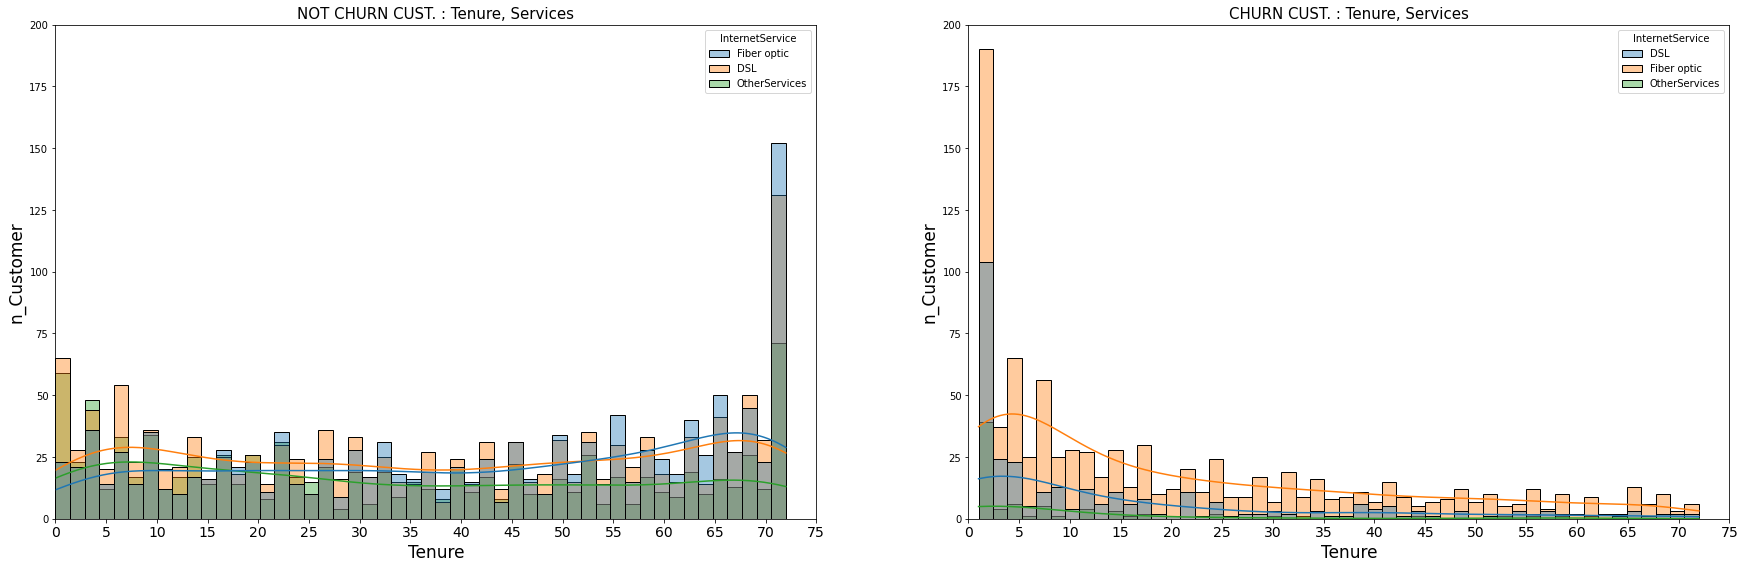

In [54]:
plt.figure(figsize = (30,20))
plt.subplot(221)
sns.histplot(data = df[df["Churn"] == 0], x = "tenure" ,hue = "InternetService", kde=True, alpha = 0.4, bins = 50)
plt.xlim(0,75)
plt.ylim(0, 200)
plt.xticks(ticks = np.arange(0, 80, 5), size = 14)
plt.title("NOT CHURN CUST. : Tenure, Services", fontsize = 15)
plt.xlabel("Tenure", size = 17)
plt.ylabel("n_Customer", size = 17)

plt.subplot(222)
sns.histplot(data = df[df["Churn"] == 1], x = "tenure" ,hue = "InternetService", kde=True, alpha = 0.4, bins = 50)
plt.xlim(0,75)
plt.ylim(0, 200)
plt.xticks(ticks = np.arange(0, 80, 5), size = 14)
plt.title("CHURN CUST. : Tenure, Services", fontsize = 15)
plt.xlabel("Tenure", size = 17)
plt.ylabel("n_Customer", size = 17)

plt.show()

**REMARKS ON CHURN BY TENURE & INTERNET SERVICES**
* We can see several pattern from the given graph above : 
    * Much `fiber optic` customer will churn compared to other service categories
    * customer will churn in the first several month (0 - 5) especially `fiber optic` services (churn rate for `fiber optic category` is consistent along tenure)
    * customer who'll not churn based on churn is well diversed. We can seet that TELCO have loyal customer that have subscribe for >70 months<br><br>

* Those pattern can indicate several things : 
    * Customers is not satisfied with the service in the several first month (0 - 5) (fiber optic, DSL, & otherservices). 
    * Customers might not getting the fix they need when trouble arise in that several first month, hence customer churn.
    * There's a competitor which can give better service or value for `fiber optic` services. 
    * TELCO `fiber optic` services having trouble that need a fix.<br><br>
    
* Recommendation : 
    * Please check what happen in the first 5 month to all customers
    * Please check fiber optic infrastructure
    * Research about TELCO competitor who can provide `fiber optic` services
    * Ask directly to customer why they churn.<br><br>

<a id="churnbytenurencontract"></a>
## <center>CHURN BY TENURE & CONTRACT

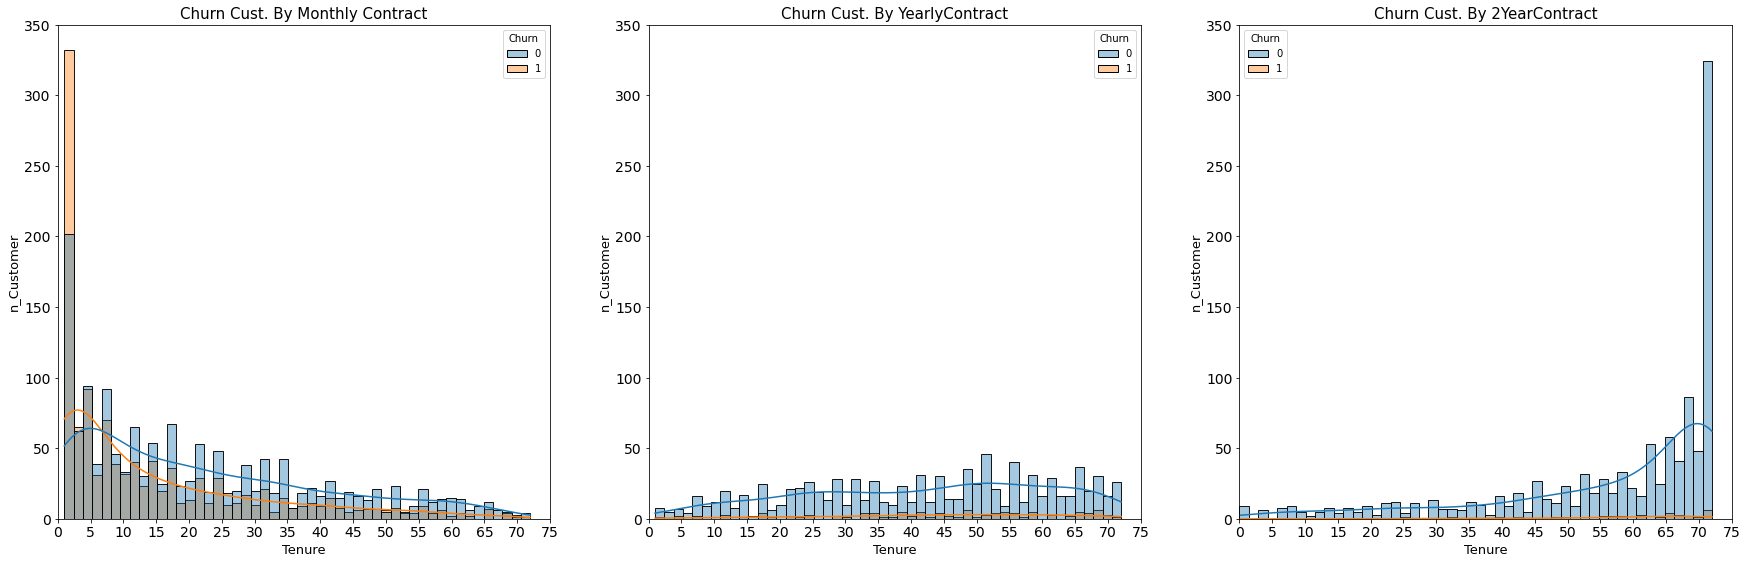

In [55]:
plt.figure(figsize = (30,20))
plt.subplot(231)
sns.histplot(data = df[df["Contract"] == "Month-to-month"], x = "tenure" ,hue = "Churn", kde = True, alpha = 0.4, bins = 50)
plt.xlim(0,75)
plt.ylim(0, 350)
plt.xticks(ticks = np.arange(0, 80, 5), size = 14)
plt.yticks(ticks = np.arange(0, 400, 50), size = 14)
plt.title("Churn Cust. By Monthly Contract", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(232)
sns.histplot(data = df[df["Contract"] == "One year"], x = "tenure" ,hue = "Churn", kde = True, alpha = 0.4, bins = 50)
plt.xlim(0,75)
plt.ylim(0, 350)
plt.xticks(ticks = np.arange(0, 80, 5), size = 14)
plt.yticks(ticks = np.arange(0, 400, 50), size = 14)
plt.title("Churn Cust. By YearlyContract", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(233)
sns.histplot(data = df[df["Contract"] == "Two year"], x = "tenure" ,hue = "Churn", kde = True, alpha = 0.4, bins = 50)
plt.xlim(0,75)
plt.ylim(0, 350)
plt.xticks(ticks = np.arange(0, 80, 5), size = 14)
plt.yticks(ticks = np.arange(0, 400, 50), size = 14)
plt.title("Churn Cust. By 2YearContract", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.show()

**REMARKS ON CHURN BY TENURE & CONTRACT**
* We can see several pattern from the given graph above : 
    * Many customer that will churnis from `Month to Month` category (especially first 0 - 25 month).
    * But we can see that the longer the customer subscribe, the less customer will churn. I'll assume that customer transisitoning from `Month to month` to `Yearly` to `2Year` contract.
    * Small percentage of customer who use Yearlycontract will churn, I assume that this small percentage customer doesn't need TELCO services anymore.
    
Recommendation : <br>
 * Improve services in the first several month (many customer in this section churn)
 * Improve overall given services, increase value for TELCO services so even if customer use `Month to month` contract, they'll not easily churn.
 * Ask directly to customer why they churn.<br><br>

<a id="churnbyinternetservicesmonthlycharges"></a>
## <center>CHURN BY INTENRET SERVICE & MONTHLY CHARGES

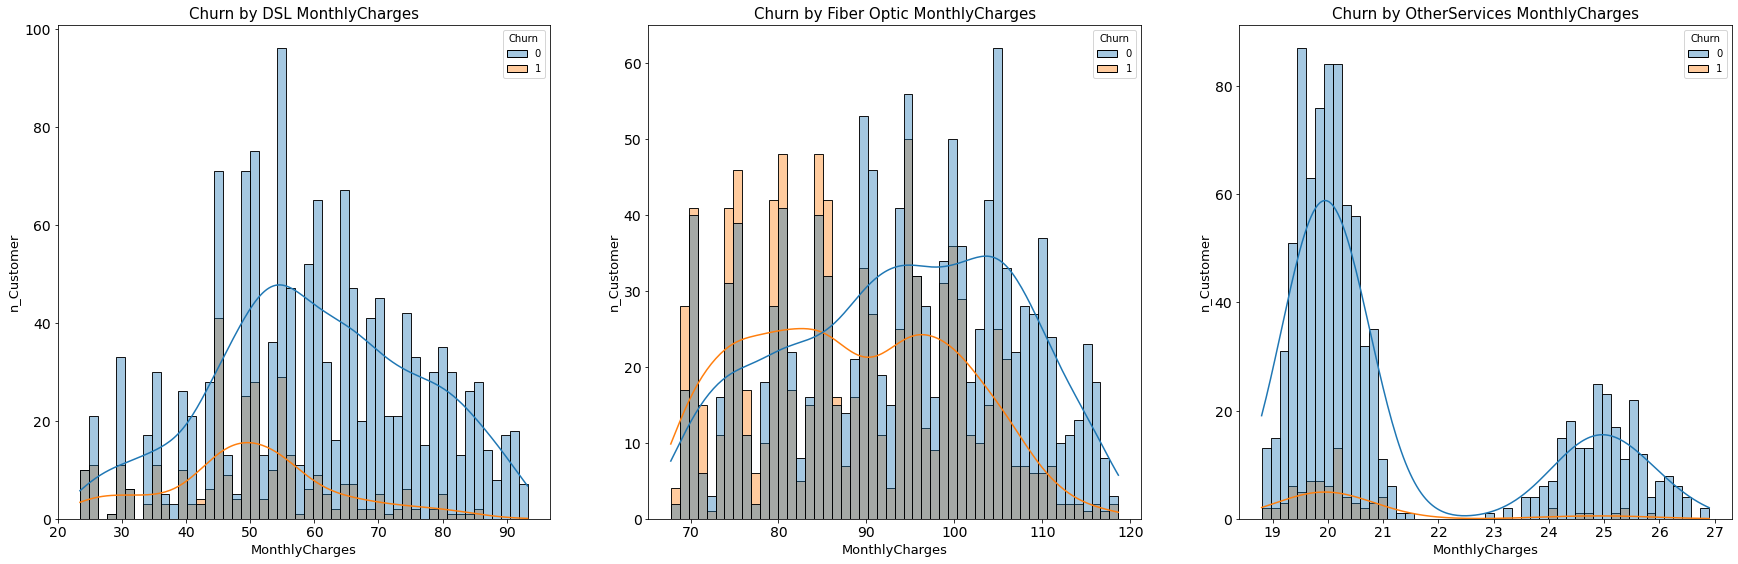

Median MonthlyCharges for DSL : 56.15
Median MonthlyCharges for DSL : 91.775
Median MonthlyCharges for DSL : 20.15


In [56]:
plt.figure(figsize = (30,20))
plt.subplot(231)
sns.histplot(data = df[df["InternetService"] == "DSL"], x = "MonthlyCharges", hue = "Churn", kde = True, alpha = 0.4, bins = 50)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.title("Churn by DSL MonthlyCharges", fontsize = 15)
plt.xlabel("MonthlyCharges", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(232)
sns.histplot(data = df[df["InternetService"] == "Fiber optic"], x = "MonthlyCharges", hue = "Churn", kde = True, alpha = 0.4, bins = 50)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.title("Churn by Fiber Optic MonthlyCharges", fontsize = 15)
plt.xlabel("MonthlyCharges", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(233)
sns.histplot(data = df[df["InternetService"] == "OtherServices"], x = "MonthlyCharges", hue = "Churn", kde = True, alpha = 0.4, bins = 50)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.title("Churn by OtherServices MonthlyCharges", fontsize = 15)
plt.xlabel("MonthlyCharges", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.show()

print("Median MonthlyCharges for DSL :", df[df["InternetService"] == "DSL"]["MonthlyCharges"].median())
print("Median MonthlyCharges for DSL :", df[df["InternetService"] == "Fiber optic"]["MonthlyCharges"].median())
print("Median MonthlyCharges for DSL :", df[df["InternetService"] == "OtherServices"]["MonthlyCharges"].median())

**REMARKS ON CHURN BY INTERNETSERVICES & MONTHLYCHARGES**
* We can see several pattern from the given graph above : 
    * `Fiber optic` has the highest MonthlyCharges from other available services (range about \\$ 70 - \\$120)
    * There's 2 price range for otherservices : \\$ 19 - \\$21 & \\$ 23 - \\$27
    * `Fiber optic` customers > `DSL` customers > `Otherservices` customers
    * This can indicating that `fiber optic` services :
        * with the given price is not lived up to customer expectation 
        * The price simply too high
        * There's a problem in `fiber optic` services 
    
Recommendation : <br>
* Learn about competitor who can provide `fiber optic` services as well and do price analysis
* Check `fiber optic` infrastructure.
* Ask directly to customer why they churn.

<a id="churnbytenurencontractninternetservice"></a>
## <center>CHURN BY CONTRACT & INTERNET SERVICES & TENURE

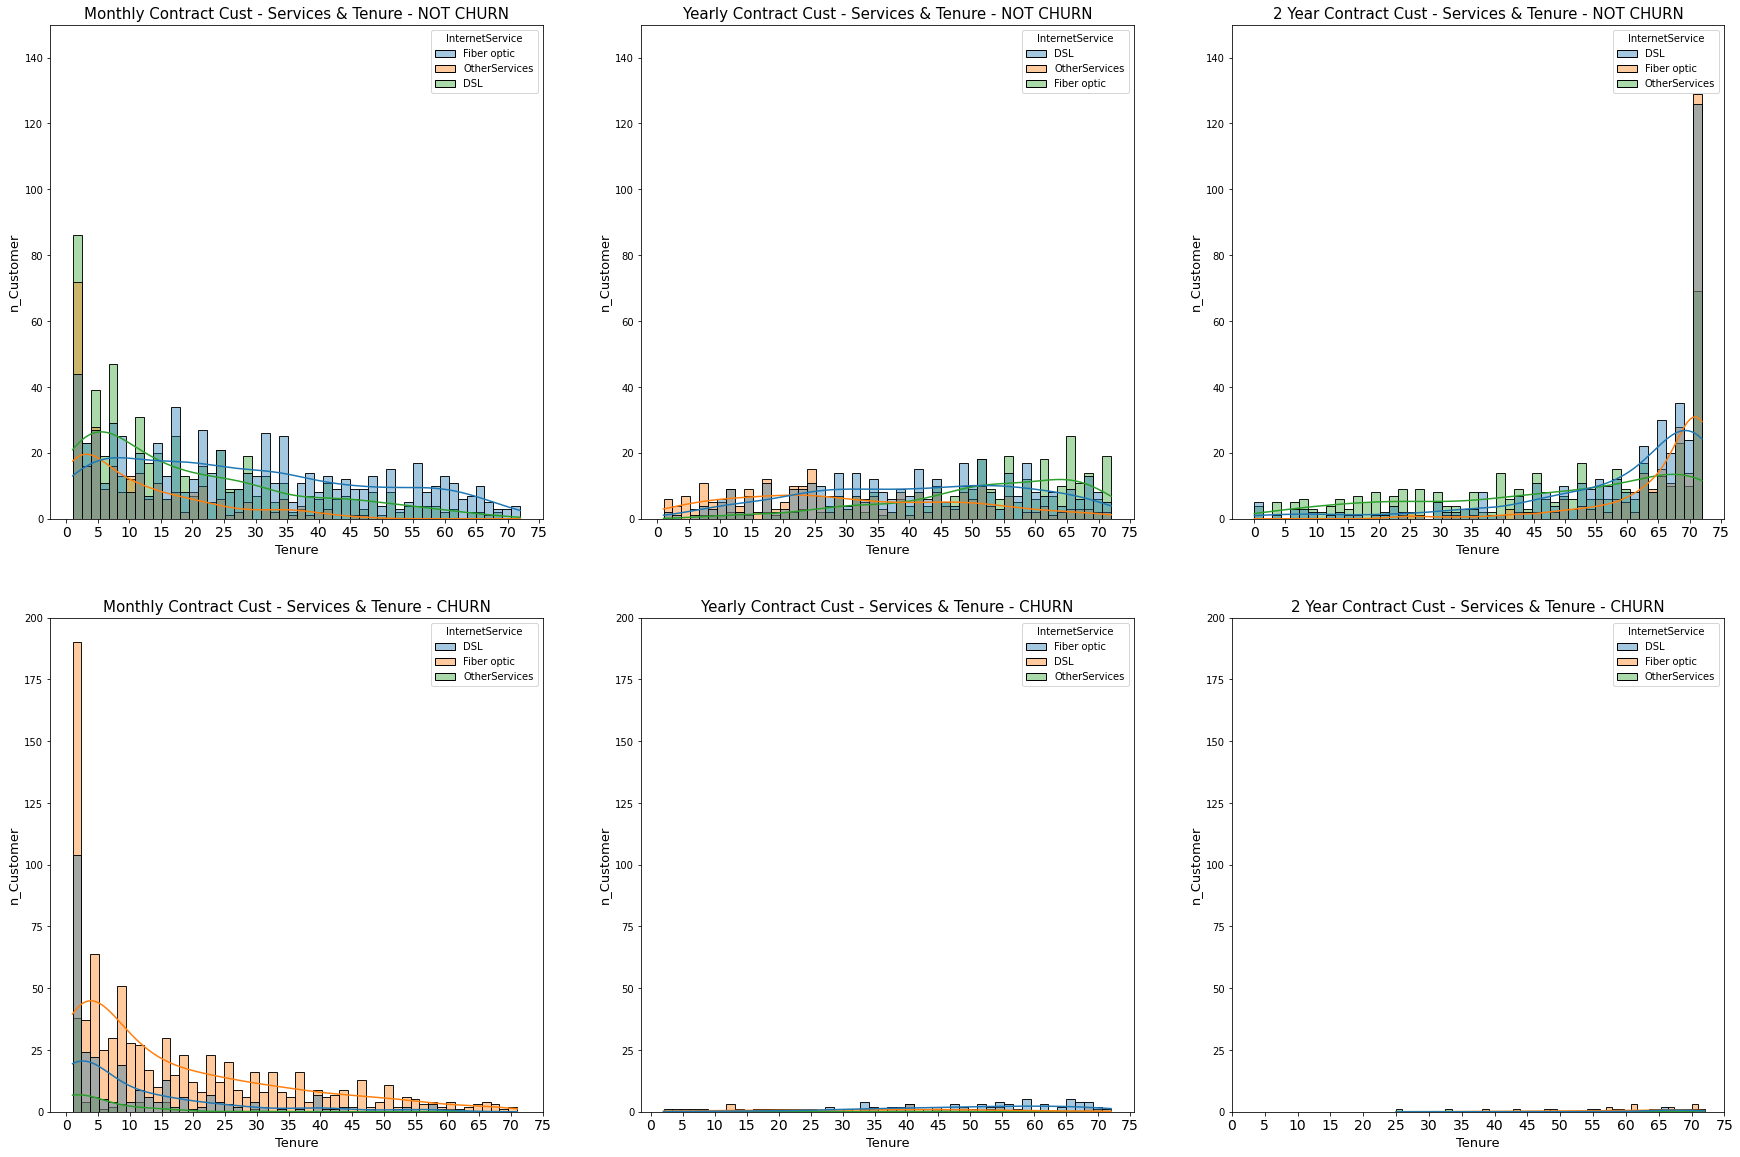

In [57]:
plt.figure(figsize = (30,20))
plt.subplot(231)
sns.histplot(data = df[(df["Contract"] == "Month-to-month")&(df["Churn"] == 0)], x = "tenure" ,hue = "InternetService", kde = True, alpha = 0.4, bins = 50)
plt.ylim(0, 150)
plt.xticks(ticks = np.arange(0, 80, 5), size = 14)
plt.title("Monthly Contract Cust - Services & Tenure - NOT CHURN", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(232)
sns.histplot(data = df[(df["Contract"] == "One year")&(df["Churn"] == 0)], x = "tenure" ,hue = "InternetService", kde = True, alpha = 0.4, bins = 50)
plt.ylim(0, 150)
plt.xticks(ticks = np.arange(0, 80, 5), size = 14)
plt.title("Yearly Contract Cust - Services & Tenure - NOT CHURN", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(233)
sns.histplot(data = df[(df["Contract"] == "Two year")&(df["Churn"] == 0)], x = "tenure" ,hue = "InternetService", kde = True, alpha = 0.4, bins = 50)
plt.ylim(0, 150)
plt.xticks(ticks = np.arange(0, 80, 5), size = 14)
plt.title("2 Year Contract Cust - Services & Tenure - NOT CHURN", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(234)
sns.histplot(data = df[(df["Contract"] == "Month-to-month")&(df["Churn"] == 1)], x = "tenure" ,hue = "InternetService", kde = True, alpha = 0.4, bins = 50)
plt.ylim(0, 200)
plt.xticks(ticks = np.arange(0, 80, 5), size = 14)
plt.title("Monthly Contract Cust - Services & Tenure - CHURN", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(235)
sns.histplot(data = df[(df["Contract"] == "One year")&(df["Churn"] == 1)], x = "tenure" ,hue = "InternetService", kde = True, alpha = 0.4, bins = 50)
plt.ylim(0, 200)
plt.xticks(ticks = np.arange(0, 80, 5), size = 14)
plt.title("Yearly Contract Cust - Services & Tenure - CHURN", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(236)
sns.histplot(data = df[(df["Contract"] == "Two year")&(df["Churn"] == 1)], x = "tenure" ,hue = "InternetService", kde = True, alpha = 0.4, bins = 50)
plt.ylim(0, 200)
plt.xticks(ticks = np.arange(0, 80, 5), size = 14)
plt.title("2 Year Contract Cust - Services & Tenure - CHURN", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.show()

**REMARKS ON CHURN BY INTERNETSERVICES & MONTHLYCHARGES**
* We can see several pattern from the given graph above : 
    * Now we understand that many customer churn on Monthly Contract category
    * Highest churn rate happen to custoemr who used `fiber optic` (consistent along tenure)
    * In the first several month ( 0 - 5 months), many customer churn in 3 services (DSL, fiber optic, Otherservices)
    * From customer who aren't churn, I assume that they transitioning from using monthly contract to yearly contract.
    
Recommendation : <br>
* Same as stated several times above

<a id="5"></a>
<font color="lightseagreen" size=+3><b>5. MACHINE LEARNING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<a id="501"></a>
<font color="lightseagreen" size=+2><b>5.1. DATA PREPARATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

What we've learn from previous section : 
* Metric that will be used in this case is `recall`
* We've found no outliers from `tenure` & `MonthlyCharges`. I'll use MinMaxScaler in this study.
    * Why I scale the data ? Because I understand that there's different unit for tenure & MonthlyCharges. I standardize the data, hoping that I'll get a better result
    * I understand that there's several algorith that is not benefiting from scaling, but I think scaling will do no harm. In my opinion normalize or standardize data is a good practice.
* Because the data is imbalance, wee need to handle the imbalance. (73% not churn : 27% churn)
* Categorial value is not that much, so we can use OneHotEncoder.
* I assume that PaperlessBilling is not causing customer to churn, hence I'll drop that feature
* I'll explain more while I'm progressing

Prepare the data

In [58]:
# Arrange dataframe 
df = df[categorical_f + numerical_f + target]

# drop paperlessbilling features
df.drop("PaperlessBilling", axis = 1, inplace = True)
df.head(5)

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges,Churn
0,Yes,No,No,DSL,Yes,Yes,Month-to-month,9,72.90,1
1,No,No,Yes,Fiber optic,Yes,No,Month-to-month,14,82.65,0
2,No,Yes,No,DSL,Yes,Yes,Two year,64,47.85,1
3,No,Yes,Yes,DSL,Yes,Yes,Two year,72,69.65,0
4,No,OtherServices,OtherServices,OtherServices,OtherServices,OtherServices,Month-to-month,3,23.60,0


Let's define several preprocessing step : 
* Variables (features that will be encoded & scaled)
* Preprocessing preparation (column transfomer)
* Train test split

In [59]:
# Prepare the variable that'll be encoded & scaled.
ohe_var = ["Dependents", "OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Contract"]
mm_sc_var = ["tenure", "MonthlyCharges"]
target = ["Churn"]

In [60]:
# Prepare preprocessing method that will be used
# use Columntransformer
transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(drop = "first"), ohe_var),
    ("mm_sc", MinMaxScaler(), mm_sc_var)]
    , remainder = "passthrough")

In [61]:
# Prepare variables & target
X = df[["Dependents", "OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Contract", "tenure", "MonthlyCharges"]]
Y = df["Churn"]

In [62]:
# Split the data into train & test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 8888)

We can see train test split data as follows

In [63]:
# show train test split data
display_side_by_side(X_train.head(5), X_test.head(5), titles = ["X Data Train", "X Data Test"])
display_side_by_side(pd.DataFrame(Y_train, columns = ["Churn"]).head(5), pd.DataFrame(Y_test, columns = ["Churn"]).head(5), titles = ["TargetTrain", "TargetTest"])

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges
246,No,Yes,No,DSL,Yes,Yes,Month-to-month,15,58.95
2331,No,Yes,No,DSL,Yes,Yes,One year,49,84.35
1376,No,No,No,DSL,Yes,No,Month-to-month,45,50.25
1086,No,OtherServices,OtherServices,OtherServices,OtherServices,OtherServices,Two year,6,19.55
461,No,OtherServices,OtherServices,OtherServices,OtherServices,OtherServices,Two year,40,20.60
,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges
353,No,No,Yes,Fiber optic,No,No,One year,69,95.65
269,No,No,No,Fiber optic,Yes,No,Month-to-month,29,98.60
4425,Yes,No,No,DSL,Yes,Yes,One year,18,54.40
3977,Yes,Yes,Yes,DSL,Yes,No,Two year,72,70.65


,Churn
246,0
2331,1
1376,0
1086,0
461,0
,Churn
353,0
269,1
4425,0
3977,0


<a id="502"></a>
<font color="lightseagreen" size=+2><b>5.2. BASE MODEL EVALUATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

What we'll do in this section : 
* Define the model that'll be used in this study (I understand that there's no algorithm that can works best on all kind of data, hence I'll try several model to see which fit better to our data)
* Model will use it's default parameter
* We'll se how those default model perform in cross validation & test set
* I use random_state so that :
    * When we run this book multiple time, it'll give same result
    * Change that happen to metric score are not due to random data<br><br>

**DEFINE MODEL & VARIABLES**

In [64]:
# Baseline model, default model
base_m_logreg = LogisticRegression(random_state = 8888)
base_m_knn = KNeighborsClassifier()
base_m_dt = DecisionTreeClassifier(random_state = 8888)

# boosting
# random forest
base_m_rf = RandomForestClassifier(random_state = 8888)

# Adaboost
tree_ada_base = DecisionTreeClassifier(random_state = 8888)
base_m_tree_ada = AdaBoostClassifier(tree_ada_base, random_state = 8888)

# GradientBoost
base_m_gbc = GradientBoostingClassifier(random_state = 8888)

# XGBoost
base_m_xgb = XGBClassifier(random_state = 8888)


# Compile our basic model in a list
base_m_compile = [base_m_logreg, base_m_knn, base_m_dt, base_m_rf, base_m_tree_ada, base_m_gbc, base_m_xgb]

# Several variables consist of our model name and process given to the model
# Classifier name in order
model_name = ["Logreg", "KNN", "DT", "RF", "AB", "GB", "XGB"]

# base model
base_m_name = ["base_m_logreg", "base_m_knn", "base_m_dt", "base_m_rf", "base_m_tree_ada", "base_m_gbc", "base_m_xgb"]

# base model + oversampling
base_m_oversamp_name = ["oversamp_base_m_logreg", "oversamp_base_m_knn", "oversamp_base_m_dt", "oversamp_base_m_rf", 
                        "oversamp_base_m_tree_ada", "oversamp_base_m_gbc", "oversamp_base_m_xgb"]

# base model + undersampling 
base_m_undersamp_name = ["undersamp_base_m_logreg", "undersamp_base_m_knn", "undersamp_base_m_dt", "undersamp_base_m_rf", "undersamp_base_m_tree_ada",
                         "undersamp_base_m_gbc", "undersamp_base_m_xgb"]

**BENCHMARK MODEL USING CROSS VALIDATION**

In [65]:
# define cross validation method that'll be used
skfold = StratifiedKFold(n_splits = 10)

# make empty list to compule cross validation result
cv_base_model_best_score = []

# variable consist of name for dataframe
cv_col_metrics_ = ["base_cv.recall.mean", "base_cv.recall.std",
                "base_cv.avg_prec.mean", "base_cv.avg_prec.std",
                "base_cv.precision.mean", "base_cv.precision.std",
                "base_cv.acc.mean", "base_cv.acc.std"]

# using forloop to do cross validation
for base_model in base_m_compile:
    
    # define pipemodel
    model_pipe = Pipeline([
        ("preprocessing",transformer),
        ("model", base_model)
        ])
    
    # cross validation process
    # using cross validate so I can get multiple metrics on 1 run.
    base_model_cv = cross_validate(model_pipe, X_train, Y_train, cv = skfold, scoring = ["accuracy", "recall", "precision", "average_precision"], n_jobs = -1)
    
    # save cross validation result 
    cv_base_model_best_score.append([base_model_cv["test_recall"].mean(), base_model_cv["test_recall"].std(),
                             base_model_cv["test_average_precision"].mean(), base_model_cv["test_average_precision"].std(),
                             base_model_cv["test_precision"].mean(), base_model_cv["test_precision"].std(),
                             base_model_cv["test_accuracy"].mean(), base_model_cv["test_accuracy"].std()])

# cross validation result in dataframe
df_base_m_cv_score = (pd.DataFrame(cv_base_model_best_score, columns = cv_col_metrics_, index = base_m_name) * 100).round(5)

# printout with title
display_side_by_side(df_base_m_cv_score, titles = ["Basic Model | Cross Validation Result"])

,base_cv.recall.mean,base_cv.recall.std,base_cv.avg_prec.mean,base_cv.avg_prec.std,base_cv.precision.mean,base_cv.precision.std,base_cv.acc.mean,base_cv.acc.std
base_m_logreg,50.77670,3.52870,65.55421,3.07741,62.86835,2.95193,78.95403,1.20544
base_m_knn,48.15534,3.19652,53.03976,2.93358,57.63945,3.28709,76.84202,1.44630
base_m_dt,49.51456,3.13097,38.29784,1.34509,49.54858,2.70752,73.13207,1.39873
base_m_rf,46.69903,4.47972,57.67734,3.40662,58.51942,4.44535,76.99633,1.76025
base_m_tree_ada,45.82524,3.38555,49.14620,4.11193,51.14613,4.59739,73.90447,2.16122
base_m_gbc,49.80583,4.34296,64.42212,4.42165,63.75265,4.94453,79.00545,1.59667
base_m_xgb,48.73786,3.67909,58.23742,4.92276,56.16914,5.17467,76.19782,2.33425


**BENCHMARK MODEL USING TEST SET**

In [66]:
# empty list to accomodate result using test set
base_model_test_score = []

# variables consist of name for dataframe
test_col_metrics_ = ["base_test_recall", "base_test_avg_prec", "base_test_precision", "base_test_acc"]


# Using forloop to predict using test set
for modelname, model in zip(base_m_name, base_m_compile):
    
    # define pipemodel
    model_pipe = Pipeline([
        ("preprocessing",transformer),
        ("model", model)
        ])
    
    # train model
    model_pipe.fit(X_train, Y_train)
    
    # predict class & proba
    # predict proba to class 1 (churn customer)
    Y_pred_proba_ = model_pipe.predict_proba(X_test)[:,1]
    
    # predict class
    Y_pred_class_ = model_pipe.predict(X_test)
    
    # hasil scoring disimpan dalam sebuah list
    base_model_test_score.append([recall_score(Y_test, Y_pred_class_), # recall use class
                                      average_precision_score(Y_test, Y_pred_proba_), # AP use proba
                                      precision_score(Y_test, Y_pred_class_), # precision use class
                                      accuracy_score(Y_test, Y_pred_class_)]) # acc use class
    
    # Classification report
    print("--"*32)
    print(f"{modelname}")
    print("--"*32)    
    print(classification_report(Y_test, Y_pred_class_), "\n\n")

# Metrics in dataframe
df_base_m_test_score = (pd.DataFrame(base_model_test_score, index = base_m_name, columns = test_col_metrics_) * 100).round(5)

# printout with title
display_side_by_side(df_base_m_test_score, titles = ["Basic Model | Test Result"])

----------------------------------------------------------------
base_m_logreg
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       713
           1       0.63      0.55      0.59       258

    accuracy                           0.79       971
   macro avg       0.74      0.72      0.72       971
weighted avg       0.79      0.79      0.79       971
 


----------------------------------------------------------------
base_m_knn
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       713
           1       0.58      0.52      0.55       258

    accuracy                           0.77       971
   macro avg       0.71      0.69      0.70       971
weighted avg       0.77      0.77      0.77       971
 


-------------------------------------------------------

,base_test_recall,base_test_avg_prec,base_test_precision,base_test_acc
base_m_logreg,54.65116,65.36771,62.94643,79.40268
base_m_knn,52.32558,53.58780,58.44156,77.44593
base_m_dt,44.96124,36.60101,48.13278,72.50257
base_m_rf,45.34884,57.52666,59.39086,77.23996
base_m_tree_ada,50.38760,52.93528,57.77778,77.03399
base_m_gbc,59.30233,66.46053,64.28571,80.43254
base_m_xgb,51.93798,62.24707,61.18721,78.47580


<a id="503"></a>
<font color="lightseagreen" size=+2><b>5.3. BASE MODEL WITH OVERSAMPLING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* This section more or less the same as 5.2, but in this section we're adding oversampling method in our pipeline.
* We're good since we're using [**`Pipeline`**](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) from imblearn
* Oversampling method that I'll use in this study is [**SMOTENC**](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html) because we're having categorical & numerical features.
* You can use SMOTE as well if you want, but you need to preprocess the categorical feature first, then do the resampling.

**BENCHMARK MODEL + OVERSAMPLING USING CROSS VALIDATION**

This section just to peek our data

In [67]:
X_train.head(1)

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges
246,No,Yes,No,DSL,Yes,Yes,Month-to-month,15,58.95


In [68]:
# SMOTENC need to knowh which is categorical features from our data.
# Make a new variables and make a list consist of column index where column having categorical value.
cat_col_index = [0, 1, 2, 3, 4, 5, 6]

# define the oversampling method
smote_nc = SMOTENC(categorical_features = cat_col_index, random_state = 8888)

# empty list to contain cross validation result
cv_base_model_oversampling_best_score = []

# name for dataframe in variables
cv_col_metrics_ = ["ovrsm_cv.recall.mean", "ovrsm_cv.recall.std",
                "ovrsm_cv.avg_prec.mean", "ovrsm_cv.avg_prec.std",
                "ovrsm_cv.precision.mean", "ovrsm_cv.precision.std",
                "ovrsm_cv.acc.mean", "ovrsm_cv.acc.std"]

# using forloop to do cross validation
for base_model in base_m_compile:
    
    # define pipemodel
    model_pipe_oversamp = Pipeline([
        ("oversampling", smote_nc),
        ("preprocessing",transformer),
        ("model", base_model)
        ])
    
    # main process of cross validation
    oversamp_base_model_cv = cross_validate(model_pipe_oversamp, X_train, Y_train, cv = skfold, scoring = ["accuracy", "recall", "precision", "average_precision"], n_jobs = -1)
    
    # add cv result to empty list we've made before
    cv_base_model_oversampling_best_score.append([oversamp_base_model_cv["test_recall"].mean(), oversamp_base_model_cv["test_recall"].std(),
                             oversamp_base_model_cv["test_average_precision"].mean(), oversamp_base_model_cv["test_average_precision"].std(),
                             oversamp_base_model_cv["test_precision"].mean(), oversamp_base_model_cv["test_precision"].std(),
                             oversamp_base_model_cv["test_accuracy"].mean(), oversamp_base_model_cv["test_accuracy"].std()])

# cross validation result in dataframe
df_base_m_oversampling_cv_score = (pd.DataFrame(cv_base_model_oversampling_best_score, columns = cv_col_metrics_, index = base_m_oversamp_name) * 100).round(5)

# printout with title
display_side_by_side(df_base_m_oversampling_cv_score, titles = ["Basic Model - Oversampling(SMOTENC) | Cross Validation Result"])

,ovrsm_cv.recall.mean,ovrsm_cv.recall.std,ovrsm_cv.avg_prec.mean,ovrsm_cv.avg_prec.std,ovrsm_cv.precision.mean,ovrsm_cv.precision.std,ovrsm_cv.acc.mean,ovrsm_cv.acc.std
oversamp_base_m_logreg,79.12621,3.22733,65.30557,3.30107,51.90070,2.14260,74.96170,1.67968
oversamp_base_m_knn,66.99029,3.10072,49.99425,2.98358,49.70768,2.41749,73.18528,1.71888
oversamp_base_m_dt,58.73786,2.61416,38.81819,1.53215,47.20588,2.30383,71.53566,1.63193
oversamp_base_m_rf,57.86408,3.22587,55.68575,3.96842,52.00050,3.50037,74.54953,2.02100
oversamp_base_m_tree_ada,59.61165,4.43212,48.92920,4.99342,49.23461,3.00280,72.87447,1.97040
oversamp_base_m_gbc,78.05825,3.47893,65.13394,3.15898,51.67641,1.73604,74.73008,1.38867
oversamp_base_m_xgb,70.19417,4.65716,59.06910,3.97468,50.81743,2.14553,74.03400,1.49729


**BENCHMARK MODEL + OVERSAMPLING USING TEST SET**

In [69]:
# Empty list to accomodate result using test set
base_model_oversmp_test_score = []

# variables consist of name for dataframe
test_col_metrics_ = ["ovrsm_test_recall", "ovrsm_test_avg_prec", "ovrsm_test_precision", "ovrsm_test_acc"]

# using forloop to predict using test set
for modelname, model in zip(base_m_name, base_m_compile):
    
    # define pipe model
    model_pipe_oversamp = Pipeline([
        ("oversampling", smote_nc),
        ("preprocessing",transformer),
        ("model", model)
        ])
    
    # train model
    model_pipe_oversamp.fit(X_train, Y_train)
    
    # predict class & proba
    Y_pred_oversm_proba_ = model_pipe_oversamp.predict_proba(X_test)[:,1]
    Y_pred_oversm_class_ = model_pipe_oversamp.predict(X_test)
    
    # save score result
    base_model_oversmp_test_score.append([recall_score(Y_test, Y_pred_oversm_class_), # recall use class
                                      average_precision_score(Y_test, Y_pred_oversm_proba_), # AP use proba
                                      precision_score(Y_test, Y_pred_oversm_class_), # precision use class
                                      accuracy_score(Y_test, Y_pred_oversm_class_)]) # acc use class
    
    # classification report
    print("--"*32)
    print(f"SMOTENC {modelname}")
    print("--"*32)    
    print(classification_report(Y_test, Y_pred_oversm_class_), "\n\n")
    
# metrics in dataframe
df_base_m_oversmp_test_score = (pd.DataFrame(base_model_oversmp_test_score, index = base_m_oversamp_name, columns = test_col_metrics_) * 100).round(5)

# printout with title
display_side_by_side(df_base_m_oversmp_test_score, titles = ["Basic Model - Oversampling(SMOTENC) | Test Result"])

----------------------------------------------------------------
SMOTENC base_m_logreg
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       713
           1       0.50      0.78      0.61       258

    accuracy                           0.74       971
   macro avg       0.70      0.75      0.71       971
weighted avg       0.80      0.74      0.75       971
 


----------------------------------------------------------------
SMOTENC base_m_knn
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       713
           1       0.51      0.70      0.59       258

    accuracy                           0.74       971
   macro avg       0.69      0.73      0.70       971
weighted avg       0.78      0.74      0.75       971
 


---------------------------------------

,ovrsm_test_recall,ovrsm_test_avg_prec,ovrsm_test_precision,ovrsm_test_acc
oversamp_base_m_logreg,78.29457,65.14887,50.37406,73.73841
oversamp_base_m_knn,70.15504,51.92669,50.70028,73.94439
oversamp_base_m_dt,55.81395,39.34632,49.14676,72.91452
oversamp_base_m_rf,60.46512,59.23623,54.92958,76.31308
oversamp_base_m_tree_ada,58.91473,48.28132,52.05479,74.66529
oversamp_base_m_gbc,78.29457,65.47171,50.88161,74.15036
oversamp_base_m_xgb,71.70543,63.76398,54.09357,76.31308


<a id="504"></a>
<font color="lightseagreen" size=+2><b>5.4. BASE MODEL WITH UNDERSAMPLING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* This section more or less the same as 5.2, but in this section we're adding undersampling method in our pipeline.
* We're good since we're using [**`Pipeline`**](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) from imblearn
* Undersampling method that I'll use in this study is [**RandomUnderSampler**](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

**BENCHMARK MODEL + UNDERSAMPLING USING CROSS VALIDATION**

In [70]:
# define the undersampling method
rus = RandomUnderSampler(random_state = 8888)

# empty list to cintain cv result
cv_base_model_undersampling_best_score = []

# variables contain name for dataframe
cv_col_metrics_ = ["undrsm_cv.recall.mean", "undrsm_cv.recall.std",
                "undrsm_cv.avg_prec.mean", "undrsm_cv.avg_prec.std",
                "undrsm_cv.precision.mean", "undrsm_cv.precision.std",
                "undrsm_cv.acc.mean", "undrsm_cv.acc.std"]

# using forloop to do cross validation
for base_model in base_m_compile:
    
    # define pipemodel
    model_pipe_undersamp = Pipeline([
        ("undersampling", rus),
        ("preprocessing",transformer),
        ("model", base_model)
        ])
    
    # cross validation main process
    undersamp_base_model_cv = cross_validate(model_pipe_undersamp, X_train, Y_train, cv = skfold, scoring = ["accuracy", "recall", "precision", "average_precision"], n_jobs = -1)
    
    # add cv result to the empty list we've made before
    cv_base_model_undersampling_best_score.append([undersamp_base_model_cv["test_recall"].mean(), undersamp_base_model_cv["test_recall"].std(),
                             undersamp_base_model_cv["test_average_precision"].mean(), undersamp_base_model_cv["test_average_precision"].std(),
                             undersamp_base_model_cv["test_precision"].mean(), undersamp_base_model_cv["test_precision"].std(),
                             undersamp_base_model_cv["test_accuracy"].mean(), undersamp_base_model_cv["test_accuracy"].std()])

# cross validation result ikn dataframe
df_base_m_undersampling_cv_score = (pd.DataFrame(cv_base_model_undersampling_best_score, columns = cv_col_metrics_, index = base_m_undersamp_name) * 100).round(5)

# print output with title
display_side_by_side(df_base_m_undersampling_cv_score, titles = ["Basic Model - UnderSampling(RUS) | Cross Validation Result"])

,undrsm_cv.recall.mean,undrsm_cv.recall.std,undrsm_cv.avg_prec.mean,undrsm_cv.avg_prec.std,undrsm_cv.precision.mean,undrsm_cv.precision.std,undrsm_cv.acc.mean,undrsm_cv.acc.std
undersamp_base_m_logreg,80.67961,3.23317,65.25232,3.73221,51.70043,2.35828,74.80766,1.89812
undersamp_base_m_knn,73.59223,3.35760,50.60079,1.26900,47.68408,2.42278,71.48497,2.07855
undersamp_base_m_dt,67.18447,4.71249,38.39746,2.93113,43.99415,3.66068,68.47209,3.11381
undersamp_base_m_rf,71.16505,4.83589,56.93757,4.10699,48.68188,3.27363,72.33542,2.55358
undersamp_base_m_tree_ada,68.05825,5.01576,51.98731,4.86221,45.26370,2.92822,69.60446,2.47262
undersamp_base_m_gbc,78.44660,4.02181,64.25476,2.92065,50.59829,2.69432,73.82888,2.26485
undersamp_base_m_xgb,74.07767,3.71097,56.76218,3.64667,47.58191,1.98216,71.38115,1.80212


**BENCHMARK MODEL + UNDERSAMPLING USING TEST SET**

In [71]:
# Empty list to accomodate result using test set
base_model_undersam_test_score = []

# variables consist of name for dataframe
test_col_metrics_ = ["undrsm_test_recall", "undrsm_test_avg_prec", "undrsm_test_precision", "undrsm_test_acc"]

# using forloop to predict using test set
for modelname, model in zip(base_m_name, base_m_compile):
    
    # define pipemodel
    model_pipe_undersamp = Pipeline([
        ("undersampling", rus),
        ("preprocessing",transformer),
        ("model", model)
        ])
    
    # train model
    model_pipe_undersamp.fit(X_train, Y_train)
    
    # predict class & proba
    Y_pred_undersm_proba_ = model_pipe_undersamp.predict_proba(X_test)[:,1]
    Y_pred_undersm_class_ = model_pipe_undersamp.predict(X_test)
    
    # save score result
    base_model_undersam_test_score.append([recall_score(Y_test, Y_pred_undersm_class_), # recall butuh Y pred class
                                      average_precision_score(Y_test, Y_pred_undersm_proba_), # AP butuh Y pred proba
                                      precision_score(Y_test, Y_pred_undersm_class_), # prec butuh Y pred class
                                      accuracy_score(Y_test, Y_pred_undersm_class_)])# acc butuh Y pred class
    
    # classification report
    print("--"*32)
    print(f"RUS {modelname}")
    print("--"*32)    
    print(classification_report(Y_test, Y_pred_undersm_class_), "\n\n")
    
# metrics in dataframe
df_base_m_undersam_test_score = (pd.DataFrame(base_model_undersam_test_score, index = base_m_undersamp_name, columns = test_col_metrics_) * 100).round(5)

# print out with title
display_side_by_side(df_base_m_undersam_test_score, titles = ["Basic Model - UnderSampling(RUS) | Test Result"])

----------------------------------------------------------------
RUS base_m_logreg
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       713
           1       0.50      0.79      0.61       258

    accuracy                           0.73       971
   macro avg       0.70      0.75      0.71       971
weighted avg       0.80      0.73      0.75       971
 


----------------------------------------------------------------
RUS base_m_knn
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       713
           1       0.49      0.78      0.60       258

    accuracy                           0.72       971
   macro avg       0.69      0.74      0.69       971
weighted avg       0.79      0.72      0.74       971
 


-----------------------------------------------

,undrsm_test_recall,undrsm_test_avg_prec,undrsm_test_precision,undrsm_test_acc
undersamp_base_m_logreg,79.45736,64.54564,50.00000,73.42945
undersamp_base_m_knn,77.51938,51.81467,48.54369,72.19361
undersamp_base_m_dt,63.56589,36.26426,41.62437,66.63234
undersamp_base_m_rf,72.09302,57.97608,50.00000,73.42945
undersamp_base_m_tree_ada,72.09302,50.64793,45.70025,69.82492
undersamp_base_m_gbc,79.84496,65.11498,50.12165,73.53244
undersamp_base_m_xgb,76.74419,61.69700,50.63939,73.94439


<a id="505"></a>
<font color="lightseagreen" size=+2><b>5.5. BASE MODEL OUTPUT RECAP</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

This section recap all output from step :
* [**5.2.BASE MODEL**](#502)
* [**5.3.BASE MODEL WITH OVERSAMPLING**](#503)
* [**5.4.BASE MODEL WITH UNDERSAMPLING**](#504)

**CROSS VALIDATION RESULT RECAP**

In [72]:
# this section more or less only data manipulation, combining several dataframe from previous step.

# base model
recap_cv1 = df_base_m_cv_score.T.reset_index().reset_index()
recap_cv1.columns = ["index", "parameter"] + model_name

# base model with oversampling (SMOTENC)
recap_cv2 = df_base_m_oversampling_cv_score.T.reset_index().reset_index()
recap_cv2.columns = ["index", "parameter"] + model_name

# base model with unersampling (RandomUnderSampling)
recap_cv3 = df_base_m_undersampling_cv_score.T.reset_index().reset_index()
recap_cv3.columns = ["index", "parameter"] + model_name

In [73]:
# Combine those 3 dataframe.
recap_cv = pd.concat((recap_cv1, recap_cv2, recap_cv3), axis = 0).sort_values(by = ["index", "parameter"], ascending = [True, True])

display_side_by_side(recap_cv, titles = ["Cross Validation Result in Dataframe (Mean Metrics & StandarDeviation)"])

,index,parameter,Logreg,KNN,DT,RF,AB,GB,XGB
0,0,base_cv.recall.mean,50.77670,48.15534,49.51456,46.69903,45.82524,49.80583,48.73786
0,0,ovrsm_cv.recall.mean,79.12621,66.99029,58.73786,57.86408,59.61165,78.05825,70.19417
0,0,undrsm_cv.recall.mean,80.67961,73.59223,67.18447,71.16505,68.05825,78.44660,74.07767
1,1,base_cv.recall.std,3.52870,3.19652,3.13097,4.47972,3.38555,4.34296,3.67909
1,1,ovrsm_cv.recall.std,3.22733,3.10072,2.61416,3.22587,4.43212,3.47893,4.65716
1,1,undrsm_cv.recall.std,3.23317,3.35760,4.71249,4.83589,5.01576,4.02181,3.71097
2,2,base_cv.avg_prec.mean,65.55421,53.03976,38.29784,57.67734,49.14620,64.42212,58.23742
2,2,ovrsm_cv.avg_prec.mean,65.30557,49.99425,38.81819,55.68575,48.92920,65.13394,59.06910
2,2,undrsm_cv.avg_prec.mean,65.25232,50.60079,38.39746,56.93757,51.98731,64.25476,56.76218
3,3,base_cv.avg_prec.std,3.07741,2.93358,1.34509,3.40662,4.11193,4.42165,4.92276


Let's separate our big chunks dataframe into 2 dataframe : 
* Mean Metrics
* Standar Deviation

In [74]:
# rename column
metrics_score_recap_cv = recap_cv[recap_cv["parameter"].str.contains("mean")].drop("index", axis = 1).set_index("parameter")

# print output with title
display_side_by_side(metrics_score_recap_cv, titles = ["Basic Model - Cross Validation Mean Metrics Recap"])

,Logreg,KNN,DT,RF,AB,GB,XGB
parameter,,,,,,,
base_cv.recall.mean,50.77670,48.15534,49.51456,46.69903,45.82524,49.80583,48.73786
ovrsm_cv.recall.mean,79.12621,66.99029,58.73786,57.86408,59.61165,78.05825,70.19417
undrsm_cv.recall.mean,80.67961,73.59223,67.18447,71.16505,68.05825,78.44660,74.07767
base_cv.avg_prec.mean,65.55421,53.03976,38.29784,57.67734,49.14620,64.42212,58.23742
ovrsm_cv.avg_prec.mean,65.30557,49.99425,38.81819,55.68575,48.92920,65.13394,59.06910
undrsm_cv.avg_prec.mean,65.25232,50.60079,38.39746,56.93757,51.98731,64.25476,56.76218
base_cv.precision.mean,62.86835,57.63945,49.54858,58.51942,51.14613,63.75265,56.16914
ovrsm_cv.precision.mean,51.90070,49.70768,47.20588,52.00050,49.23461,51.67641,50.81743
undrsm_cv.precision.mean,51.70043,47.68408,43.99415,48.68188,45.26370,50.59829,47.58191


**CROSS VALIDATION METRIC DEVIATION RECAP**

In [75]:
# same as perevious but for standar deviation
std_recap_cv = recap_cv[recap_cv["parameter"].str.contains("std")].drop("index", axis = 1).set_index("parameter")

# print output with title
display_side_by_side(std_recap_cv, titles = ["Basic Model - Cross Validation StandardDeviation Recap"])

,Logreg,KNN,DT,RF,AB,GB,XGB
parameter,,,,,,,
base_cv.recall.std,3.52870,3.19652,3.13097,4.47972,3.38555,4.34296,3.67909
ovrsm_cv.recall.std,3.22733,3.10072,2.61416,3.22587,4.43212,3.47893,4.65716
undrsm_cv.recall.std,3.23317,3.35760,4.71249,4.83589,5.01576,4.02181,3.71097
base_cv.avg_prec.std,3.07741,2.93358,1.34509,3.40662,4.11193,4.42165,4.92276
ovrsm_cv.avg_prec.std,3.30107,2.98358,1.53215,3.96842,4.99342,3.15898,3.97468
undrsm_cv.avg_prec.std,3.73221,1.26900,2.93113,4.10699,4.86221,2.92065,3.64667
base_cv.precision.std,2.95193,3.28709,2.70752,4.44535,4.59739,4.94453,5.17467
ovrsm_cv.precision.std,2.14260,2.41749,2.30383,3.50037,3.00280,1.73604,2.14553
undrsm_cv.precision.std,2.35828,2.42278,3.66068,3.27363,2.92822,2.69432,1.98216


**TEST SET RESULT RECAP**

In [76]:
# test set doesn't have standar deviation

# df for basic model
recap_test1 = df_base_m_test_score.T.reset_index().reset_index()
recap_test1.columns = ["index", "parameter"] + model_name

# df for basic model with oversampling (SMOTENC)
recap_test2 = df_base_m_oversmp_test_score.T.reset_index().reset_index()
recap_test2.columns = ["index", "parameter"] + model_name

# df for basic model with undersampling (RandomOverSampler)
recap_test3 = df_base_m_undersam_test_score.T.reset_index().reset_index()
recap_test3.columns = ["index", "parameter"] + model_name

In [77]:
# Combine those 3 dataframe we define above
recap_test = pd.concat((recap_test1, recap_test2, recap_test3), axis = 0).sort_values(by = ["index", "parameter"], ascending = [True, True])

# drop unnecessary column
metrics_score_recap_test = recap_test.drop("index", axis = 1).set_index("parameter")

display_side_by_side(recap_test, titles = ["Test Set Result in Dataframe"])

,index,parameter,Logreg,KNN,DT,RF,AB,GB,XGB
0,0,base_test_recall,54.65116,52.32558,44.96124,45.34884,50.38760,59.30233,51.93798
0,0,ovrsm_test_recall,78.29457,70.15504,55.81395,60.46512,58.91473,78.29457,71.70543
0,0,undrsm_test_recall,79.45736,77.51938,63.56589,72.09302,72.09302,79.84496,76.74419
1,1,base_test_avg_prec,65.36771,53.58780,36.60101,57.52666,52.93528,66.46053,62.24707
1,1,ovrsm_test_avg_prec,65.14887,51.92669,39.34632,59.23623,48.28132,65.47171,63.76398
1,1,undrsm_test_avg_prec,64.54564,51.81467,36.26426,57.97608,50.64793,65.11498,61.69700
2,2,base_test_precision,62.94643,58.44156,48.13278,59.39086,57.77778,64.28571,61.18721
2,2,ovrsm_test_precision,50.37406,50.70028,49.14676,54.92958,52.05479,50.88161,54.09357
2,2,undrsm_test_precision,50.00000,48.54369,41.62437,50.00000,45.70025,50.12165,50.63939
3,3,base_test_acc,79.40268,77.44593,72.50257,77.23996,77.03399,80.43254,78.47580


## <center>RECALL SCORE RECAP

* In this section I'll visualize the recall score only because that's the metric that will be used for this case.
* You can visualize other metrics as well independently

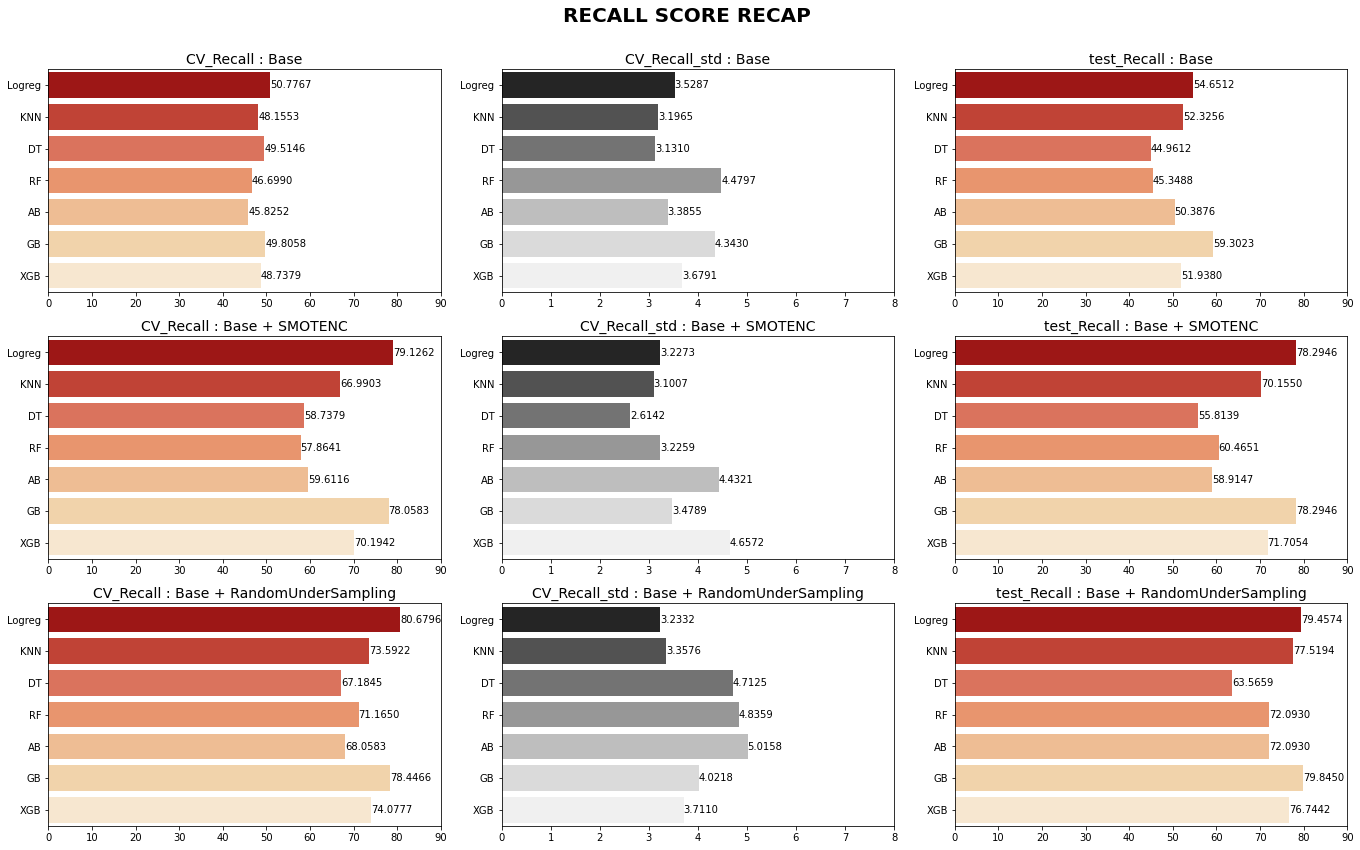

In [78]:
plt.figure(figsize = (19, 12))
plt.subplot(331)
# Kolom 1, Metric Score
ax = sns.barplot(data = metrics_score_recap_cv.loc[["base_cv.recall.mean"]], palette = "OrRd_r", orient = "h")
ax.set_title("CV_Recall : Base", size = 14)
ax.set_xlim(0, 90)
labels(ax)

plt.subplot(334)
ax = sns.barplot(data = metrics_score_recap_cv.loc[["ovrsm_cv.recall.mean"]], palette = "OrRd_r", orient = "h")
ax.set_title("CV_Recall : Base + SMOTENC", size = 14)
ax.set_xlim(0, 90)
labels(ax)

plt.subplot(337)
ax = sns.barplot(data = metrics_score_recap_cv.loc[["undrsm_cv.recall.mean"]], palette = "OrRd_r", orient = "h")
ax.set_title("CV_Recall : Base + RandomUnderSampling", size = 14)
ax.set_xlim(0, 90)
labels(ax)

# Untuk Kolom 2, Deviation
plt.subplot(332)
ax = sns.barplot(data = std_recap_cv.loc[["base_cv.recall.std"]], palette = "Greys_r", orient = "h")
ax.set_title("CV_Recall_std : Base", size = 14)
ax.set_xlim(0, 8)
labels(ax)

plt.subplot(335)
ax = sns.barplot(data = std_recap_cv.loc[["ovrsm_cv.recall.std"]], palette = "Greys_r", orient = "h")
ax.set_title("CV_Recall_std : Base + SMOTENC", size = 14)
ax.set_xlim(0, 8)
labels(ax)

plt.subplot(338)
ax = sns.barplot(data = std_recap_cv.loc[["undrsm_cv.recall.std"]], palette = "Greys_r", orient = "h")
ax.set_title("CV_Recall_std : Base + RandomUnderSampling", size = 14)
ax.set_xlim(0, 8)
labels(ax)

# Untuk Kolom 3, Hasil Test
plt.subplot(333)
ax = sns.barplot(data = metrics_score_recap_test.loc[["base_test_recall"]], palette = "OrRd_r", orient = "h")
ax.set_title("test_Recall : Base", size = 14)
ax.set_xlim(0, 90)
labels(ax)

plt.subplot(336)
ax = sns.barplot(data = metrics_score_recap_test.loc[["ovrsm_test_recall"]], palette = "OrRd_r", orient = "h")
ax.set_title("test_Recall : Base + SMOTENC", size = 14)
ax.set_xlim(0, 90)
labels(ax)

plt.subplot(339)
ax = sns.barplot(data = metrics_score_recap_test.loc[["undrsm_test_recall"]], palette = "OrRd_r", orient = "h")
ax.set_title("test_Recall : Base + RandomUnderSampling", size = 14)
ax.set_xlim(0, 90)
labels(ax)

plt.suptitle("RECALL SCORE RECAP\n", size = 20, weight = "bold", x = 0.505)
plt.tight_layout()
plt.show()

**REMARKS ON RECALL SCORE RECAP**
* Based on business understanding, the metric that will be used for that case is `recall score`, That's why I only visualize recall score only.
* There's 20% increase of `recall score` from base model when we apply resampling method.
* The best model based on choosen metrics is LogisticRegression with RandomUnderSampling method. Second best is GradientBoost.
* I'll try to hyperparameter tuning those algorithm and pick the best algorithm.

<a id="506"></a>
<font color="lightseagreen" size=+2><b>5.6. HYPERPARAMETER TUNING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<a id="50601"></a>
<font color="lightseagreen" size=+2><b>5.6.1. HYPERPARAMETER TUNING - LOGISTIC REGRESSION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

[**ABOUT LOGISTIC REGRESSION**](https://www.sciencedirect.com/topics/computer-science/logistic-regression)<br>
Logistic regression is another powerful supervised ML algorithm used for binary classification problems (when target is categorical). The best way to think about logistic regression is that it is a linear regression but for classification problems. Logistic regression essentially uses a logistic function defined below to model a binary output variable (Tolles & Meurer, 2016). The primary difference between linear regression and logistic regression is that logistic regression's range is bounded between 0 and 1. In addition, as opposed to linear regression, logistic regression does not require a linear relationship between inputs and output variables. This is due to applying a nonlinear log transformation to the odds ratio<br><br>

**REFERENCES :**
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
2. https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
3. https://stackoverflow.com/questions/58815016/cross-validating-with-imblearn-pipeline-and-gridsearchcv
4. https://www.sciencedirect.com/topics/computer-science/logistic-regression<br><br>

**NOTES :**
* Resampling method that will be used in hyperparameter tuning process is undersampling (based on previous section, undersampling gives the best result, we try to improve it further).
* Paramspace that will be used for logsiticregression are as follows : 
    * "logreg_HT__penalty" : ["l2", "l1", "elasticnet"],
    * "logreg_HT__C" : [100, 10, 1, 0.1, 0.01, 0.001],  
    * "logreg_HT__random_state" : [8888],
    * "logreg_HT__solver" : ["liblinear", "newton-cg", "sag", "saga", "lbfgs"],
    * "logreg_HT__max_iter" : [10, 100, 200],
    * "logreg_HT__l1_ratio" : [0.2, 0.4, 0.6, 0.8],<br><br>

**HYPERPARAMETER TUNING PROCESS - LOGISTIC REGRESSION OVERSAMPLING (SMOTENC)**

Define the grid search cv - logisticregression

In [79]:
# define the algorithm
model_logreg = LogisticRegression(random_state = 8888)

# define resampling method
# rus = RandomUnderSampler(random_state = 8888)
smote_nc = SMOTENC(categorical_features = cat_col_index, random_state = 8888)

# transformer & cv method used what we've defined in previous section

# make logisticregression pipeline 
logregpipe = Pipeline([
    ("oversampling", smote_nc),
    ("preprocessing",transformer),
    ("logreg", model_logreg)
    ])

# paramspace for logistic regression
logreg_param_space = {
    "logreg__penalty" : ["l2", "l1", "elasticnet"],
    "logreg__C" : [1, 0.1, 0.05, 0.01, 0.005, 0.001],  
    "logreg__random_state" : [8888],
    "logreg__solver" : ["liblinear", "newton-cg", "sag", "saga", "lbfgs"],
    "logreg__max_iter" : [10, 50, 100, 150, 200],
    "logreg__l1_ratio" : [0.1, 0.15, 0.2, 0.25, 0.3],
}

# grid search cv for logistic regression
logreg_grid_Search = GridSearchCV(
                       logregpipe, 
                       param_grid = logreg_param_space,
                       cv = skfold,
                       scoring = "recall",
                       n_jobs = -1)

# Check the variables
logreg_grid_Search

<IPython.core.display.Javascript object>

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('oversampling',
                                        SMOTENC(categorical_features=[0, 1, 2,
                                                                      3, 4, 5,
                                                                      6],
                                                random_state=8888)),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                             

<br><br>
Train our grid search cv - logisticregression

In [80]:
logreg_grid_Search.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('oversampling',
                                        SMOTENC(categorical_features=[0, 1, 2,
                                                                      3, 4, 5,
                                                                      6],
                                                random_state=8888)),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                             

<br><br>Let's check out best score & best param for our model - logisticregression

In [81]:
# mendapatkan best parameter & best score dari GridSearch CV LogisticRegression
print("Best parameter : ", logreg_grid_Search.best_params_, "\n")
print("best score : ", logreg_grid_Search.best_score_)

Best parameter :  {'logreg__C': 0.01, 'logreg__l1_ratio': 0.1, 'logreg__max_iter': 10, 'logreg__penalty': 'l1', 'logreg__random_state': 8888, 'logreg__solver': 'saga'} 

best score :  0.8233009708737864


<br><br>Best parameter for Logistic Regression but in dataframe

In [82]:
logreg_best_param_0_8_train = pd.DataFrame(logreg_grid_Search.best_params_, index = [0]).T
logreg_best_param_0_8_train.rename(columns = {0 : "parameter_value"}, inplace = True)
display_side_by_side(logreg_best_param_0_8_train, titles = ["Logreg_Bestparameter - HT - all features"])

,parameter_value
logreg__C,0.01
logreg__l1_ratio,0.1
logreg__max_iter,10
logreg__penalty,l1
logreg__random_state,8888
logreg__solver,saga


<br><br> I want to see the difference between before and after hyperparameter tuning to see if there's an improvement

In [83]:
# model before hyperparameter tuning
logregpipe

# saving best parameter logistic regression in variables
logreg_best_model = logreg_grid_Search.best_estimator_

# see available class from our model
logreg_best_model.classes_

array([0, 1], dtype=int64)

In [84]:
# train default model
logregpipe.fit(X_train, Y_train)

# train tuned model
logreg_best_model.fit(X_train, Y_train)

# get the prediction from default model
Y_pred_class_logreg_default = logregpipe.predict(X_test)
Y_pred_proba_logreg_default = logregpipe.predict_proba(X_test)

# get the prediction from tuned model
Y_pred_class_logreg_tuned = logreg_best_model.predict(X_test)
Y_pred_proba_logreg_tuned = logreg_best_model.predict_proba(X_test)

# print recall score result from both model (default & tuned)
print("recall_score LogReg default : ", recall_score(Y_test, Y_pred_class_logreg_default))
print("recall score LogReg tuned : ",recall_score(Y_test, Y_pred_class_logreg_tuned), "\n")

# get AveragePrecision score from both model (default & tuned)
ap_score_logreg_default = average_precision_score(Y_test, Y_pred_proba_logreg_default[:,1])
ap_score_logreg_tuned = average_precision_score(Y_test, Y_pred_proba_logreg_tuned[:,1])

# print average precision score result from both model (default & tuned)
print("Average Precision LogReg default : ",ap_score_logreg_default)
print("Average Precision LogReg tuned : ",ap_score_logreg_tuned)

recall_score LogReg default :  0.7829457364341085
recall score LogReg tuned :  0.813953488372093 

Average Precision LogReg default :  0.6514887329062968
Average Precision LogReg tuned :  0.6393769386321753


**REMARKS ON LOGISTICREGRESSION HYPERPARAMETER TUNING**
* There's slight improvement after Logistic Regression is tuned

<br><br> **PRECISION RECALL - LOGISTIC REGRESSION**
* This data will be used when we make precision recall threshold graph in the next section

In [85]:
# get precision, recall, threshold from precision recall curve
logreg_precision, logreg_recall, logreg_treshold = precision_recall_curve(Y_test, Y_pred_proba_logreg_tuned[:,1])

In [86]:
# need to delete last element to make dataframe consist of precision, recall, threshold
# There's 316 threshold data, but precision and recall have 317 data each.
logreg_precision_e = np.delete(logreg_precision, -1)
logreg_recall_e = np.delete(logreg_recall, -1) 

# create dataframe consist of recall, precision, threshold for logistic regression tuned model
df_PR_logreg = pd.DataFrame({
                        "recall" : logreg_recall_e,
                        "precision" : logreg_precision_e,
                        "treshold" : logreg_treshold})

# calculate f1 score manually
df_PR_logreg["f1_score"] = ((2 * df_PR_logreg["precision"] * df_PR_logreg["recall"]) / (df_PR_logreg["precision"] + df_PR_logreg["recall"]))

# mengeluarkan output dataframe dengan judul
display_side_by_side(df_PR_logreg, titles = ["LogReg.Clf Tuned | Recall - Precision - Threshold - f1-score"])

,recall,precision,treshold,f1_score
0,1.000000,0.279523,0.091367,0.436918
1,0.996124,0.278742,0.092283,0.435593
2,0.996124,0.279348,0.094879,0.436333
3,0.996124,0.279652,0.095062,0.436703
4,0.992248,0.278867,0.096011,0.435374
5,0.992248,0.279476,0.098000,0.436116
6,0.992248,0.281319,0.098702,0.438356
7,0.992248,0.281628,0.098891,0.438732
8,0.992248,0.282249,0.099950,0.439485
9,0.992248,0.283814,0.100780,0.441379


<br><br> **RECEIVER OPERATING CHARACTERISTIC (ROC) AUC - LOGISTIC REGRESSION**
* This data will be used when we make ROC AUC curve in next section

In [87]:
# mendapatkan data fpr, tpr dan treshold model Gradient Boost tuned
logreg_fpr, logreg_tpr, logreg_roc_thres = roc_curve(Y_test, Y_pred_proba_logreg_tuned[:,1])

# mendapatkan ROC AUC Score
logreg_roc_auc_score = roc_auc_score(Y_test, Y_pred_proba_logreg_tuned[:,1])
print("GradientBoostinClassifier ROC AUC Score = ",logreg_roc_auc_score)

GradientBoostinClassifier ROC AUC Score =  0.8294791089076616


<a id="50602"></a>
<font color="lightseagreen" size=+2><b>5.6.2. HYPERPARAMETER TUNING - GRADIENTBOOSTCLASSIFIER</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

[**ABOUT GRADIENT BOOSTING**](https://rcarneva.github.io/understanding-gradient-boosting-part-1.html)<br>
At a high level, the way GBMs work is by starting with a rough prediction and then building a series of decision trees, with each tree in the series trying to correct the prediction error of the tree before it. There's more detailed descriptions of the mechanics behind the algorithm out there, but this series of posts is intended to give more of an intuitive understanding of what the algorithm does.<br><br>

***REFERENCES*** : 
1. https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
2. https://www.machinelearningplus.com/machine-learning/an-introduction-to-gradient-boosting-decision-trees/#:~:text=Using%20a%20low%20learning%20rate,0.3%20gives%20the%20best%20results.
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
4. https://stackoverflow.com/questions/67532613/how-to-define-min-sample-split-and-min-sample-leaf-in-decision-tree-regresso
5. https://rcarneva.github.io/understanding-gradient-boosting-part-1.html<br><br>

***NOTES*** :
* Resampling method that will be used in hyperparameter tuning process is undersampling (based on previous section, undersampling gives the best result, we try to improve it further).
* Paramspace that will be used for gradientboost are as follows : 
    * "gb__learning_rate" : [0.01, 0.05, 0.1, 0.2],
    * "gb__n_estimators" : [100, 200, 300, 400],  
    * "gb__subsample" : [0.8, 0.9, 1],
    * "gb__random_state" : [8888],
    * "gb__max_depth" : [3, 4, 5],
    * "gb__max_features" : [2, 3, 4]<br><br>

**HYPERPARAMETER TUNING PROCESS - GRADIENTBOOST OVERSAMPLING**

Define the grid search cv - gradientboost

In [88]:
# define gradient boost model
model_gb = GradientBoostingClassifier(random_state = 8888)

# transformer & cv method used what we've defined in previous section

# make gradientboost pipeline 
gb_pipe = Pipeline([
    ("oversampling", smote_nc),
    ("preprocessing",transformer),
    ("gb", model_gb)
    ])

# create paramspace for gradientboost
gb_param_space = {
    "gb__learning_rate" : [0.01, 0.05, 0.1, 0.2],
    "gb__n_estimators" : [100, 150, 200, 300, 400],  
    "gb__subsample" : [0.8, 0.9, 1],
    "gb__random_state" : [8888],
    "gb__max_depth" : [3, 4, 5],
    "gb__max_features" : [2, 3, 4]
}

# make grid search cv
gb_grid_Search = GridSearchCV(
                       gb_pipe, 
                       param_grid = gb_param_space,
                       cv = skfold,
                       scoring = "recall",
                       n_jobs = -1)

# check gridsearch cv variables
gb_grid_Search

<IPython.core.display.Javascript object>

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('oversampling',
                                        SMOTENC(categorical_features=[0, 1, 2,
                                                                      3, 4, 5,
                                                                      6],
                                                random_state=8888)),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                             

<br><br>
Train our grid search cv - gradientboost

In [89]:
# train gridsearch cv
gb_grid_Search.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('oversampling',
                                        SMOTENC(categorical_features=[0, 1, 2,
                                                                      3, 4, 5,
                                                                      6],
                                                random_state=8888)),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                             

<br><br>Let's check out best score & best param for our model - gradientboost

In [90]:
print("Best parameter : ",gb_grid_Search.best_params_, "\n")
print("best score : ", gb_grid_Search.best_score_)

Best parameter :  {'gb__learning_rate': 0.01, 'gb__max_depth': 4, 'gb__max_features': 3, 'gb__n_estimators': 100, 'gb__random_state': 8888, 'gb__subsample': 0.9} 

best score :  0.8233009708737864


<br><br>Best parameter for GradientBoost but in dataframe

In [91]:
# best parameter untuk grid search cv GB hyperparameter tuning dalam sebuah dataframe
gb_best_param_0_8_train = pd.DataFrame(gb_grid_Search.best_params_, index = [0]).T
gb_best_param_0_8_train.rename(columns = {0 : "parameter_value"}, inplace = True)
display_side_by_side(gb_best_param_0_8_train, titles = ["GB_Bestparameter - HT - all features"])

,parameter_value
gb__learning_rate,0.01
gb__max_depth,4.00
gb__max_features,3.00
gb__n_estimators,100.00
gb__random_state,8888.00
gb__subsample,0.90


<br><br>Plotting one of gradientboost tree (just for exploration)

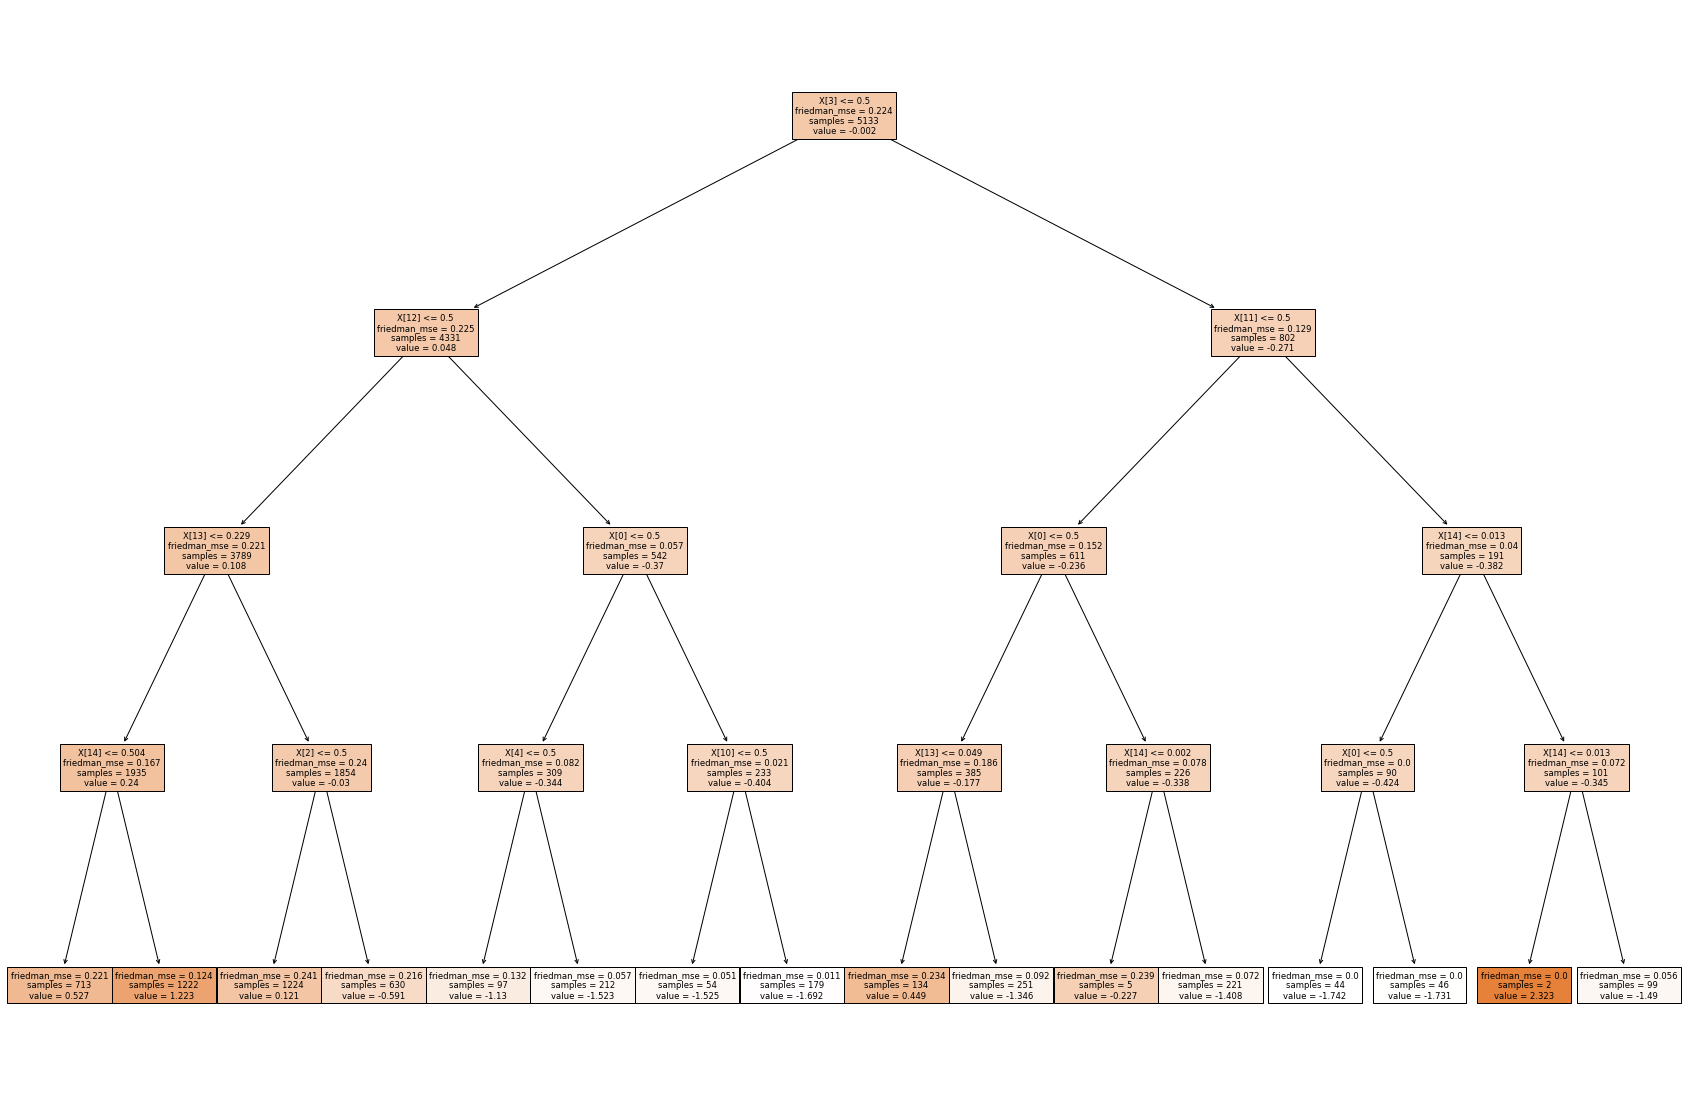

In [92]:
# get one instance of estimator
estimator_instance = gb_grid_Search.best_estimator_[2].estimators_[20][0]

# plot the lucky estimator
plt.figure(figsize = (30,20))
plot_tree(estimator_instance, filled = True, class_names = ["A", "B"])
plt.show()

<br><br> I want to see the difference between before and after hyperparameter tuning to see if there's an improvement

In [93]:
# GB before hyperparameter tuning
gb_pipe

# GB after hyperparameter tuning
gb_best_model = gb_grid_Search.best_estimator_

# see the available class in GB
gb_best_model.classes_

array([0, 1], dtype=int64)

In [94]:
# train default model
gb_pipe.fit(X_train, Y_train)

# train tuned model
gb_best_model.fit(X_train, Y_train)

# get prediciton result from default model (class & proba)
Y_pred_class_gb_default = gb_pipe.predict(X_test)
Y_pred_proba_gb_default = gb_pipe.predict_proba(X_test)

# get prediciton result from tuned model (class & proba)
Y_pred_class_gb_tuned = gb_best_model.predict(X_test)
Y_pred_proba_gb_tuned = gb_best_model.predict_proba(X_test)

# print out recall score tuned & default model
print("recall_score GB default : ", recall_score(Y_test, Y_pred_class_gb_default))
print("recall score GB tuned : ",recall_score(Y_test, Y_pred_class_gb_tuned), "\n")

# calculate Average precision score
ap_score_gb_default = average_precision_score(Y_test, Y_pred_proba_gb_default[:,1])
ap_score_gb_tuned = average_precision_score(Y_test, Y_pred_proba_gb_tuned[:,1])

# print out AP score
print("Average Precision GB default : ", ap_score_gb_default)
print("Average Precision GB tuned : ", ap_score_gb_tuned)

recall_score GB default :  0.7829457364341085
recall score GB tuned :  0.8294573643410853 

Average Precision GB default :  0.6547171245059997
Average Precision GB tuned :  0.6412152056200839


**REMARKS ON GRADIENTBOOST HYPERPARAMETER TUNING**
* There's slight improvement after GradientBoost is tuned

<br><br> **PRECISION RECALL - GRADIENTBOOST**
* This data will be used when we make precision recall threshold graph in the next section

In [95]:
# get preciison, recall, threshold data from precision recall curve
gb_precision, gb_recall, gb_treshold = precision_recall_curve(Y_test, Y_pred_proba_gb_tuned[:,1])

In [96]:
gb_precision_e = np.delete(gb_precision, -1)
gb_recall_e = np.delete(gb_recall, -1) 

# crate dataframe consist of recall preciison & threshold
df_PR_gb = pd.DataFrame({
                        "recall" : gb_recall_e,
                        "precision" : gb_precision_e,
                        "treshold" : gb_treshold})

# calculate manually f1 score
df_PR_gb["f1_score"] = ((2 * df_PR_gb["precision"] * df_PR_gb["recall"]) / (df_PR_gb["precision"] + df_PR_gb["recall"]))

# print out dataframe with title
display_side_by_side(df_PR_gb.sample(10), titles = ["GB.Clf Tuned | Recall - Precision - Threshold - f1-score"])

,recall,precision,treshold,f1_score
147,0.976744,0.341463,0.276178,0.506024
549,0.666667,0.607774,0.594044,0.635860
103,0.984496,0.324808,0.249993,0.488462
650,0.325581,0.743363,0.677379,0.452830
688,0.131783,0.809524,0.703789,0.226667
598,0.515504,0.630332,0.627933,0.567164
344,0.891473,0.441459,0.428929,0.590501
220,0.945736,0.371385,0.331559,0.533333
390,0.856589,0.476293,0.466119,0.612188
551,0.658915,0.609319,0.594762,0.633147


<br><br> **RECEIVER OPERATING CHARACTERISTIC (ROC) AUC - GRADIENTBOOST**
* This data will be used when we make ROC AUC curve in next section

In [97]:
# mendapatkan data fpr, tpr dan treshold model Gradient Boost tuned
gb_fpr, gb_tpr, gb_roc_thres = roc_curve(Y_test, Y_pred_proba_gb_tuned[:,1])

# mendapatkan ROC AUC Score
gb_roc_auc_score = roc_auc_score(Y_test, Y_pred_proba_gb_tuned[:,1])
print("GradientBoostinClassifier ROC AUC Score = ",gb_roc_auc_score)

GradientBoostinClassifier ROC AUC Score =  0.8365379388325342


<a id="50603"></a>
<font color="lightseagreen" size=+2><b>5.6.3. HYPERPARAMETER TUNING OUTPUT RECAP</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<a id="precisionrecallthreshold"></a>
## PRECISION RECALL THRESHOLD

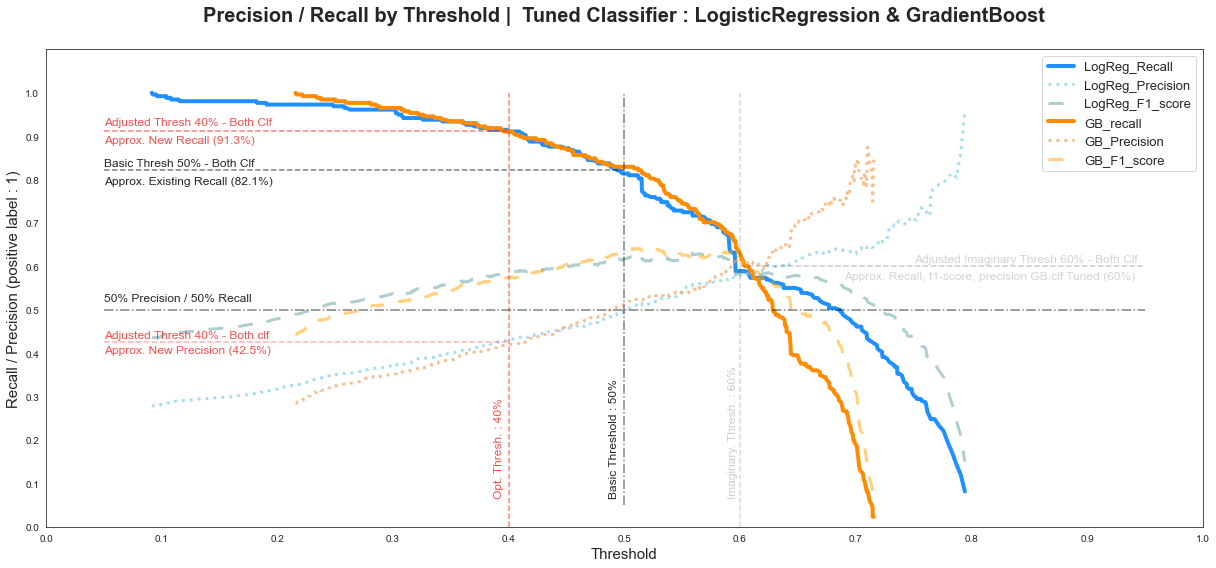

In [98]:
# Plot Precision Recall dengan Tresholdnya.
plt.figure(figsize = (17,8))
sns.set_style("white")
# Logistic Regression : Recall Precision F1 Score
sns.lineplot(data = df_PR_logreg, x = "treshold", y = "recall", label = "LogReg_Recall", linewidth = 4, color = "dodgerblue", linestyle = "solid")
sns.lineplot(data = df_PR_logreg, x = "treshold", y = "precision", label = "LogReg_Precision", linewidth = 3, color = "skyblue", linestyle = "dotted", alpha = 0.7)
sns.lineplot(data = df_PR_logreg, x = "treshold", y = "f1_score", label = "LogReg_F1_score", linewidth = 3, color = "cadetblue", linestyle = (0, (5, 5)), alpha = 0.5)

# Gradient Boost : Recall Precision F1 Score
sns.lineplot(data = df_PR_gb, x = "treshold", y = "recall", label = "GB_recall", linewidth = 4, color = "darkorange", linestyle = "solid")
sns.lineplot(data = df_PR_gb, x = "treshold", y = "precision", label = "GB_Precision", linewidth = 3, color = "sandybrown", linestyle = "dotted", alpha = 0.7)
sns.lineplot(data = df_PR_gb, x = "treshold", y = "f1_score", label = "GB_F1_score", linewidth = 3, color = "orange", linestyle = (0, (5, 5)), alpha = 0.5)

# OtherAttributes
plt.title("Precision / Recall by Threshold |  Tuned Classifier : LogisticRegression & GradientBoost\n", size = 20, weight = "bold")
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.xticks(ticks = (np.arange(0, 11)/10))
plt.yticks(ticks = (np.arange(0, 11)/10))
plt.xlabel("Threshold", size = 15)
plt.ylabel("Recall / Precision (positive label : 1)", size = 15)
plt.legend()

# Line Sumbu X
# adjusted recall clf.GB 89.5%
plt.plot([0.05, 0.4], [0.913, 0.913], "k--", alpha = 0.5, color = "r")
# existing Recall 82.1%
plt.plot([0.05, 0.5], [0.821, 0.821], "k--", alpha = 0.5)
# horizontal line 50% recall / 50% precision
plt.plot([0.05, 0.95], [0.5, 0.5], "k-.", alpha = 0.5)
# line for adjustted precision for both classifier 42.5%
plt.plot([0.05, 0.4], [0.425, 0.425], "k--", alpha = 0.3, color = "r")
# imaginary Thresh 60%
plt.plot([0.6, 0.95], [0.60, 0.60], "k--", alpha = 0.2, color = "k")

# Line Sumbu Y
# vertical line 50% thresh
plt.plot([0.5, 0.5], [0.05, 1], "k-.", alpha = 0.5)
# line for optimized thresh 40%
plt.plot([0.4, 0.4], [0, 1], "k--", alpha = 0.5, color = "r")
# line imaginary Thresh 60%
plt.plot([0.6, 0.6], [0, 1], "k--", alpha = 0.15, color = "k")

# text sumbu X
plt.annotate("Adjusted Thresh 40% - Both Clf", xy = (0.5, 0.5), xytext = (0.05, 0.925), size = 12, color = "red", alpha = 0.7)
plt.annotate("Approx. New Recall (91.3%)", xy = (0.5, 0.5), xytext = (0.05, 0.885), size = 12, color = "red", alpha = 0.7)
plt.annotate("Basic Thresh 50% - Both Clf", xy = (0.5, 0.5), xytext = (0.05, 0.832), size = 12)
plt.annotate("Approx. Existing Recall (82.1%)", xy = (0.5, 0.5), xytext = (0.05, 0.79), size = 12)
plt.annotate("50% Precision / 50% Recall", xy = (0.5, 0.5), xytext = (0.05, 0.52), size = 12)
plt.annotate("Adjusted Thresh 40% - Both clf", xy = (0.5, 0.5), xytext = (0.05, 0.435), size = 12, color = "red", alpha = 0.7)
plt.annotate("Approx. New Precision (42.5%)", xy = (0.5, 0.5), xytext = (0.05, 0.40), size = 12, color = "red", alpha = 0.7)
# imaginary thresh 60% GB Model
plt.annotate("Adjusted Imaginary Thresh 60% - Both Clf", xy = (0.5, 0.5), xytext = (0.75, 0.610), size = 12, alpha = 0.2)
plt.annotate("Approx. Recall, f1-score, precision GB.clf Tuned (60%)", xy = (0.5, 0.5), xytext = (0.69, 0.57), size = 12, alpha = 0.2)


# text sumbu Y
plt.annotate("Basic Threshold : 50%", xy = (0.5, 0.5), xytext = (0.487, 0.07), size = 12, rotation = 90)
plt.annotate("Opt. Thresh. : 40%", xy = (0.5, 0.5), xytext = (0.387, 0.07), size = 12, rotation = 90, color = "red", alpha = 0.7)
# imaginary thresh Y
plt.annotate("Imaginary. Thresh. : 60%", xy = (0.5, 0.5), xytext = (0.59, 0.07), size = 12, rotation = 90, color = "black", alpha = 0.2)

plt.tight_layout()
plt.legend(loc = "upper right", prop = {"size" : 13})
plt.show()

**REMARKS ON PRECISION RECALL THRESHOLD**
* This graph is a showing recall, precision, f1 by threshold for Tuned Logistic Regression & Tuned GradientBoost
* Basic threshold at 50%
* We can see that there's precision recall trade - off :
    * with lower threshold (<50%) : incrased recall, decrased precision
    * with higher threshold (>50%) : decreased recall, increased precision
* But we can see `recall` only because that's what we need for our business problem.
* Based on the graph, I try to use new thresh 40% because it gives recall a boost with a little decreased precision. (see the red mark line)

## RECEIVER OPERATING CHARACTERISTIC (ROC) AUC

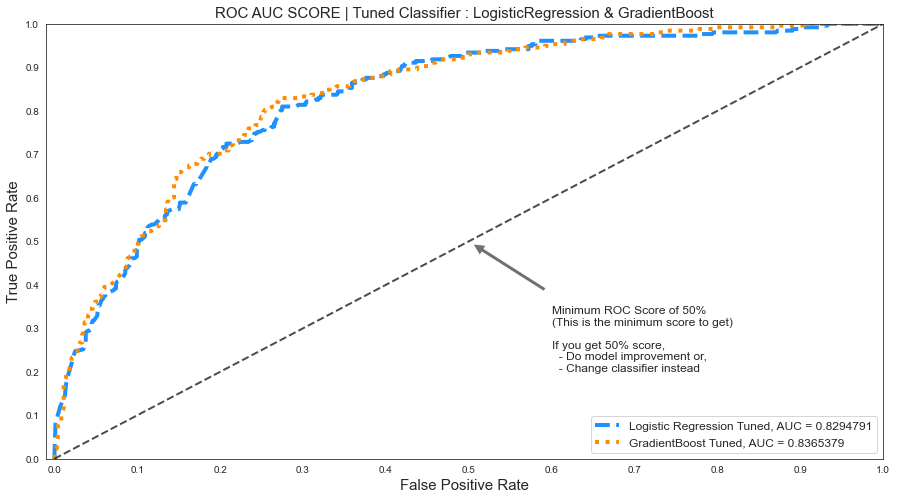

In [99]:
plt.figure(figsize = (15,8))
plt.plot(logreg_fpr, logreg_tpr,
         label = f"Logistic Regression Tuned, AUC = {logreg_roc_auc_score.round(7)}", 
         linewidth = 4, 
         linestyle = "dashed", 
         color = "dodgerblue")

plt.plot(gb_fpr, gb_tpr,
         label = f"GradientBoost Tuned, AUC = {gb_roc_auc_score.round(7)}", 
         linewidth = 4, 
         linestyle = "dotted", 
         color = "darkorange")

plt.xticks(ticks = (np.arange(0, 11)/10))
plt.yticks(ticks = (np.arange(0, 11)/10))
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2, linestyle = "dashed", alpha = 0.7)
plt.axis([-0.01, 1, 0, 1])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.annotate('''
Minimum ROC Score of 50% 
(This is the minimum score to get) 

If you get 50% score, 
  - Do model improvement or, 
  - Change classifier instead''',
             xy = (0.5, 0.5), xytext = (0.6, 0.2), size = 12, 
             arrowprops = dict(facecolor = "#6E726D", shrink = 0.05),)

plt.title("ROC AUC SCORE | Tuned Classifier : LogisticRegression & GradientBoost", size = 15)
plt.xlabel("False Positive Rate", size = 15)
plt.ylabel("True Positive Rate", size = 15)
plt.legend(loc = "lower right", prop = {"size" : 12 })
plt.show()

***REMARKS ON ROC AUC GRAPH***
* This graph showing ROC AUC curve for Tuned Logistic Regression & Tuned GradientBoost
* From the AUC score we can see that both classifier works well on our data with AUC score from both tuned model > 0.8
* High AUC score can indicate that :
    * our model can differentiate between positive class & negative class
    * Better at predicting positive classes as positive, better at predicting negative classes as negative.
* If you have AUC score of 50% (flat diagonal like given graph), 
    * you might want to change your classifier or change certain process in the modeling because model can't differentiate between positive class & negative class.
    * it's 50:50 chance on how model can predict whether positive class as positive / negative class as negative

## CONFUSSION MATRIX

Reference : 
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

### CONFUSSION MATRIX THRESH 50%

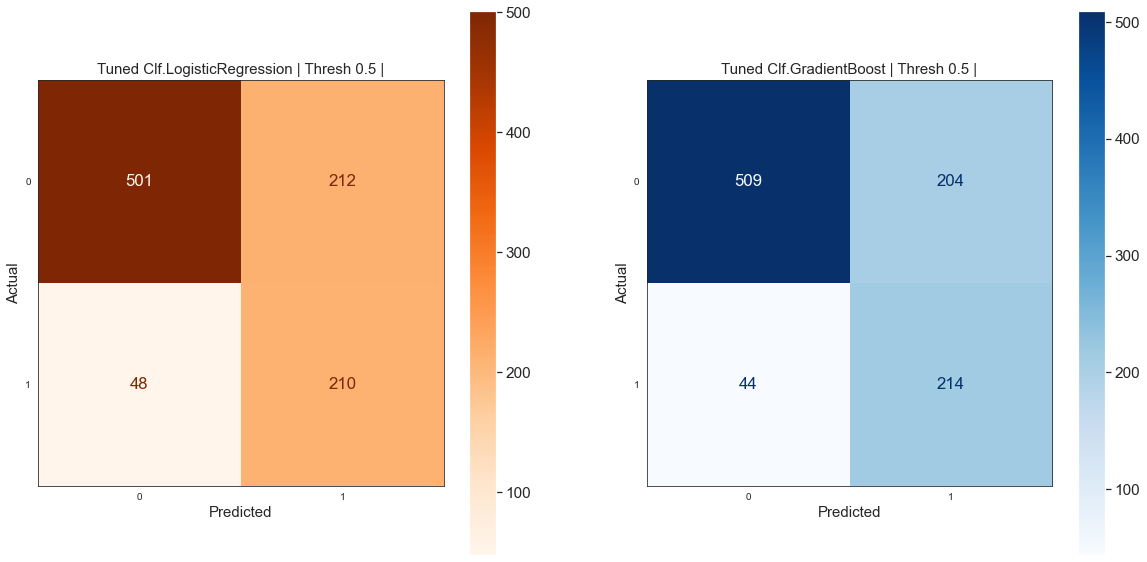

,precision,recall,f1-score,,support
0,0.912568,0.702665,0.793978,,713
1,0.49763,0.813953,0.617647,,258
,,,,,
accuracy,,,0.732235,,971
macro avg,0.705099,0.758309,0.705812,,971
weighted avg,0.802317,0.732235,0.747126,,971
,precision,recall,f1-score,,support
0,0.920434,0.713885,0.804107,,713
1,0.511962,0.829457,0.633136,,258
,,,,,




Default format Class Report To Validate Custom Report Above


LR Tuned : Logistic Regression Classifier with Best Parameter
----------------------------------------------------------------
LR TUNED | THRESH 0.5 | Classification Report
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       713
           1       0.50      0.81      0.62       258

    accuracy                           0.73       971
   macro avg       0.71      0.76      0.71       971
weighted avg       0.80      0.73      0.75       971
 


GB Tuned : GradientBoost Classifier with Best Parameter
----------------------------------------------------------------
GB TUNED | THRESH 0.5 | Classification Report
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       713
           1       0.51    

In [100]:
# Confussion Matrix Plot untuk Thresh 0.5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
# fontscale
sns.set(font_scale = 1.4)

# ax1, ax2
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_class_logreg_tuned, cmap = "Oranges", ax = ax1)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_class_gb_tuned, cmap = "Blues", ax = ax2)

# Complimentary & plt.show()
ax1.set_title("Tuned Clf.LogisticRegression | Thresh 0.5 |", size = 15)
ax2.set_title("Tuned Clf.GradientBoost | Thresh 0.5 |", size = 15)
ax1.set_xlabel("Predicted", size = 15)
ax2.set_xlabel("Predicted", size = 15)
ax1.set_ylabel("Actual", size = 15)
ax2.set_ylabel("Actual", size = 15)

# remove the grid
ax1.grid(visible = False)
ax2.grid(visible = False)
plt.show()

# mengeluarkan output classification report side by side 
display_side_by_side(get_classification_report(Y_test, Y_pred_class_logreg_tuned),
                     get_classification_report(Y_test, Y_pred_class_gb_tuned),
                     titles = ["LR TUNED | THRESH 0.5 | Classification Report", "GB TUNED | THRESH 0.5 | Classification Report"])

# default Classification Report
print("\n\nDefault format Class Report To Validate Custom Report Above\n\n")
print("LR Tuned : Logistic Regression Classifier with Best Parameter")
print("--"*32)
print("LR TUNED | THRESH 0.5 | Classification Report")
print("--"*32)
print(classification_report(Y_test, Y_pred_class_logreg_tuned), "\n\n")

print("GB Tuned : GradientBoost Classifier with Best Parameter")
print("--"*32)
print("GB TUNED | THRESH 0.5 | Classification Report")
print("--"*32)
print(classification_report(Y_test, Y_pred_class_gb_tuned))

### CONFUSSION MATRIX THRESH 40%

If we're gonna use new thresh, first we need to convert probabilty into class with new probability thresh : 40%

In [101]:
# convert proba into class with new thresh 40%
Y_pred_class_logreg_tuned_thresh_0_4 = np.where(Y_pred_proba_logreg_tuned[:,1] > 0.4,1,0)
Y_pred_class_gb_tuned_thresh_0_4 = np.where(Y_pred_proba_gb_tuned[:,1] > 0.4,1,0)

Let's see our confussion matrix with new thresh

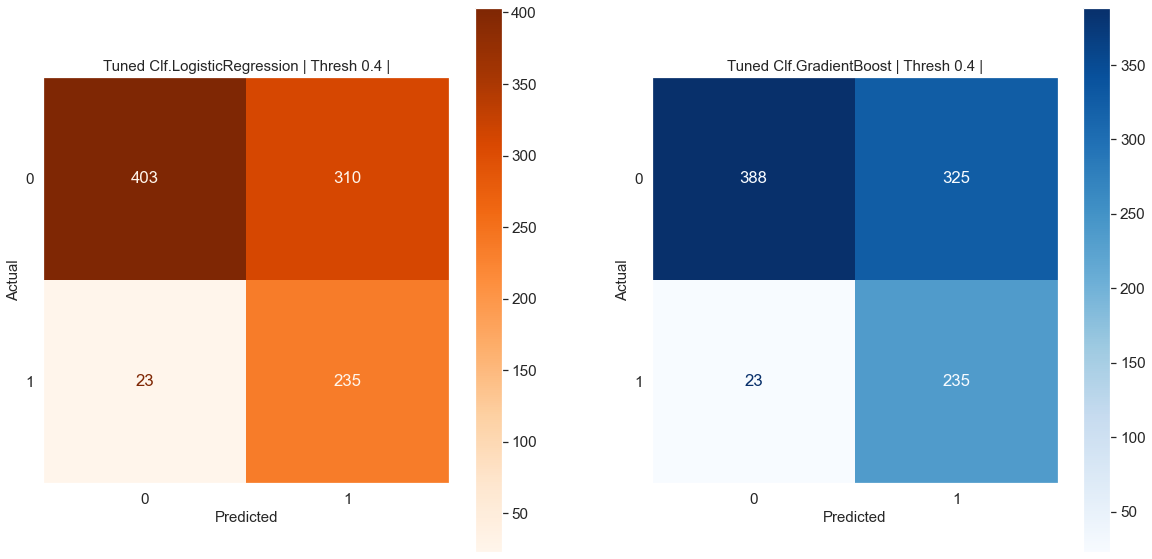

,precision,recall,f1-score,,support
0,0.946009,0.565217,0.707638,,713
1,0.431193,0.910853,0.585305,,258
,,,,,
accuracy,,,0.657055,,971
macro avg,0.688601,0.738035,0.646472,,971
weighted avg,0.80922,0.657055,0.675134,,971
,precision,recall,f1-score,,support
0,0.944039,0.54418,0.690391,,713
1,0.419643,0.910853,0.574572,,258
,,,,,




Default format Classification Report To Validate Custom Report Above

LR Tuned : Logistic Regression Classifier with Best Parameter
----------------------------------------------------------------
LR TUNED | THRESH 0.4 | Classification Report
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.57      0.71       713
           1       0.43      0.91      0.59       258

    accuracy                           0.66       971
   macro avg       0.69      0.74      0.65       971
weighted avg       0.81      0.66      0.68       971
 


GB Tuned : GradientBoost Classifier with Best Parameter
----------------------------------------------------------------
GB TUNED | THRESH 0.4 | Classification Report
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.54      0.69       713
           1       

In [102]:
# Confussion Matrix Plot untuk Thresh 0.4
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
# set bigger font scale
sns.set(font_scale = 1.4)

# ax1 & ax2
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_class_logreg_tuned_thresh_0_4, cmap = "Oranges", ax = ax1)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_class_gb_tuned_thresh_0_4, cmap = "Blues", ax = ax2)

# Complimentary & plt.show()
ax1.set_title("Tuned Clf.LogisticRegression | Thresh 0.4 |", size = 15)
ax2.set_title("Tuned Clf.GradientBoost | Thresh 0.4 |", size = 15)
ax1.set_xlabel("Predicted", size = 15)
ax2.set_xlabel("Predicted", size = 15)
ax1.grid(visible = False)
ax2.grid(visible = False)
ax1.set_ylabel("Actual", size = 15)
ax2.set_ylabel("Actual", size = 15)
plt.show()

# mengeluarkan output classification report side by side 
display_side_by_side(get_classification_report(Y_test, Y_pred_class_logreg_tuned_thresh_0_4),
                     get_classification_report(Y_test, Y_pred_class_gb_tuned_thresh_0_4),
                     titles = ["LR TUNED | THRESH 0.4 | Classification Report", "GB TUNED | THRESH 0.4 | Classification Report"])

# default Classification Report
print("\n\nDefault format Classification Report To Validate Custom Report Above\n")
print("LR Tuned : Logistic Regression Classifier with Best Parameter")
print("--"*32)
print("LR TUNED | THRESH 0.4 | Classification Report")
print("--"*32)
print(classification_report(Y_test, Y_pred_class_logreg_tuned_thresh_0_4), "\n\n")


print("GB Tuned : GradientBoost Classifier with Best Parameter")
print("--"*32)
print("GB TUNED | THRESH 0.4 | Classification Report")
print("--"*32)
print(classification_report(Y_test, Y_pred_class_gb_tuned_thresh_0_4))

**REMARKS ON CONFUSSION MATRIX**
* You can see our model performance based on metrics or by confussion matrix.
* We can see the difference between model with 50% thresh and model with 40% thresh
* Previously explained in `precision recall threshold` that by using lower thresh (<50%), we improve recall and decrease precision, this also reflected in the metrics score and the confussion matrix.
* Based on metrics & confussion metrics, Logistic Regression & Gradient Boost give the same `recall score` of 91.0853%. Because of that, I need to compare the model using other metrics.
* Other metrics that I'll use is ROC AUC. Based on ROC AUC, Gradient Boost is slightly better than Logistic Regression (0.836 compare to 0.829) which indicating Gradient Boost slightly better at predicting negative class as negative and positive class as positive.

**NOTES**
* You can use precision as well with the argument that we'll focus on churn customer only. Based on that argument, Logistic Regression gives the better result compared to GradientBoost (0.431 to 0.419)

### OVERALL HYPERPARAMETER TUNING CONCLUSION
* Metric that will used based on the case is `recall`
* Model that I'll use for the next step is GradientBoost
* Remember that we'll use new threshold : 40%. By using new threshold, there's an improvement on recall (decrease also in precision, but since we're using recall I think it's fine)


<a id="507"></a>
<font color="lightseagreen" size=+2><b>5.7. FEATURE IMPORTANCE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

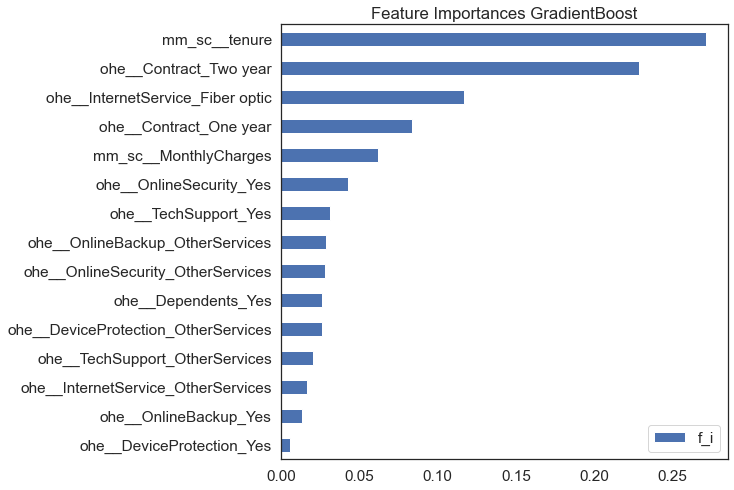

In [103]:
# get feature names
feature_names = gb_best_model[1].get_feature_names_out()

# feature importances
f_i_data = gb_best_model[2].feature_importances_

# make it in form of dataframe
df__f_i = pd.DataFrame(data = f_i_data, index = feature_names, columns = ["f_i"]).sort_values(by = ["f_i"], ascending = True)

# let's plot the result
sns.set_style("white")
df__f_i.plot(kind = "barh", figsize = (8,8), title = "Feature Importances GradientBoost")
plt.show()

**REMARKS ON FETURE IMPORTANCE**
* From the graph above, the most important features are as follows : 
    * Tenure
    * Contract
    * InternetService
* Based on our [**correlation heatmap**](#correlationheatmap), * ohe__internet_service_fiber optic highly correlated with mm_sc__MonthlyCharge (correlation value : 0.8, indicating strong correlation).
* Point above indicating that mm_sc__MonthlyCharge information is already contained in InternetService features (if we're including MonthlyCharge it will be a redundant features)
* In the next section, I want to compare model 1 (with all current features) and model 2 (with selected features)

<a id="50701"></a>
<font color="lightseagreen" size=+2><b>5.7.1. BEST MODEL WITH CURRENT FEATURE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

We'll show all features available on our data

In [104]:
display_side_by_side(X.head(5), pd.DataFrame(Y, columns = ["Churn"]).head(5), titles = ["X for features", "Y for target"])

X for features 
 
 
 
 Dependents 
 OnlineSecurity 
 OnlineBackup 
 InternetService 
 DeviceProtection 
 TechSupport 
 Contract 
 tenure 
 MonthlyCharges 
 
 
 
 
 0 
 Yes 
 No 
 No 
 DSL 
 Yes 
 Yes 
 Month-to-month 
 9 
 72.90 
 
 
 1 
 No 
 No 
 Yes 
 Fiber optic 
 Yes 
 No 
 Month-to-month 
 14 
 82.65 
 
 
 2 
 No 
 Yes 
 No 
 DSL 
 Yes 
 Yes 
 Two year 
 64 
 47.85 
 
 
 3 
 No 
 Yes 
 Yes 
 DSL 
 Yes 
 Yes 
 Two year 
 72 
 69.65 
 
 
 4 
 No 
 OtherServices 
 OtherServices 
 OtherServices 
 OtherServices 
 OtherServices 
 Month-to-month 
 3 
 23.60 
 
 
 Y for target 
 
 
 
 Churn 
 
 
 
 
 0 
 1 
 
 
 1 
 0 
 
 
 2 
 1 
 
 
 3 
 0 
 
 
 4 
 0

<br><br>Showing train test split result

In [105]:
# menampilkan hasil train test split
display_side_by_side(X_train.head(5), X_test.head(5), titles = ["X Data Train", "X Data Test"])
display_side_by_side(pd.DataFrame(Y_train, columns = ["Churn"]).head(5), pd.DataFrame(Y_test, columns = ["Churn"]).head(5), titles = ["TargetTrain", "TargetTest"])

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges
246,No,Yes,No,DSL,Yes,Yes,Month-to-month,15,58.95
2331,No,Yes,No,DSL,Yes,Yes,One year,49,84.35
1376,No,No,No,DSL,Yes,No,Month-to-month,45,50.25
1086,No,OtherServices,OtherServices,OtherServices,OtherServices,OtherServices,Two year,6,19.55
461,No,OtherServices,OtherServices,OtherServices,OtherServices,OtherServices,Two year,40,20.60
,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges
353,No,No,Yes,Fiber optic,No,No,One year,69,95.65
269,No,No,No,Fiber optic,Yes,No,Month-to-month,29,98.60
4425,Yes,No,No,DSL,Yes,Yes,One year,18,54.40
3977,Yes,Yes,Yes,DSL,Yes,No,Two year,72,70.65


,Churn
246,0
2331,1
1376,0
1086,0
461,0
,Churn
353,0
269,1
4425,0
3977,0


<br><br>Make a pipeline with the best model

In [106]:
gb_pipe_f = Pipeline([
    ("oversampling", smote_nc),
    ("preprocessing",transformer),
    ("gb_best_model", gb_best_model[2])
    ])

<br><br>Get classification report of our current best model with all features

In [107]:
# kita kembali training datanya.
gb_pipe_f.fit(X_train, Y_train)

# kita keluarkan kelas prediksinya, ingat kita gunaakn treshold 0.4. jadi kita predict proba dulu
Y_pred_proba_final = gb_pipe_f.predict_proba(X_test)
Y_pred_class_final_thresh_0_4 = np.where(Y_pred_proba_final[:,1] > 0.4, 1, 0)

# keluarkan classification reportnya untuk nanti dibandingkan dengan yang telah difeature selection.
print("GB Tuned Final model : GradientBoost Classifier with best parameter")
print("--"*32,"\nGB Tuned Final model - Thresh 0.4 - No Feature Selection\n","--"*32, "\n", classification_report(Y_test, Y_pred_class_final_thresh_0_4))

GB Tuned Final model : GradientBoost Classifier with best parameter
---------------------------------------------------------------- 
GB Tuned Final model - Thresh 0.4 - No Feature Selection
 ---------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.94      0.54      0.69       713
           1       0.42      0.91      0.57       258

    accuracy                           0.64       971
   macro avg       0.68      0.73      0.63       971
weighted avg       0.80      0.64      0.66       971



<a id="50702"></a>
<font color="lightseagreen" size=+2><b>5.7.2. BEST MODEL WITH SELECTED</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

Preparing selected features & target variables

In [108]:
# Our selected features
X_fs = df[["InternetService", "Contract", "tenure"]]
Y_fs = df["Churn"]

<br><br>Displaying our selected features with target variables

In [109]:
# menampilkan data untuk data yang telah difeature selection
display_side_by_side(X_fs.head(5), pd.DataFrame(Y_fs, columns = ["Churn"]).head(5), titles = ["X_fs for selected features", "Y_fs for target"])

X_fs for selected features 
 
 
 
 InternetService 
 Contract 
 tenure 
 
 
 
 
 0 
 DSL 
 Month-to-month 
 9 
 
 
 1 
 Fiber optic 
 Month-to-month 
 14 
 
 
 2 
 DSL 
 Two year 
 64 
 
 
 3 
 DSL 
 Two year 
 72 
 
 
 4 
 OtherServices 
 Month-to-month 
 3 
 
 
 Y_fs for target 
 
 
 
 Churn 
 
 
 
 
 0 
 1 
 
 
 1 
 0 
 
 
 2 
 1 
 
 
 3 
 0 
 
 
 4 
 0

<br><br>Remember to train test split our data

In [111]:
# Please follow the previous configuration train test split (same configuration with train test split with the whole features)
X_fs_train, X_fs_test, Y_fs_train, Y_fs_test = train_test_split(X_fs, Y_fs, test_size = 0.2, stratify = Y, random_state = 8888)

<br><br>Show train test split result

In [112]:
# hanya menampilkan output hasil splitting
display_side_by_side(X_fs_train.head(5), X_fs_test.head(5), titles = ["X_train with selected feature", "X_test with selected feature"])
display_side_by_side(pd.DataFrame(Y_fs_train, columns = ["Churn"]).head(5), pd.DataFrame(Y_fs_test, columns = ["Churn"]).head(5), titles = ["TargetTrain", "TargetTest"])

,InternetService,Contract,tenure
246,DSL,Month-to-month,15
2331,DSL,One year,49
1376,DSL,Month-to-month,45
1086,OtherServices,Two year,6
461,OtherServices,Two year,40
,InternetService,Contract,tenure
353,Fiber optic,One year,69
269,Fiber optic,Month-to-month,29
4425,DSL,One year,18
3977,DSL,Two year,72


,Churn
246,0
2331,1
1376,0
1086,0
461,0
,Churn
353,0
269,1
4425,0
3977,0


<br><br>Because we're using selected features (less features), there will be little adjustment on our resampling method (SMOTENC)

In [113]:
# we must redefined which column are categorical features.
smote_nc_fs = SMOTENC(categorical_features = [0, 1], random_state = 8888) 

# because we use new resampling method, we need to redefine our transformer as well.
# basically adjust our transformer to our new data.
transformer_fs = ColumnTransformer([
    ("ohe_fs", OneHotEncoder(drop = "first"), ["InternetService", "Contract"]),
    ("mm_sc_fs", MinMaxScaler(), ["tenure"])]
    , remainder = "passthrough")

# redefined pipeline with new resampling method & new preprocessing step
gb_pipe_f_fs = Pipeline([
    ("oversampling_fs", smote_nc_fs),
    ("preprocessing_fs",transformer_fs),
    ("gb_best_model", gb_best_model[2])
    ])

<br><br>Get classification report of our current best model with selected features

In [114]:
# kita training pipeline feature selection, ingat pipeline adalah berdasarkan feature selection
# perhatikan juga data yang digunakan adalah yang telah di feature select.
gb_pipe_f_fs.fit(X_fs_train, Y_fs_train)

# kita keluarkan kelas prediksinya, ingat kita gunaakn treshold 0.4. jadi kita predict proba dulu
Y_pred_proba_final_fs = gb_pipe_f_fs.predict_proba(X_fs_test)
Y_pred_class_final_fs_thresh_0_4 = np.where(Y_pred_proba_final_fs[:,1] > 0.4, 1, 0)

# keluarkan classification reportnya untuk nanti dibandingkan dengan yang telah difeature selection.
print("GB Tuned Final model : GradientBoost Classifier with best parameter")
print("--"*32,"\nGB Tuned Final model - Thresh 0.4 - With Feature Selection\n","--"*32, "\n", classification_report(Y_fs_test, Y_pred_class_final_fs_thresh_0_4))

GB Tuned Final model : GradientBoost Classifier with best parameter
---------------------------------------------------------------- 
GB Tuned Final model - Thresh 0.4 - With Feature Selection
 ---------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.94      0.55      0.69       713
           1       0.42      0.90      0.57       258

    accuracy                           0.64       971
   macro avg       0.68      0.72      0.63       971
weighted avg       0.80      0.64      0.66       971



<a id="50703"></a>
<font color="lightseagreen" size=+2><b>5.7.3. RECAP FOR FEATURE IMPORTANCE & FEATURE SELECTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [115]:
# save classification report in variables (model with all features)
fin_model_w_o_fs_thresh_0_4 = get_classification_report(Y_test, Y_pred_class_final_thresh_0_4)

# save classification report in variables (model with selected features)
fin_model_w_fs_thresh_0_4 = get_classification_report(Y_fs_test, Y_pred_class_final_fs_thresh_0_4)

# classification report side by side with
print("GB Tuned Final model : GradientBoost Classifier with best parameter")
display_side_by_side(fin_model_w_o_fs_thresh_0_4, fin_model_w_fs_thresh_0_4, titles = ["GB_fin_tuned_Thresh40%_w_all_feature", "GB_fin_tuned_Thresh40%_w_selected_feature"])

# default classification report
print("\n\nDefault classification report to validate dataframe above")
print("--"*32)
print("GB Tuned Final model - Thresh 0.4 - No Feature Selection")
print("--"*32)
print(classification_report(Y_test, Y_pred_class_final_thresh_0_4), "\n\n")

print("--"*32)
print("GB Tuned Final model - Thresh 0.4 - With Feature Selection")
print("--"*32)
print(classification_report(Y_fs_test, Y_pred_class_final_fs_thresh_0_4))

GB Tuned Final model : GradientBoost Classifier with best parameter


,precision,recall,f1-score,,support
0,0.944039,0.54418,0.690391,,713
1,0.419643,0.910853,0.574572,,258
,,,,,
accuracy,,,0.641607,,971
macro avg,0.681841,0.727516,0.632482,,971
weighted avg,0.804704,0.641607,0.659618,,971
,precision,recall,f1-score,,support
0,0.935096,0.545582,0.689105,,713
1,0.416216,0.895349,0.568266,,258
,,,,,




Default classification report to validate dataframe above
----------------------------------------------------------------
GB Tuned Final model - Thresh 0.4 - No Feature Selection
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.54      0.69       713
           1       0.42      0.91      0.57       258

    accuracy                           0.64       971
   macro avg       0.68      0.73      0.63       971
weighted avg       0.80      0.64      0.66       971
 


----------------------------------------------------------------
GB Tuned Final model - Thresh 0.4 - With Feature Selection
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.55      0.69       713
           1       0.42      0.90      0.57       258

    accuracy                           0.64       971
   macro avg    

**REMARKS ON FETURE IMPORTANCE & FEATURE SELECTION**
* The selected features are : 
    * Tenure
    * Contract
    * InternetService
* Threshold that will be used : 40%
* As we can see in the classification report above that there's slight decrease on recall on model with selected features (0.895 from 0.910)
* Because the decrease is not significant and by using selected features we still get a good result, we'll continue with selected features.
* Model will has a better performance because it process less features (by removing redundant features that not giving impact to prediction result).

<a id="6"></a>
<font color="lightseagreen" size=+3><b>6. CONCLUSION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

## CONCLUSSION ABOUT OUR DATA

* No missing value was found in the data, the data is good.
* We found 77 rows of duplicated data and delete those data.
* From the results of our data exploration, our data is *balance* (73% : 27%). Later there will be a *treatment* of the data in the modeling section<br><br>

* Actually from my understanding churn is a natural thing to happen IF :
    * customer moves to region / area not reached by TELCO yet (chance to increase network coverage)
    * customer don't need the services anymore<br><br>

* and there's churn caused by competition & internal cause : 
    * Competitor giving better price & services
    * The given services is unusable
    * Customer not satisfied with the given services<br><br>
    
* I think what TELCO can do is by reducing churn caused by competition & internal cause, because they can do something in that area.
* If the *churn* ratio is high, I assume that customers are not satisfied with the services provided or do not match their preferences or expectations.<br><br>


* From the data exploration conducted in [***this section***](#3.2.4), there is a pattern that can be seen that *churn* customers have the following `characteristics`:
    - Dominated by *optical fiber* service users (as seen from the number of *customer churn* both new *customers* and old *customers. This can be seen from the *feature tenure*)
    - For users of *fiber optic* DSL and *OtherServices* services, a lot of *churn* in the first 5 months.
    - Customer how use Monthly contract<br><br>
* So I draw the conclusion `cause of churn` are as follows:
    - Customers are dissatisfied with fiber optic services, OR customers know competitors who can provide better services.
    - Subscription fees for `fiber optic` are also relatively high (compared to other services provided by TELCO), there may be competitors who provide more competitive prices with better services.
    - Many new customer & even old customer churn, which indicates that `fiber optic` problem has been going on for quite some time.
    - Services for new customers are not good or there are things that doensn't match the preferences of customers in the first 5 months, causing a lot of new customers to churn
    - The things mentioned above, with the majority of customers using monthly contracts make it easy for them to churn. Nothing to lose from the customer side. (if they stop in the middle with yearlycontract)

<br><br>
## CONCLUSSION ABOUT MACHINE LEARNING

* In this case (TELCO customer churn), metric that will be used is `recall` because I want to highlight more potentially churn customer.
* The best base model are Logistic Regression & Gradient Boost with SMOTENC. 
* I try to improve both model by Hyperparameter tuning. The best model from hyperparameter tuning are GradientBoost
* We'll use new threshold 40% because it'll give `recall` a boost (slight decrease on precision)
* We'll continue with selected fetures only (tenure, InternetServices, contract)
* Showing our model performance below

In [116]:
display_side_by_side(fin_model_w_fs_thresh_0_4, titles = ["GradientBoost tuned - Thresh 40% - with Selected Feature"])

,precision,recall,f1-score,,support
0,0.935096,0.545582,0.689105,,713
1,0.416216,0.895349,0.568266,,258
,,,,,
accuracy,,,0.638517,,971
macro avg,0.675656,0.720465,0.628686,,971
weighted avg,0.797227,0.638517,0.656998,,971


<br><br>
## CLASSIFICATION REPORT INTEPRETATION

Based on classification report above, we can conclude that the model we have created is capable of doing the following:
- `model can get 55% customers who DO NOT churn (based on recall class 0)`
- `The model can get 90% of customers who will churn (based on recall class 1)`
- `The model has 94% prediction accuracy for customers who DO NOT churn (based on precision class 0)`
- `The model has a prediction accuracy of 42% for customers who will churn (based on precision class 1)`

I'll convert those metrics into confussion matrix, it'll be easier to undertsand

We will try to interpret those metrics in the next section, but before interpreting there are some assumptions that I will make :
- For the estimated price I take based on [**this information**](https://www.highspeedinternet.com/resources/how-much-should-i-be-paying-for-high-speed-internet-resource), for a 300Mbps Internet subscription price at \\$29.99 / month (more or less at that price)
- According to existing data, the majority of *customer churn* are customers with monthly contracts, so the time dimension used is month.



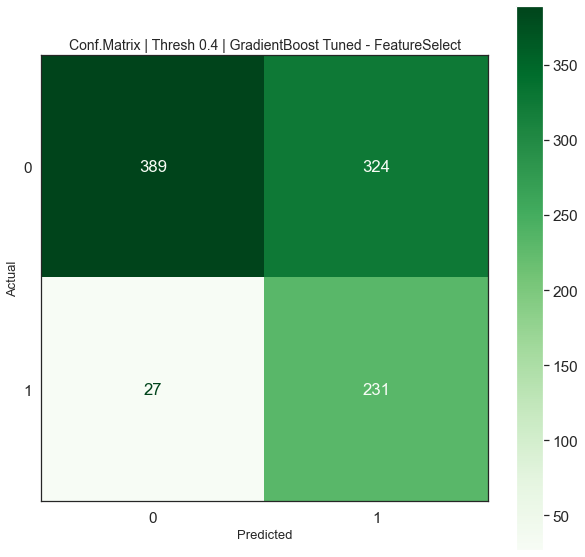

,precision,recall,f1-score,,support
0,0.935096,0.545582,0.689105,,713
1,0.416216,0.895349,0.568266,,258
,,,,,
accuracy,,,0.638517,,971
macro avg,0.675656,0.720465,0.628686,,971
weighted avg,0.797227,0.638517,0.656998,,971


----------------------------------------------------------------
GB Tuned Final model - Thresh 0.4 - With Feature Selection
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.55      0.69       713
           1       0.42      0.90      0.57       258

    accuracy                           0.64       971
   macro avg       0.68      0.72      0.63       971
weighted avg       0.80      0.64      0.66       971



In [117]:
# Confussion Matrix Plot Tuned Model, Thresh 0.4, FeatureSelected
fig, ax = plt.subplots(1, 1, figsize = (10,10))
# set bigger font scale
sns.set(font_scale = 1.4)

# ax1 & ax2
ConfusionMatrixDisplay.from_predictions(Y_fs_test, Y_pred_class_final_fs_thresh_0_4, cmap = "Greens", ax = ax)

# Complimentary & plt.show()
ax.set_title("Conf.Matrix | Thresh 0.4 | GradientBoost Tuned - FeatureSelect", size = 14)
ax.set_xlabel("Predicted", size = 13)
ax.set_ylabel("Actual", size = 13)
# remove the grid
ax.grid(visible = False)

plt.show()

# Classification report in dataframe
display_side_by_side(fin_model_w_fs_thresh_0_4, titles = ["GB_fin_tuned_Thresh40%_w_selected_feature"])

# classic Classification report
print("--"*32)
print("GB Tuned Final model - Thresh 0.4 - With Feature Selection")
print("--"*32)
print(classification_report(Y_fs_test, Y_pred_class_final_fs_thresh_0_4))

- TELCO has 971 customer observations. Fromm those observation
    - 258 customers who churn (26.57%)
    - 713 customers who DO NOT *churn* (73.43%)

`If there is no model :`
- TELCO will experience a loss of revenue next month by 258 people  \\$29.99 = \\$7737.42
- TELCO didn't know the signs that the customer would churn.
- There is no preventive action that TELCO can take to stop the customer from churn.<br>

`With the model we created :`
* TELCO can find out 231 customers out of 258 customers who will churn (89.5% = ~90%)
* From the information above, TELCO can take several steps such as preparing preventive steps customers don't churn like : 
    - troubleshooting (fast response team to help customer)
    - continues improvement before the *customer* is *actually churn (preventive act so customer satisfied with the given services)<br>
    
* I'll assume that for the efforts that have been made, TELCO can maintain 100 customers from 233 customers which are actually and predicted to churn.
* which means there is 158 customer will churn (from the first 258 customers)
* Here we recalculate churn rate after preventive action by TELCO :
    * churn customer to 158 custs (originally 26.57% to 16.27%)
    * not churn customer to 813 custs (originally 73.43% to 83.73%)
* If there's no model, TELCO lost revenue in the following month : \\$7737.42
* with model, TELCO lost revenue in the following month : \\$4738.42, Revenue lost reduced by : \\$2999
* Of course with the model and TELCO continuous effort, it is hoped that the number of *churn* on a regular basis can be reduced continuously.

`More about our model :`
* This section try to emphasize that our model is correct for our cases and model can be trusted
* For my further explanation will relate to the graph [**Precision - Recall - Threshold**](#precisionrecallthreshold)
* Remember that there's trade of between recall & precision (threshold)
* As has been in *state* several times in the previous section :
    * Metric that will be used is `recall`
* `Recall` will focus on targeting the positive class that was determined earlier (positive class : customer churn).
* We'll try to compare selected model with 40% & 60% threshold by using confussion matrix

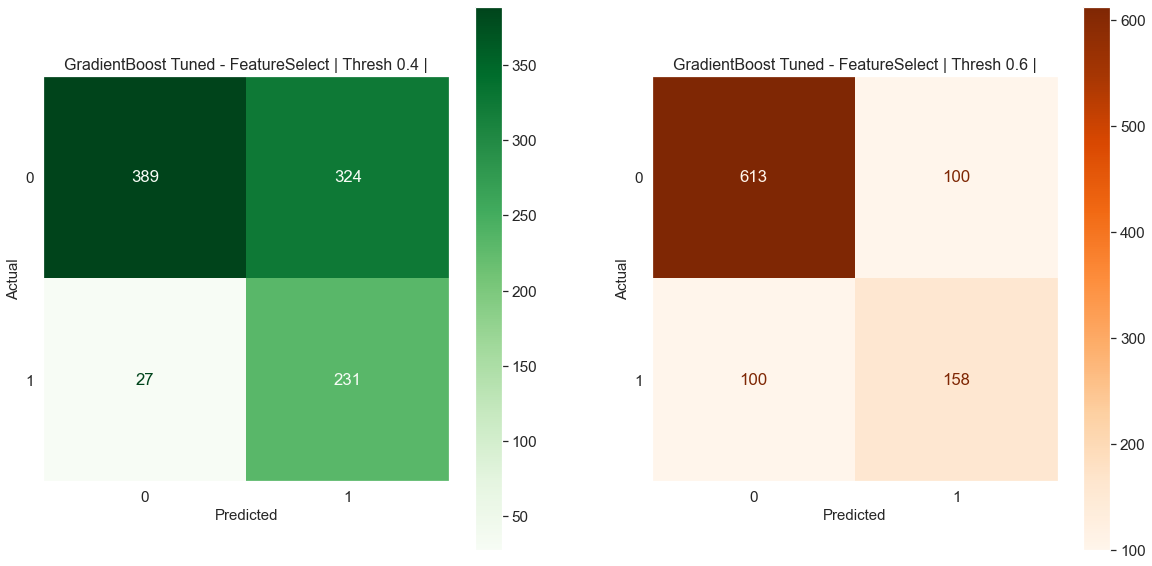

,precision,recall,f1-score,,support
0,0.935096,0.545582,0.689105,,713
1,0.416216,0.895349,0.568266,,258
,,,,,
accuracy,,,0.638517,,971
macro avg,0.675656,0.720465,0.628686,,971
weighted avg,0.797227,0.638517,0.656998,,971
,precision,recall,f1-score,,support
0,0.859748,0.859748,0.859748,,713
1,0.612403,0.612403,0.612403,,258
,,,,,


----------------------------------------------------------------
GradientBoost Tuned - FeatureSelect | Thresh 0.4 |
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.55      0.69       713
           1       0.42      0.90      0.57       258

    accuracy                           0.64       971
   macro avg       0.68      0.72      0.63       971
weighted avg       0.80      0.64      0.66       971
 


----------------------------------------------------------------
GradientBoost Tuned - FeatureSelect | Thresh 0.6 |
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       713
           1       0.61      0.61      0.61       258

    accuracy                           0.79       971
   macro avg       0.74      0.74      0.74       971
weighted avg       0.79      0.79   

In [119]:
# treshold imajiner 60%. predict proba to class
Y_pred_class_final_fs_thresh_0_6 = np.where(Y_pred_proba_final_fs[:,1] > 0.6, 1, 0)

# Confussion Matrix Plot Tuned Model, Thresh 0.4, FeatureSelected
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

# set bigger font scale
sns.set(font_scale = 1.4)

# ax1 & ax2
ConfusionMatrixDisplay.from_predictions(Y_fs_test, Y_pred_class_final_fs_thresh_0_4, cmap = "Greens", ax = ax1)
ConfusionMatrixDisplay.from_predictions(Y_fs_test, Y_pred_class_final_fs_thresh_0_6, cmap = "Oranges", ax = ax2)


# Complimentary & plt.show()
ax1.set_title("GradientBoost Tuned - FeatureSelect | Thresh 0.4 |", size = 16)
ax1.set_xlabel("Predicted", size = 15)
ax1.set_ylabel("Actual", size = 15)
# remove the grid
ax1.grid(visible = False)


ax2.set_title("GradientBoost Tuned - FeatureSelect | Thresh 0.6 |", size = 16)
ax2.set_xlabel("Predicted", size = 15)
ax2.set_ylabel("Actual", size = 15)
# becasue fontscaled, remove the grid
ax2.grid(visible = False)
plt.show()

# classification report in dataframe for thresh 0.6
fin_model_w_fs_thresh_0_6 = get_classification_report(Y_test, Y_pred_class_final_fs_thresh_0_6)

# side by side classification report in dataframe 0.4 & 0.6
display_side_by_side(fin_model_w_fs_thresh_0_4, fin_model_w_fs_thresh_0_6, titles = ["GradientBoost Tuned - FeatureSelect | Thresh 0.4 |", "GradientBoost Tuned - FeatureSelect | Thresh 0.6 |"])

# Classification report classic form
print("--"*32)
print("GradientBoost Tuned - FeatureSelect | Thresh 0.4 |")
print("--"*32)
print(classification_report(Y_fs_test, Y_pred_class_final_fs_thresh_0_4), "\n\n")

print("--"*32)
print("GradientBoost Tuned - FeatureSelect | Thresh 0.6 |")
print("--"*32)
print(classification_report(Y_fs_test, Y_pred_class_final_fs_thresh_0_6), "\n")

`More about our model (cont.):`
* From the *confussion Matrix* graph above, it can be seen that:
    - the model with a threshold of 0.4 has fewer FN cases than the model with treshold of 0.6. Which means that model with 0.4 thresh have `less tendencies to underpredict` than model with 0.6 thresh, vice versa.
    - the model with a threshold of 0.4 has more FP cases than the model with treshold of 0.6. Which means that model with 0.4 thresh have `more tendencies to overpredict` than model with 0.6 thresh, vice versa.<br><br>
    
* From the explanation above, the following pattern can be seen:
    * smaller number of FN case can indicate hig `recall` score (because there's less underpredict case). Less FN can lead to more FP
    * smaller number of FP can indicate high `precision` score (because there's less overpredict case). Less FP can lead to more FN
    * We can see that precision recall trade off affecting the number of FP and FN cases.<br>

* In our case : 
    * underpredict : customers actually churn, but are predicted NOT churn
    * overpredict  : customer ar actually NOT churn, but predicted churn<br><br>

* Remember, the initial goal is to detect customers who will *churn*, means we will choose a model capable of detecting those customers.
* That can be achieved by reducing FN cases or underpredict cases which means that the model that has a better `recall score` is selected.
* Based on what we've learn so far, model that has less underpredict (or less FN, higher recall score) is model with 40% threshold, hence we select that model.
* I remind again that the consequence for increasing `recall score` by changing threshold also results in an increase in overpredict or FP cases (reduce in precision). So there will more case where customers who DO NOT churn are predicted churn, but of course we highlight more churn customer.<br><br>

* In this section I want to explain if case scenario where we want to reduce the occurrence of overpredict (reducing FP cases, increasing precision)
* By reducing FP (increasing precision) we also increase FN cases (reducing recall)
* Which means, our model is better at predicting customer that will churn (who is actully churn), BUT we've got our hands with more underpredict case (churn customer is hard to detect because more FN)<br><br>

* Based on the explanation given above to detect customers churn at TELCO, it'll be better if we use Gradient Boost Classifier with threshold of 0.4 because we can get more churn customer (rather than thresh 0.6. comparing TP of 0.4 & 0.6, 231 vs 158)

<a id="7"></a>
<font color="lightseagreen" size=+3><b>7. RECOMMENDATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

**BUSINESS RECOMMENDATION**<br>
The things that TELCO can do to improve their services based on existing data are as follows:
- Try to dig up information from the customer who churn by filling out a satisfaction survey and various other ways to find out why they churn.
- Telco can send a questioner even if customer not churn, especially for customer who use fiber optic & new customer (tenure <= 5) to find out what happen. Those customer characteristic indicating that they'll churn.
- Based on information on [***this website***](https://blog.hubspot.com/service/netflix-customer-service-and-churn-rate), NETFLIX's *churn rate* is at 2.3% - 2.4%. I understand this comparison is not *apple to apple* with TELCO since they have different business. but at least there is an effort that TELCO can do to reduce the churn from 26%. Maybe TELCO can make checkpoints indicating how successful are TELCO in dealing with customer churn (25%, 20%, 15%, 10%, 5%).
- Encouraging all customers to be able to use paperless billing because it is far very convinient for both parties (customer & TELCO). Paperless billing can be sent via email or SMS.
- With email, TELCO can attach satisfaction survey so that TELCO can understand their given services from customer perspective. TELCO can reward their customer who fill out the survey with free administration fees or discounts with a certain nominal for the next month.
- With those step, We hope that we can reduce customer who whill churn.<br><br>

**RECOMMENDATION FOR MODEL IMPROVEMENT**<br>
- Tried even smaller `learning rates` for `GradientBoostingClassifier` such as 0.001, and 0.0001 (Jason Brownlee - XGBoost with Python Gradient Boosted Trees wwith XGBoost and Scikit - Learn)
- Trying to apply `power - transform` on numerical data so that the data distribution is close to normal distribution (it is hoped that there will be an increase in performance if the data is normally distributed)
- Trying to use other machine learning algorithms that have not been covered in this notebook, and apply steps such as: hyperparameter tuning and feature select by feature importances/coef
- Tried other oversampling and undersampling methods such as RandomOversampling and Nearmiss and compared with the resampling method on this notebook.
- Analyzing data from models that are still guessed wrong to find out the reasons and characteristics.

<a id="8"></a>
<font color="lightseagreen" size=+3><b>8. DEPLOYMENT</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [2]:
from IPython.display import HTML
html1 = f'<img src="Image\\Schema.png" style="margin-left:auto; margin-right:auto"/>'
HTML(html1)

* Schema above explain the whole process in this notebook
* I'll devide into 2 section : `Machine Learning Modeling` dan `Deployment`<br><br>

**MACHINE LEARNING MODELING**
* I split given data into `training + validation set dan test set.`
* With those data i can train & verify my modeling.
* I use pipeline to combine several steps & preprocessing to prevent data leakage. With pipeline we also verify the whole process (resampling, preprocessing, model)
* After we verify whole process and we feel that the result is adequate, we're going to deploy our model.
* Remember that we only use 80% of our given data to train & validate our model. (20% for test)

**DEPLOYMENT**
* For deployment, I'll convert back given data into 100% for train & validation set.
* By doing this, our model can learn more from our data (20% more than ML modeling, those 20% previously used for test set)
* By learning more data, it expected to get better prediction result.

<br><br>Let's start by preparing our data

In [121]:
X_train_dep = df[["InternetService", "Contract", "tenure"]]
Y_train_dep = df["Churn"]

<br><br>Let see our data first

In [122]:
# pada bagian ini saya hanya memperlihatkan datanya saja
print("Shape Data X = ", X_train_dep.shape)
print("Shape Data Y = ", Y_train_dep.shape)
display_side_by_side(X_train_dep.head(5), pd.DataFrame(Y_train_dep, columns = ["Churn"]).head(5), titles = ["X_train_deployment", "Y_train_deployment"])

Shape Data X =  (4853, 3)
Shape Data Y =  (4853,)


X_train_deployment 
 
 
 
 InternetService 
 Contract 
 tenure 
 
 
 
 
 0 
 DSL 
 Month-to-month 
 9 
 
 
 1 
 Fiber optic 
 Month-to-month 
 14 
 
 
 2 
 DSL 
 Two year 
 64 
 
 
 3 
 DSL 
 Two year 
 72 
 
 
 4 
 OtherServices 
 Month-to-month 
 3 
 
 
 Y_train_deployment 
 
 
 
 Churn 
 
 
 
 
 0 
 1 
 
 
 1 
 0 
 
 
 2 
 1 
 
 
 3 
 0 
 
 
 4 
 0

<br><br>Remember that we need to adjust categorial value for InternetService

In [123]:
print("Unique Value for InternetServices : ", X_train_dep["InternetService"].unique())
print("Unique Value for Contract : ", X_train_dep["InternetService"].unique())

Unique Value for InternetServices :  ['DSL' 'Fiber optic' 'OtherServices']
Unique Value for Contract :  ['DSL' 'Fiber optic' 'OtherServices']


<br><br>**HYPERPARAMETER TUNING WITH SELECTED FEATURES**
* In this section I'll do 1 more hyperparameter tuning with selected features based on feature importance. 
* I want to see if there's a change in our hyperparameter
* I'll call several variables that we're gonna use in this section

In [124]:
# resampling using SMOTENC with selected features. 
smote_nc_fs

SMOTENC(categorical_features=[0, 1], random_state=8888)

In [125]:
# Let's see our transformer
transformer_fs

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_fs', OneHotEncoder(drop='first'),
                                 ['InternetService', 'Contract']),
                                ('mm_sc_fs', MinMaxScaler(), ['tenure'])])

In [126]:
# define our model
model_gb_dep = GradientBoostingClassifier(random_state = 8888)

# create pipeline model
gb_pipe_dep = Pipeline([
    ("oversampling_fs_dep", smote_nc_fs),
    ("preprocessing_fs_dep",transformer_fs),
    ("gb_dep", model_gb_dep)
    ])

# create hyperparamspace, remember that please include default parameterin hyeperparamspace.
gb_param_space_dep = {
    "gb_dep__learning_rate" : [0.01, 0.05, 0.1, 0.2],
    "gb_dep__n_estimators" : [100, 150, 200, 300, 400],  
    "gb_dep__subsample" : [0.8, 0.9, 1],
    "gb_dep__random_state" : [8888],
    "gb_dep__max_depth" : [3, 4, 5],
    "gb_dep__max_features" : [2, 3, 4]
}

# create the gridsearchcv
gb_grid_Search_dep = GridSearchCV(
                       gb_pipe_dep, 
                       param_grid = gb_param_space_dep,
                       cv = skfold,
                       scoring = "recall",
                       n_jobs = -1)

<IPython.core.display.Javascript object>

In [127]:
# train our gridsearch
gb_grid_Search_dep.fit(X_train_dep, Y_train_dep)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('oversampling_fs_dep',
                                        SMOTENC(categorical_features=[0, 1],
                                                random_state=8888)),
                                       ('preprocessing_fs_dep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_fs',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['InternetService',
                                                                          'Contract']),
                                                                        ('mm_sc_fs',
                                                                         MinMaxScaler(),
                        

<br>
We're gonna see best parameter for 2 model (model with 80% training data & model with 100% training data)

In [128]:
# best parameter untuk *Gradientboost* dengan data deployment
best_param_dep_data = pd.DataFrame(gb_grid_Search_dep.best_params_, index = [0]).T
best_param_dep_data.rename({0 : "params_value"}, axis = 1, inplace = True)

# best score untuk *GradientBoost* awal dengan 0.8 data train
print("best score GB - 0.8 data train - all features : ", gb_grid_Search.best_score_)

# best score untuk *GradientBoost* awal dengan 1 data train (data deployment)
print("best score GB - data deployment - featureselect: ", gb_grid_Search_dep.best_score_)

# kita bandingkan best parameter untuk *Gradientboost* pada saat hyperparameter tuning di awal tadi dengan data deployment 
display_side_by_side(gb_best_param_0_8_train, best_param_dep_data, titles = ["bestparam - all features - 0.8datatrain", "bestparam - selected features - data deployment"])

best score GB - 0.8 data train - all features :  0.8233009708737864
best score GB - data deployment - featureselect:  0.832328003875969


,parameter_value
gb__learning_rate,0.01
gb__max_depth,4.00
gb__max_features,3.00
gb__n_estimators,100.00
gb__random_state,8888.00
gb__subsample,0.90
,params_value
gb_dep__learning_rate,0.01
gb_dep__max_depth,3.00
gb_dep__max_features,3.00


**REMARKS ON MODEL COMPARISON (80% DATA & 100% DATA)**<br>
- From above dataframe we understand that there's different best parameter for each percentage of data used.
- Although it is not significant, we can see that model that using 100% data (deployment data) have higher `recall cv score` than the 80% .
- I'll continue with model that using 100% data with it's best parameter.

## DEPLOYEMENT

New best parameter for our model

In [129]:
gb_grid_Search_dep.best_params_

{'gb_dep__learning_rate': 0.01,
 'gb_dep__max_depth': 3,
 'gb_dep__max_features': 3,
 'gb_dep__n_estimators': 100,
 'gb_dep__random_state': 8888,
 'gb_dep__subsample': 0.8}

See our model with best parameter

In [131]:
# several parameter can't be seen from best estimator. please refer output above for detailed parameter
gb_grid_Search_dep.best_estimator_

Pipeline(steps=[('oversampling_fs_dep',
                 SMOTENC(categorical_features=[0, 1], random_state=8888)),
                ('preprocessing_fs_dep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_fs',
                                                  OneHotEncoder(drop='first'),
                                                  ['InternetService',
                                                   'Contract']),
                                                 ('mm_sc_fs', MinMaxScaler(),
                                                  ['tenure'])])),
                ('gb_dep',
                 GradientBoostingClassifier(learning_rate=0.01, max_features=3,
                                            random_state=8888,
                                            subsample=0.8))])

Pickle our model

In [132]:
# pickle file name
filename = "milestoneIII_model.sav"

# export .sav as a file
pickle.dump(gb_grid_Search_dep.best_estimator_, open(filename, "wb"))

## TRIAL USING DEPLOYMENT MODEL

Load our pickled model

In [134]:
# pickle file name
filename = "milestoneIII_model.sav"

# load our model
loaded_model = pickle.load(open(filename, "rb"))

Data preparation (adjust new data with given data)
* Adjust input format
* Adjust categorical value with the given instance

Given data are as follows

In [135]:
# Input format
print("Shape Data X = ", X_train_dep.shape)
print("Shape Data Y = ", Y_train_dep.shape)
display_side_by_side(X_train_dep.head(5), pd.DataFrame(Y_train_dep, columns = ["Churn"]).head(5), titles = ["X_train_deployment", "Y_train_deployment"])

Shape Data X =  (4853, 3)
Shape Data Y =  (4853,)


X_train_deployment 
 
 
 
 InternetService 
 Contract 
 tenure 
 
 
 
 
 0 
 DSL 
 Month-to-month 
 9 
 
 
 1 
 Fiber optic 
 Month-to-month 
 14 
 
 
 2 
 DSL 
 Two year 
 64 
 
 
 3 
 DSL 
 Two year 
 72 
 
 
 4 
 OtherServices 
 Month-to-month 
 3 
 
 
 Y_train_deployment 
 
 
 
 Churn 
 
 
 
 
 0 
 1 
 
 
 1 
 0 
 
 
 2 
 1 
 
 
 3 
 0 
 
 
 4 
 0

In [138]:
# Adjust categorical value with the given example
print("Features")
print("--"*32)
print("Unique Value for InternetServices : ", X_train_dep["InternetService"].unique(), "\n")
print("Unique Value for Contract : ", X_train_dep["Contract"].unique(),"\n")
print("min value for tenure : %.d", X_train_dep["tenure"].min())
print("max value for tenure : %.d", X_train_dep["tenure"].max(), "\n\n")
print("Target")
print("--"*32)
print("target 1 : churn customer")
print("target 0 : not churn customer")

Features
----------------------------------------------------------------
Unique Value for InternetServices :  ['DSL' 'Fiber optic' 'OtherServices'] 

Unique Value for Contract :  ['Month-to-month' 'Two year' 'One year'] 

min value for tenure : %.d 0
max value for tenure : %.d 72 


Target
----------------------------------------------------------------
target 1 : churn customer
target 0 : not churn customer


Predict using our pickled model

**NOTES**
- We're focusing on recall
- Remember to use new threshold of 40% (proven recall boost based on our study)
- Adjust categorical value for internetservices
- First we try to predict using 1 dummy data, then we try using more data that I've prepared (contain 822 rows of data)

**PREDICTION USING 1 DUMMY DATA**

In [140]:
# create 1 dummy data to predict
df_1_test = pd.DataFrame({
    "InternetService" : ["Fiber optic"],
    "Contract" : ["Month-to-month"],
    "tenure" : [5]})

# print sample data
display_side_by_side(df_1_test, titles = ["Dummy Customer Data"])

# predict that data
print("predict proba :",loaded_model.predict_proba(df_1_test))
print("predict class :",loaded_model.predict(df_1_test))

,InternetService,Contract,tenure
0,Fiber optic,Month-to-month,5


predict proba : [[0.30942726 0.69057274]]
predict class : [1]


**REMARKS FOR PREDICTION USING 1 DUMMY DATA**
- customer with following characteristic :
    - using fiber optic
    - using month - to - month contract
    - already subscribing for 5 months.<br>
    
Have probabilities :
    - to churn about 69%
    - not churn about 31%
    
And we classify those data as churn customer

<br><br>**PREDICTION USING SAMPLE DATA**

Import our sample data

In [142]:
# import datatest
df_test = pd.read_csv("Dataset\\Sample_test_TELCO_Churn.csv", usecols = ["InternetService", "Contract", "tenure", "Churn"])

# show our data
display_side_by_side(df_test.head(5), titles = ["Sample Data Test X, Y"])

,InternetService,Contract,tenure,Churn
0,DSL,Month-to-month,9,1
1,Fiber optic,Month-to-month,14,0
2,DSL,Two year,64,1
3,DSL,Two year,72,0
4,OtherServices,Month-to-month,3,0


Split into X & Y. no need to split it into train test again

In [143]:
# split into X & Y
sample_X_test = df_test[["InternetService", "Contract", "tenure"]]
sample_Y_test = df_test["Churn"]

# showing our data
print("Shape Sample Test X = ", sample_X_test.shape)
print("Shape Sample Test Y = ", sample_Y_test.shape)
display_side_by_side(sample_X_test.head(5), pd.DataFrame(sample_Y_test, columns = ["Churn"]).head(5), titles = ["sample_X_test", "sample_Y_test"])

Shape Sample Test X =  (822, 3)
Shape Sample Test Y =  (822,)


sample_X_test 
 
 
 
 InternetService 
 Contract 
 tenure 
 
 
 
 
 0 
 DSL 
 Month-to-month 
 9 
 
 
 1 
 Fiber optic 
 Month-to-month 
 14 
 
 
 2 
 DSL 
 Two year 
 64 
 
 
 3 
 DSL 
 Two year 
 72 
 
 
 4 
 OtherServices 
 Month-to-month 
 3 
 
 
 sample_Y_test 
 
 
 
 Churn 
 
 
 
 
 0 
 1 
 
 
 1 
 0 
 
 
 2 
 1 
 
 
 3 
 0 
 
 
 4 
 0

Make sure that there's no new unique value in our sample data :
* if there is a new unique value in our sample data, We need to train our model using that new unique value.
* Make sure that unique value in test data is also available in training data

In [144]:
# make sure the value in the datatest
print("Data Test")
print("Features")
print("--"*32)
print("Unique Value for InternetServices : ", sample_X_test["InternetService"].unique(), "\n")
print("Unique Value for Contract : ", sample_X_test["Contract"].unique(),"\n")
print("min value for tenure : %.d", sample_X_test["tenure"].min())
print("max value for tenure : %.d", sample_X_test["tenure"].max(), "\n\n")
print("Target")
print("--"*32)
print("target 1 : churn customer")
print("target 0 : not churn customer")

Data Test
Features
----------------------------------------------------------------
Unique Value for InternetServices :  ['DSL' 'Fiber optic' 'OtherServices'] 

Unique Value for Contract :  ['Month-to-month' 'Two year' 'One year'] 

min value for tenure : %.d 0
max value for tenure : %.d 72 


Target
----------------------------------------------------------------
target 1 : churn customer
target 0 : not churn customer


Unique value in test set is inline with what we have in training data. we can continue

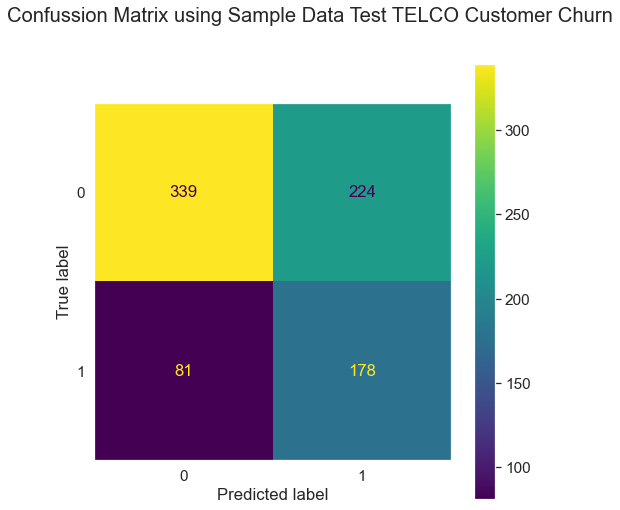


               precision    recall  f1-score   support

           0       0.81      0.60      0.69       563
           1       0.44      0.69      0.54       259

    accuracy                           0.63       822
   macro avg       0.62      0.64      0.61       822
weighted avg       0.69      0.63      0.64       822



In [145]:
# first predict proba
Y_predict_proba = loaded_model.predict_proba(sample_X_test)

# turn proba into class for class 1.
Y_predict_class_thresh_0_4 = np.where(Y_predict_proba[:,1] > 0.4, 1, 0)

# printout predict class
Y_predict_class_thresh_0_4

# scoring & metrics
fig, ax1 = plt.subplots(1, 1,figsize = (8,8))
fig.suptitle("Confussion Matrix using Sample Data Test TELCO Customer Churn")
ConfusionMatrixDisplay.from_predictions(sample_Y_test, Y_predict_class_thresh_0_4, ax = ax1)
plt.grid(visible = False)
plt.show()

print("\n",classification_report(sample_Y_test, Y_predict_class_thresh_0_4))